## imports

In [1]:
%%capture
%pip install geodatasets
%pip install plotly
%pip install nbformat

In [3]:
import os
from typing import Optional, List
from dotenv import load_dotenv

import plotly.express as px
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.oauth2 import service_account
from ebmdatalab import bq

import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option("display.max_columns", None)

## data extraction

In [4]:
load_dotenv()

credentials = os.environ["EBMDATALAB_BQ_CREDENTIALS_PATH"]

PROJECT_ID = "ebmdatalab"

credentials = service_account.Credentials.from_service_account_file(credentials)

#### midazolam data ingestion

In [5]:
midazolam_query = f"SELECT * FROM scmd.scmd_full WHERE vmp_name LIKE '%Midazolam%'"

df_midazolam = bq.cached_read(sql=midazolam_query, csv_path="../data/scmd_midazolam.csv", use_cache=True)

#### flumazenil data ingestion

In [6]:
flumazenil_query = f"SELECT * FROM scmd.scmd_full WHERE vmp_name LIKE '%Flumazenil%'"

df_flumazenil = bq.cached_read(sql=flumazenil_query, csv_path="../data/scmd_flumazenil.csv", use_cache=True)

In [7]:
df_midazolam.head()

year_month  indicative_cost  quantity uom ods_code  \
0  2019-04-01          1475.06      55.0  ML      RA9   
1  2019-04-01           402.29      15.0  ML      RK5   
2  2019-04-01           268.19      10.0  ML      RNQ   
3  2019-04-01           402.29      15.0  ML      RD8   
4  2019-04-01           950.00     200.0  ML      RWY   

                                            ods_name  \
0        Torbay and South Devon NHS Foundation Trust   
1     Sherwood Forest Hospitals NHS Foundation Trust   
2    Kettering General Hospital NHS Foundation Trust   
3  Milton Keynes University Hospital NHS Foundati...   
4   Calderdale and Huddersfield NHS Foundation Trust   

                     region           vmp_code        vtm   vtm_name  \
0                South West  10517111000001107  776785007  Midazolam   
1             East Midlands  10517111000001107  776785007  Midazolam   
2             East Midlands  10517111000001107  776785007  Midazolam   
3           East of England  10517111000001107  776785007  Midazolam   
4  Yorkshire and The Humber  13010311000001109  776785007  Midazolam   

       df_ind  udfs udfs_uom unit_dose_uom     dform_form  \
0  Continuous   NaN      NaN           NaN  Oral solution   
1  Continuous   NaN      NaN           NaN  Oral solution   
2  Continuous   NaN      NaN           NaN  Oral solution   
3  Continuous   NaN      NaN           NaN  Oral solution   
4  Continuous   NaN      NaN           NaN  Oral solution   

                          vmp_name        ing  strnt_nmrtr_val  \
0  Midazolam 10mg/ml oral solution  424521005             10.0   
1  Midazolam 10mg/ml oral solution  424521005             10.0   
2  Midazolam 10mg/ml oral solution  424521005             10.0   
3  Midazolam 10mg/ml oral solution  424521005             10.0   
4  Midazolam 5mg/5ml oral solution  424521005              1.0   

   strnt_dnmtr_val strnt_nmrtr_uom_name strnt_dnmtr_uom_name  \
0              1.0                   mg                   ml   
1              1.0                   mg                   ml   
2              1.0                   mg                   ml   
3              1.0                   mg                   ml   
4              1.0                   mg                   ml   

              ing_nm droute_description  
0  Midazolam maleate               Oral  
1  Midazolam maleate               Oral  
2  Midazolam maleate               Oral  
3  Midazolam maleate               Oral  
4  Midazolam maleate               Oral

### splitting dates to year & month

In [8]:
# MIDAZOLAM

# Convert 'year_month' column to datetime
df_midazolam["year_month"] = pd.to_datetime(df_midazolam["year_month"])

# Extract year and month from 'year_month' column
df_midazolam["year"] = df_midazolam["year_month"].dt.year
df_midazolam["month"] = df_midazolam["year_month"].dt.month

# Reorder columns for better organization
df_midazolam = df_midazolam[['year_month', 'year', 'month', 'indicative_cost', 'quantity', 'uom', 'ods_code',
       'ods_name', 'region', 'vmp_code', 'vtm', 'vtm_name', 'df_ind', 'udfs',
       'udfs_uom', 'unit_dose_uom', 'dform_form', 'vmp_name', 'ing',
       'strnt_nmrtr_val', 'strnt_dnmtr_val', 'strnt_nmrtr_uom_name',
       'strnt_dnmtr_uom_name', 'ing_nm', 'droute_description']]

# Display the first few rows of the updated dataframe
df_midazolam.head()

year_month  year  month  indicative_cost  quantity uom ods_code  \
0 2019-04-01  2019      4          1475.06      55.0  ML      RA9   
1 2019-04-01  2019      4           402.29      15.0  ML      RK5   
2 2019-04-01  2019      4           268.19      10.0  ML      RNQ   
3 2019-04-01  2019      4           402.29      15.0  ML      RD8   
4 2019-04-01  2019      4           950.00     200.0  ML      RWY   

                                            ods_name  \
0        Torbay and South Devon NHS Foundation Trust   
1     Sherwood Forest Hospitals NHS Foundation Trust   
2    Kettering General Hospital NHS Foundation Trust   
3  Milton Keynes University Hospital NHS Foundati...   
4   Calderdale and Huddersfield NHS Foundation Trust   

                     region           vmp_code        vtm   vtm_name  \
0                South West  10517111000001107  776785007  Midazolam   
1             East Midlands  10517111000001107  776785007  Midazolam   
2             East Midlands  10517111000001107  776785007  Midazolam   
3           East of England  10517111000001107  776785007  Midazolam   
4  Yorkshire and The Humber  13010311000001109  776785007  Midazolam   

       df_ind  udfs udfs_uom unit_dose_uom     dform_form  \
0  Continuous   NaN      NaN           NaN  Oral solution   
1  Continuous   NaN      NaN           NaN  Oral solution   
2  Continuous   NaN      NaN           NaN  Oral solution   
3  Continuous   NaN      NaN           NaN  Oral solution   
4  Continuous   NaN      NaN           NaN  Oral solution   

                          vmp_name        ing  strnt_nmrtr_val  \
0  Midazolam 10mg/ml oral solution  424521005             10.0   
1  Midazolam 10mg/ml oral solution  424521005             10.0   
2  Midazolam 10mg/ml oral solution  424521005             10.0   
3  Midazolam 10mg/ml oral solution  424521005             10.0   
4  Midazolam 5mg/5ml oral solution  424521005              1.0   

   strnt_dnmtr_val strnt_nmrtr_uom_name strnt_dnmtr_uom_name  \
0              1.0                   mg                   ml   
1              1.0                   mg                   ml   
2              1.0                   mg                   ml   
3              1.0                   mg                   ml   
4              1.0                   mg                   ml   

              ing_nm droute_description  
0  Midazolam maleate               Oral  
1  Midazolam maleate               Oral  
2  Midazolam maleate               Oral  
3  Midazolam maleate               Oral  
4  Midazolam maleate               Oral

In [9]:
# FLUMAZENIL

# Convert 'year_month' to datetime and extract year and month
df_flumazenil["year_month"] = pd.to_datetime(df_flumazenil["year_month"])
df_flumazenil["year"] = df_flumazenil["year_month"].dt.year
df_flumazenil["month"] = df_flumazenil["year_month"].dt.month

# List of columns to keep in the DataFrame
columns_to_keep: List[str] = [
    'year_month', 'year', 'month', 'indicative_cost', 'quantity', 'uom', 'ods_code',
    'ods_name', 'region', 'vmp_code', 'vtm', 'vtm_name', 'df_ind', 'udfs',
    'udfs_uom', 'unit_dose_uom', 'dform_form', 'vmp_name', 'ing',
    'strnt_nmrtr_val', 'strnt_dnmtr_val', 'strnt_nmrtr_uom_name',
    'strnt_dnmtr_uom_name', 'ing_nm', 'droute_description'
]

# Select only the specified columns
df_flumazenil = df_flumazenil[columns_to_keep]

# Display the first few rows of the processed DataFrame
df_flumazenil.head()

year_month  year  month  indicative_cost  quantity uom ods_code  \
0 2023-09-01  2023      9            140.0      50.0  ML      RDR   
1 2023-09-01  2023      9            140.0      50.0  ML      RX2   
2 2023-09-01  2023      9           -140.0     -50.0  ML      RX4   
3 2023-09-01  2023      9            420.0     150.0  ML      RXA   
4 2023-09-01  2023      9             70.0      25.0  ML      RAT   

                                            ods_name      region  \
0              Sussex Community NHS Foundation Trust  South East   
1            Sussex Partnership NHS Foundation Trust  South East   
2  Cumbria, Northumberland, Tyne and Wear NHS Fou...  North East   
3  Cheshire and Wirral Partnership NHS Foundation...  North West   
4             North East London NHS Foundation Trust      London   

            vmp_code        vtm    vtm_name    df_ind  udfs udfs_uom  \
0  36067711000001104  775985005  Flumazenil  Discrete   5.0       ml   
1  36067711000001104  775985005  Flumazenil  Discrete   5.0       ml   
2  36067711000001104  775985005  Flumazenil  Discrete   5.0       ml   
3  36067711000001104  775985005  Flumazenil  Discrete   5.0       ml   
4  36067711000001104  775985005  Flumazenil  Discrete   5.0       ml   

  unit_dose_uom              dform_form  \
0       ampoule  Solution for injection   
1       ampoule  Solution for injection   
2       ampoule  Solution for injection   
3       ampoule  Solution for injection   
4       ampoule  Solution for injection   

                                            vmp_name        ing  \
0  Flumazenil 500micrograms/5ml solution for inje...  387575000   
1  Flumazenil 500micrograms/5ml solution for inje...  387575000   
2  Flumazenil 500micrograms/5ml solution for inje...  387575000   
3  Flumazenil 500micrograms/5ml solution for inje...  387575000   
4  Flumazenil 500micrograms/5ml solution for inje...  387575000   

   strnt_nmrtr_val  strnt_dnmtr_val strnt_nmrtr_uom_name strnt_dnmtr_uom_name  \
0            100.0              1.0            microgram                   ml   
1            100.0              1.0            microgram                   ml   
2            100.0              1.0            microgram                   ml   
3            100.0              1.0            microgram                   ml   
4            100.0              1.0            microgram                   ml   

       ing_nm droute_description  
0  Flumazenil        Intravenous  
1  Flumazenil        Intravenous  
2  Flumazenil        Intravenous  
3  Flumazenil        Intravenous  
4  Flumazenil        Intravenous

### subsetting midazolam data to only parenteral preparations

In [10]:
df_midazolam = df_midazolam[(df_midazolam["dform_form"] == "Solution for injection") | (df_midazolam["dform_form"] == 'Solution for infusion')]

In [11]:
# preparations
print(df_midazolam["dform_form"].unique())

# dosage form indicator
print(df_midazolam["df_ind"].unique())

['Solution for infusion' 'Solution for injection']
['Discrete']


### number of preparations of midazolam issued per instance

Calculation is: for discrete preparations, the number of preparations issued is the total quantity issued divided by the dose of a preparation.

for example, if a vial/ampoule/pre-filled syring contains 50mg/50ml of midazolam and 100ml is issued in that instance, that means 2 preparations of midazolam were issued.

In [12]:
def compute_num_of_preparations(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute the number of preparations for each row in the DataFrame.

    This function calculates the number of preparations by dividing the 'quantity'
    by the 'udfs' (unit dose form size) for each row.

    Args:
        df (pd.DataFrame): Input DataFrame containing 'quantity' and 'udfs' columns.

    Returns:
        pd.DataFrame: DataFrame with an additional 'num_of_preparations' column.

    Note:
        - The 'quantity' column is the total volumne in ml issued.
        - The 'udfs' column is the unit volume of the preparation.
        - The 'udfs' column is converted to float type before calculation.
        - The result is stored in a new column 'num_of_preparations'.
    """
    # Convert 'udfs' column to float type
    df["udfs"] = df["udfs"].astype(float)

    # Calculate number of preparations
    df["num_of_preparations"] = df["quantity"] / df["udfs"]

    return df

In [13]:
df_midazolam = df_midazolam.pipe(compute_num_of_preparations)

<ipython-input-12-831d2b67185d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["udfs"] = df["udfs"].astype(float)
<ipython-input-12-831d2b67185d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_of_preparations"] = df["quantity"] / df["udfs"]


### dose in mg of midazolam issued

Calculation is: the dose in mg issued is simply the quantity issued multiplied by the dose in mg of a preparation divided by the volume of that preparation. This calculation is further simplied by the the "strnt_nmrtr_val" and "strnt_dnmt_val" columns which simplifies the dose of a preparation to a xmg/1ml conversion.

For example, if 3.0ml of a 7.5mg/1.5ml VMP is issued, that means in total, ((3.0 * 100)/1.5ml) which is equivalent to 15.0mg of the VTM.
Alternatively, using the strnt_nmrtr_val/strnt_dnmt_val conversion of this is 5mg/1ml so given 3.0ml issued, the dose is equivalent to 15.0mg

In [14]:
def compute_dose_in_mg(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute the dose of midazolam in milligrams for each row in the DataFrame.

    This function calculates the dose in mg by multiplying the 'quantity'
    by the 'strnt_nmrtr_val' (strength numerator value) for each row.

    Args:
        df (pd.DataFrame): Input DataFrame containing 'quantity' and 'strnt_nmrtr_val' columns.

    Returns:
        pd.DataFrame: DataFrame with an additional 'dose_in_mg' column.

    Note:
        - The result is stored in a new column 'dose_in_mg'.
        - This calculation assumes that 'strnt_nmrtr_val' represents the strength in mg per unit volume.
    """
    # Calculate dose in mg
    df['dose_in_mg'] = df["quantity"] * df["strnt_nmrtr_val"]

    return df

In [15]:
df_midazolam = df_midazolam.pipe(compute_dose_in_mg)

<ipython-input-14-898506d6b142>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dose_in_mg'] = df["quantity"] * df["strnt_nmrtr_val"]


### dose in mg/ml of midazolam issued per instance

the analogy behind the calculation is given the columns 'strnt_nmrtr_val' and 'strnt_dnmtr_val' represent the numerator and denominator (expressed per ml) values of formulations, the dose in mg/ml can be calculated by division.

In [16]:
def compute_dose_per_mg_ml(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute the dose of midazolam issued in mg per ml for each row in the DataFrame.

    This function calculates the dose in mg/ml by dividing the 'strnt_nmrtr_val'
    (strength numerator value) by the 'strnt_dnmtr_val' (strength denominator value)
    for each row.

    Args:
        df (pd.DataFrame): Input DataFrame containing 'strnt_nmrtr_val' and 'strnt_dnmtr_val' columns.

    Returns:
        pd.DataFrame: DataFrame with an additional 'dose_issued_in_mg_per_ml' column.

    Note:
        - The result is stored in a new column 'dose_issued_in_mg_per_ml'.
        - This calculation assumes that 'strnt_nmrtr_val' and 'strnt_dnmtr_val'
          represent the strength numerator and denominator values respectively.
    """
    # Calculate dose in mg/ml
    df["dose_issued_in_mg_per_ml"] = df["strnt_nmrtr_val"] / df["strnt_dnmtr_val"]

    return df

In [17]:
# Apply the function to df_midazolam using pipe
df_midazolam = df_midazolam.pipe(compute_dose_per_mg_ml)

<ipython-input-16-75d9adfd68a1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dose_issued_in_mg_per_ml"] = df["strnt_nmrtr_val"] / df["strnt_dnmtr_val"]


List of all preparations

In [18]:
print(f"There are {len(df_midazolam['vmp_name'].unique())} and they are: \n {df_midazolam['vmp_name'].unique()}")

There are 16 and they are: 
 ['Midazolam 50mg/50ml solution for infusion vials'
 'Midazolam 100mg/50ml solution for infusion vials'
 'Midazolam 2mg/2ml solution for injection ampoules'
 'Midazolam 5mg/5ml solution for injection ampoules'
 'Midazolam 10mg/2ml solution for injection ampoules'
 'Midazolam 10mg/5ml solution for injection ampoules'
 'Midazolam 50mg/10ml solution for injection ampoules'
 'Midazolam 50mg/50ml solution for infusion pre-filled syringes'
 'Midazolam 10mg/10ml solution for injection pre-filled syringes'
 'Midazolam 200mg/50ml solution for injection pre-filled syringes'
 'Midazolam 2mg/2ml solution for injection pre-filled syringes'
 'Midazolam 100mg/50ml solution for infusion pre-filled syringes'
 'Midazolam 5mg/2ml solution for injection ampoules'
 'Midazolam 5mg/5ml solution for injection pre-filled syringes'
 'Midazolam 5mg/1ml solution for injection ampoules'
 'Midazolam 5mg/25ml solution for injection pre-filled syringes']


### Datafram of records with low doses

In [19]:
low_strength_df = df_midazolam[df_midazolam["dose_issued_in_mg_per_ml"] == 1.0]
low_strength_df.head(3)

year_month  year  month  indicative_cost  quantity uom ods_code  \
79 2019-04-01  2019      4             48.0     200.0  ML      REF   
80 2019-04-01  2019      4             48.0     200.0  ML      REF   
81 2019-04-01  2019      4             48.0     200.0  ML      REF   

                              ods_name      region          vmp_code  \
79  Royal Cornwall Hospitals NHS Trust  South West  4508111000001108   
80  Royal Cornwall Hospitals NHS Trust  South West  4508111000001108   
81  Royal Cornwall Hospitals NHS Trust  South West  4508111000001108   

          vtm   vtm_name    df_ind  udfs udfs_uom unit_dose_uom  \
79  776785007  Midazolam  Discrete  50.0       ml          vial   
80  776785007  Midazolam  Discrete  50.0       ml          vial   
81  776785007  Midazolam  Discrete  50.0       ml          vial   

               dform_form                                         vmp_name  \
79  Solution for infusion  Midazolam 50mg/50ml solution for infusion vials   
80  Solution for infusion  Midazolam 50mg/50ml solution for infusion vials   
81  Solution for infusion  Midazolam 50mg/50ml solution for infusion vials   

         ing  strnt_nmrtr_val  strnt_dnmtr_val strnt_nmrtr_uom_name  \
79  84213009              1.0              1.0                   mg   
80  84213009              1.0              1.0                   mg   
81  84213009              1.0              1.0                   mg   

   strnt_dnmtr_uom_name                   ing_nm droute_description  \
79                   ml  Midazolam hydrochloride      Intramuscular   
80                   ml  Midazolam hydrochloride             Rectal   
81                   ml  Midazolam hydrochloride        Intravenous   

    num_of_preparations  dose_in_mg  dose_issued_in_mg_per_ml  
79                  4.0       200.0                       1.0  
80                  4.0       200.0                       1.0  
81                  4.0       200.0                       1.0

### Dataframe of records with high-strengths

In [20]:
high_strength_df = df_midazolam[df_midazolam["dose_issued_in_mg_per_ml"] != 1.0]
high_strength_df.tail()

year_month  year  month  indicative_cost  quantity uom ods_code  \
121486 2019-12-01  2019     12            87.75     300.0  ML      RL4   
121487 2019-12-01  2019     12            87.75     300.0  ML      RL4   
121488 2019-12-01  2019     12           292.50    1000.0  ML      RJE   
121489 2019-12-01  2019     12           292.50    1000.0  ML      RJE   
121490 2019-12-01  2019     12           292.50    1000.0  ML      RJE   

                                                ods_name         region  \
121486                 The Royal Wolverhampton NHS Trust  West Midlands   
121487                 The Royal Wolverhampton NHS Trust  West Midlands   
121488  University Hospitals of North Midlands NHS Trust  West Midlands   
121489  University Hospitals of North Midlands NHS Trust  West Midlands   
121490  University Hospitals of North Midlands NHS Trust  West Midlands   

                 vmp_code        vtm   vtm_name    df_ind  udfs udfs_uom  \
121486  36125411000001103  776785007  Midazolam  Discrete  10.0       ml   
121487  36125411000001103  776785007  Midazolam  Discrete  10.0       ml   
121488  36125411000001103  776785007  Midazolam  Discrete  10.0       ml   
121489  36125411000001103  776785007  Midazolam  Discrete  10.0       ml   
121490  36125411000001103  776785007  Midazolam  Discrete  10.0       ml   

       unit_dose_uom              dform_form  \
121486       ampoule  Solution for injection   
121487       ampoule  Solution for injection   
121488       ampoule  Solution for injection   
121489       ampoule  Solution for injection   
121490       ampoule  Solution for injection   

                                                 vmp_name       ing  \
121486  Midazolam 50mg/10ml solution for injection amp...  84213009   
121487  Midazolam 50mg/10ml solution for injection amp...  84213009   
121488  Midazolam 50mg/10ml solution for injection amp...  84213009   
121489  Midazolam 50mg/10ml solution for injection amp...  84213009   
121490  Midazolam 50mg/10ml solution for injection amp...  84213009   

        strnt_nmrtr_val  strnt_dnmtr_val strnt_nmrtr_uom_name  \
121486              5.0              1.0                   mg   
121487              5.0              1.0                   mg   
121488              5.0              1.0                   mg   
121489              5.0              1.0                   mg   
121490              5.0              1.0                   mg   

       strnt_dnmtr_uom_name                   ing_nm droute_description  \
121486                   ml  Midazolam hydrochloride             Rectal   
121487                   ml  Midazolam hydrochloride        Intravenous   
121488                   ml  Midazolam hydrochloride      Intramuscular   
121489                   ml  Midazolam hydrochloride             Rectal   
121490                   ml  Midazolam hydrochloride        Intravenous   

        num_of_preparations  dose_in_mg  dose_issued_in_mg_per_ml  
121486                 30.0      1500.0                       5.0  
121487                 30.0      1500.0                       5.0  
121488                100.0      5000.0                       5.0  
121489                100.0      5000.0                       5.0  
121490                100.0      5000.0                       5.0

In [21]:
print(f"Out of {len(df_midazolam['vmp_name'].unique())} total preparations, there are {len(high_strength_df['vmp_name'].unique())} high-strength preparations and they are \n {high_strength_df['vmp_name'].unique()}")

Out of 16 total preparations, there are 9 high-strength preparations and they are 
 ['Midazolam 100mg/50ml solution for infusion vials'
 'Midazolam 10mg/2ml solution for injection ampoules'
 'Midazolam 10mg/5ml solution for injection ampoules'
 'Midazolam 50mg/10ml solution for injection ampoules'
 'Midazolam 200mg/50ml solution for injection pre-filled syringes'
 'Midazolam 100mg/50ml solution for infusion pre-filled syringes'
 'Midazolam 5mg/2ml solution for injection ampoules'
 'Midazolam 5mg/1ml solution for injection ampoules'
 'Midazolam 5mg/25ml solution for injection pre-filled syringes']


### Obtaining the number of each high-strength uoms as a percentage of all uoms issued per trust
1. create a new dataframe which contains the total number of each high-strength uoms issued per trust
2. create a new dataframe which contains the total number of each all uoms issued per trust
3. Divide the new columns in (1) by (2) to get a percentage of high-strength uoms issued per trust
4. merge the two dataframes.

In [22]:
def generate_unit_dose_uom_percentages(df1, df2, col1, col2):
    """
    Generates a column of total high-strength preparations (in vials, unit doses, pre-filled syringes and ampoules) issued over total preparations

    Arguments:
    - df: dataframe
    - col: new column name

    Returns:
    - df_new: new dataframe with total high/all strength preparations included
    """

    # creating a new dataframe with the sum of high-strength preparations per trust and uom
    df1_new = df1.groupby(["ods_name", "unit_dose_uom"])["num_of_preparations"].sum().reset_index()
    df1_new.columns = ['ods_name', 'unit_dose_uom', col1]
    df1_new.sort_values(by="ods_name", ascending=False)

    # creating a new dataframe with the sum of all dose preparations per trust and uom
    df2_new = df2.groupby(["ods_name", "unit_dose_uom"])["num_of_preparations"].sum().reset_index()
    df2_new.columns = ['ods_name', 'unit_dose_uom', col2]
    df2_new.sort_values(by="ods_name", ascending=False)

    # joining both dataframes on trust and uom basis
    unit_dose_quantity_df = df1_new.merge(df2_new, on=["ods_name", "unit_dose_uom"])

    # computing the proportion of high-strength preparations per trust
    unit_dose_quantity_df["proportions (%)"] = round(((unit_dose_quantity_df[col1] / unit_dose_quantity_df[col2]) * 100), 2)

    return unit_dose_quantity_df

In [23]:
unit_dose_quantity_df = generate_unit_dose_uom_percentages(high_strength_df, df_midazolam, col1="high_strength_total_number", col2="all_strengths_total_number")
unit_dose_quantity_df.tail()

ods_name unit_dose_uom  \
276  Wrightington, Wigan and Leigh NHS Foundation T...       ampoule   
277                               Wye Valley NHS Trust       ampoule   
278      Yeovil District Hospital NHS Foundation Trust       ampoule   
279        York Teaching Hospital NHS Foundation Trust       ampoule   
280        York Teaching Hospital NHS Foundation Trust          vial   

     high_strength_total_number  all_strengths_total_number  proportions (%)  
276                    115308.0                    289857.0            39.78  
277                     91302.0                    159660.0            57.19  
278                     62973.0                    105270.0            59.82  
279                    214125.0                    336699.0            63.60  
280                       375.0                       984.0            38.11

records from all trusts from 2019 to 2024

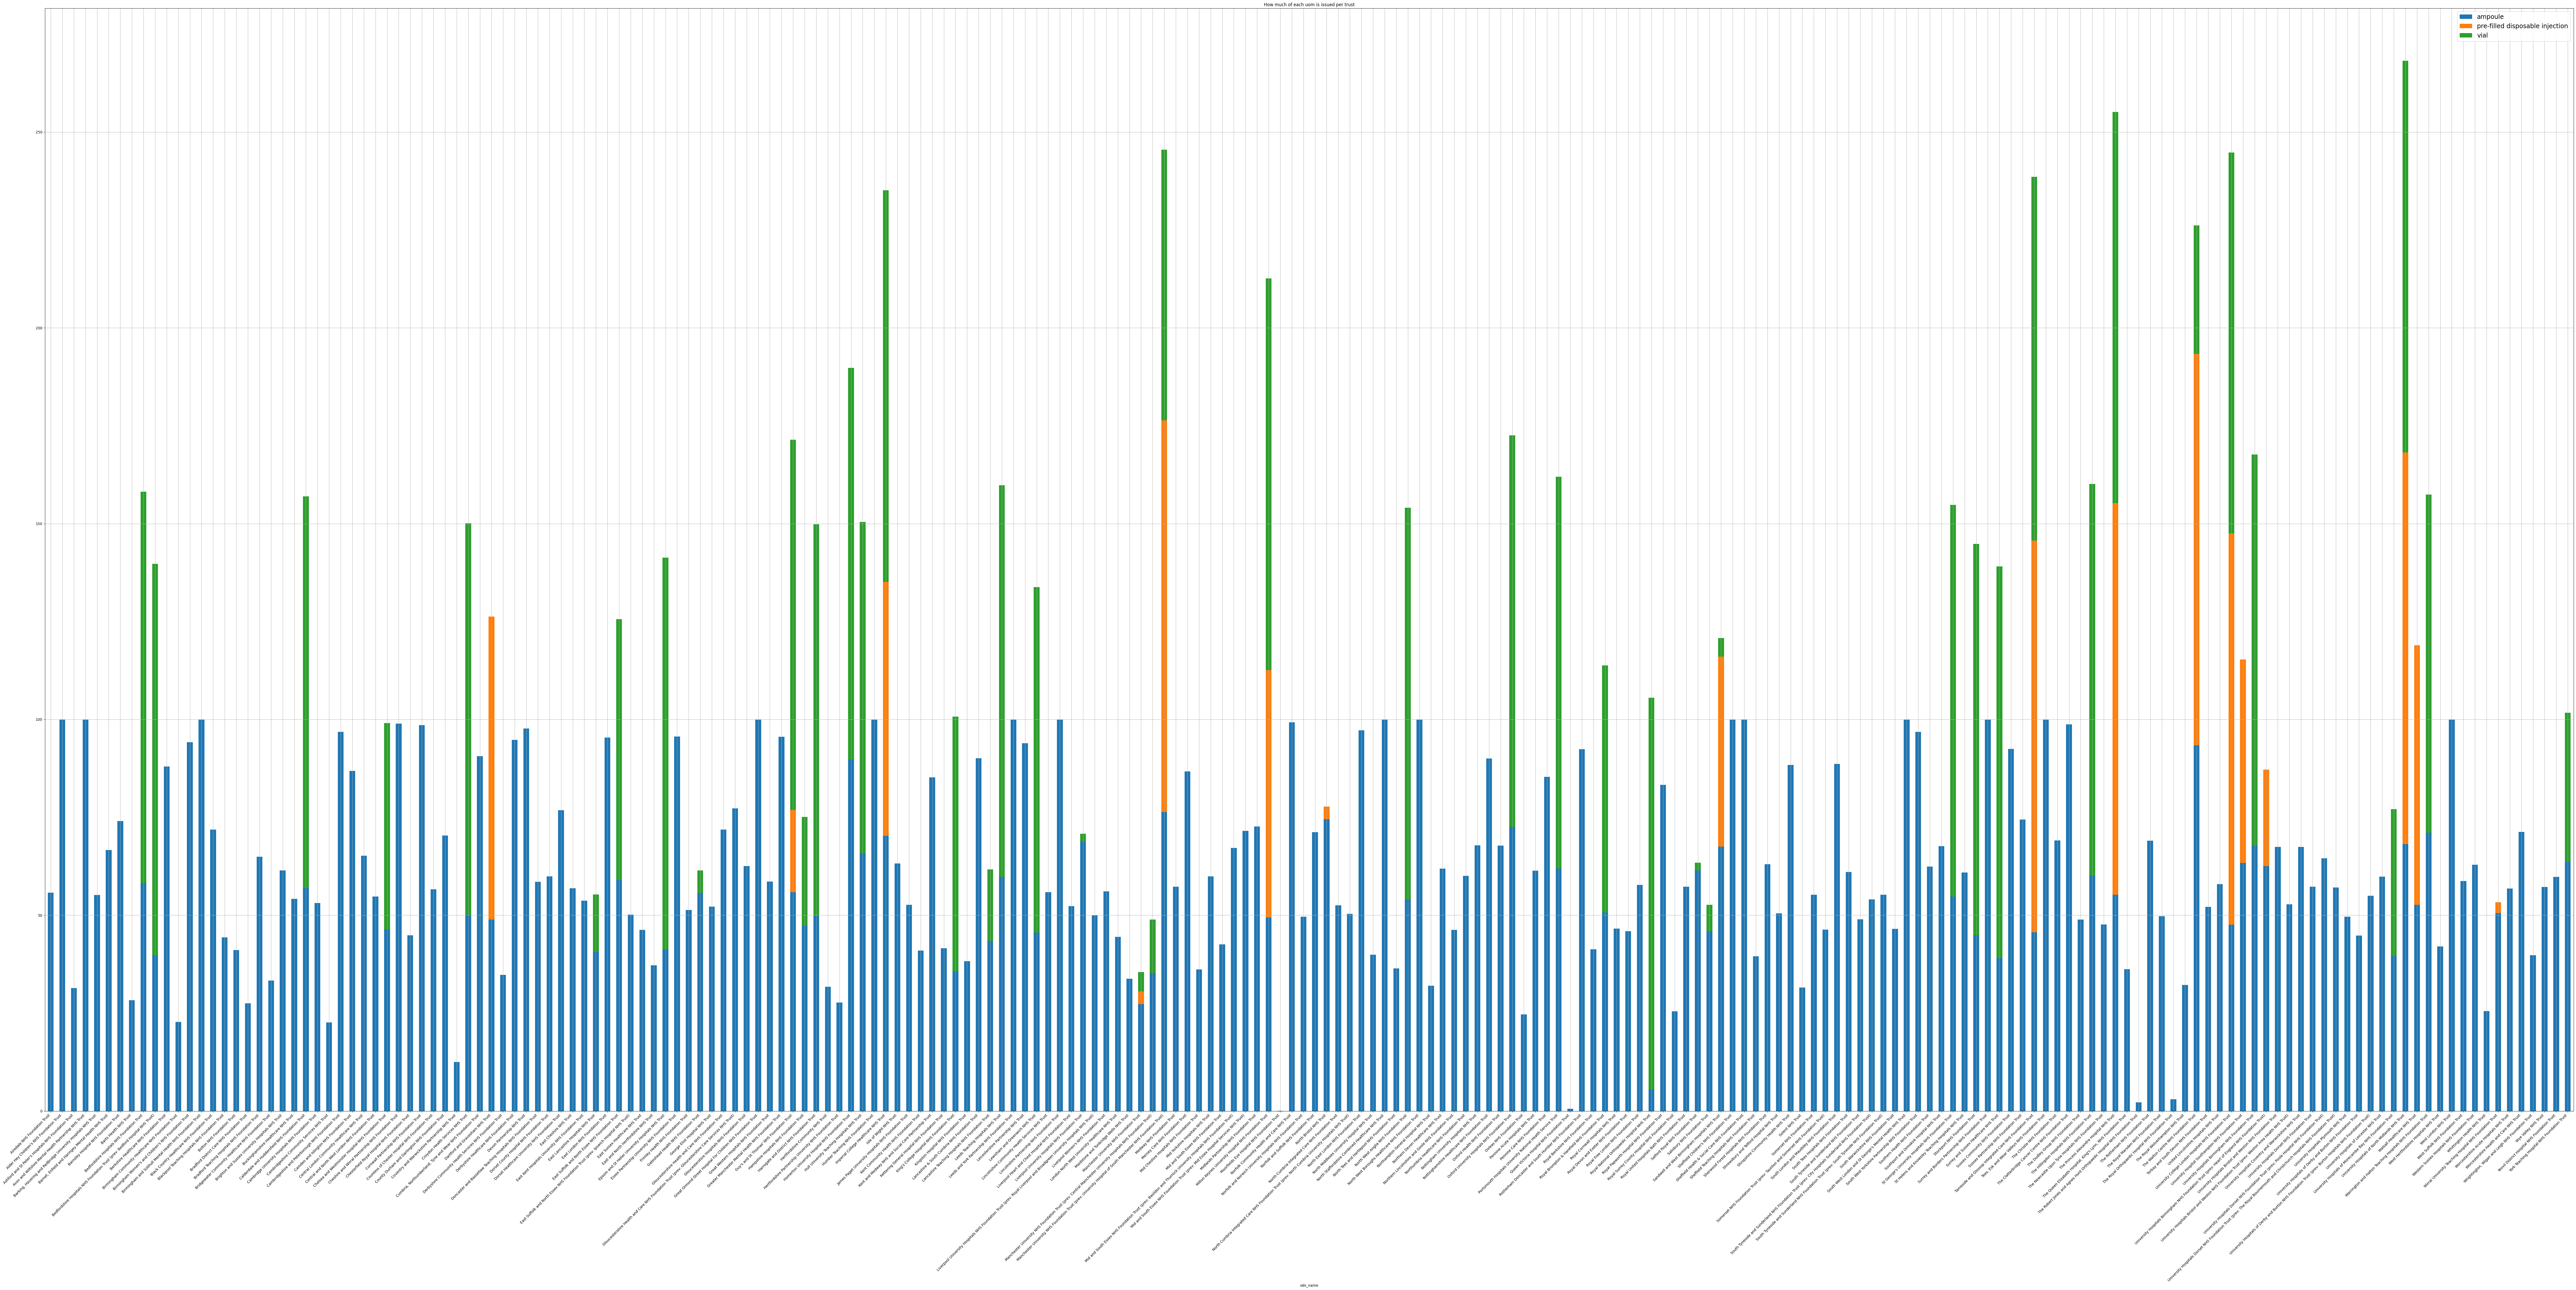

In [24]:
grouped_data = unit_dose_quantity_df.groupby(["ods_name", "unit_dose_uom"])["proportions (%)"].sum().unstack().plot(kind="bar", figsize=(100, 50), stacked=True)

plt.title("How much of each uom is issued per trust")
plt.legend(fontsize="xx-large")
plt.grid()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

top 25 trusts

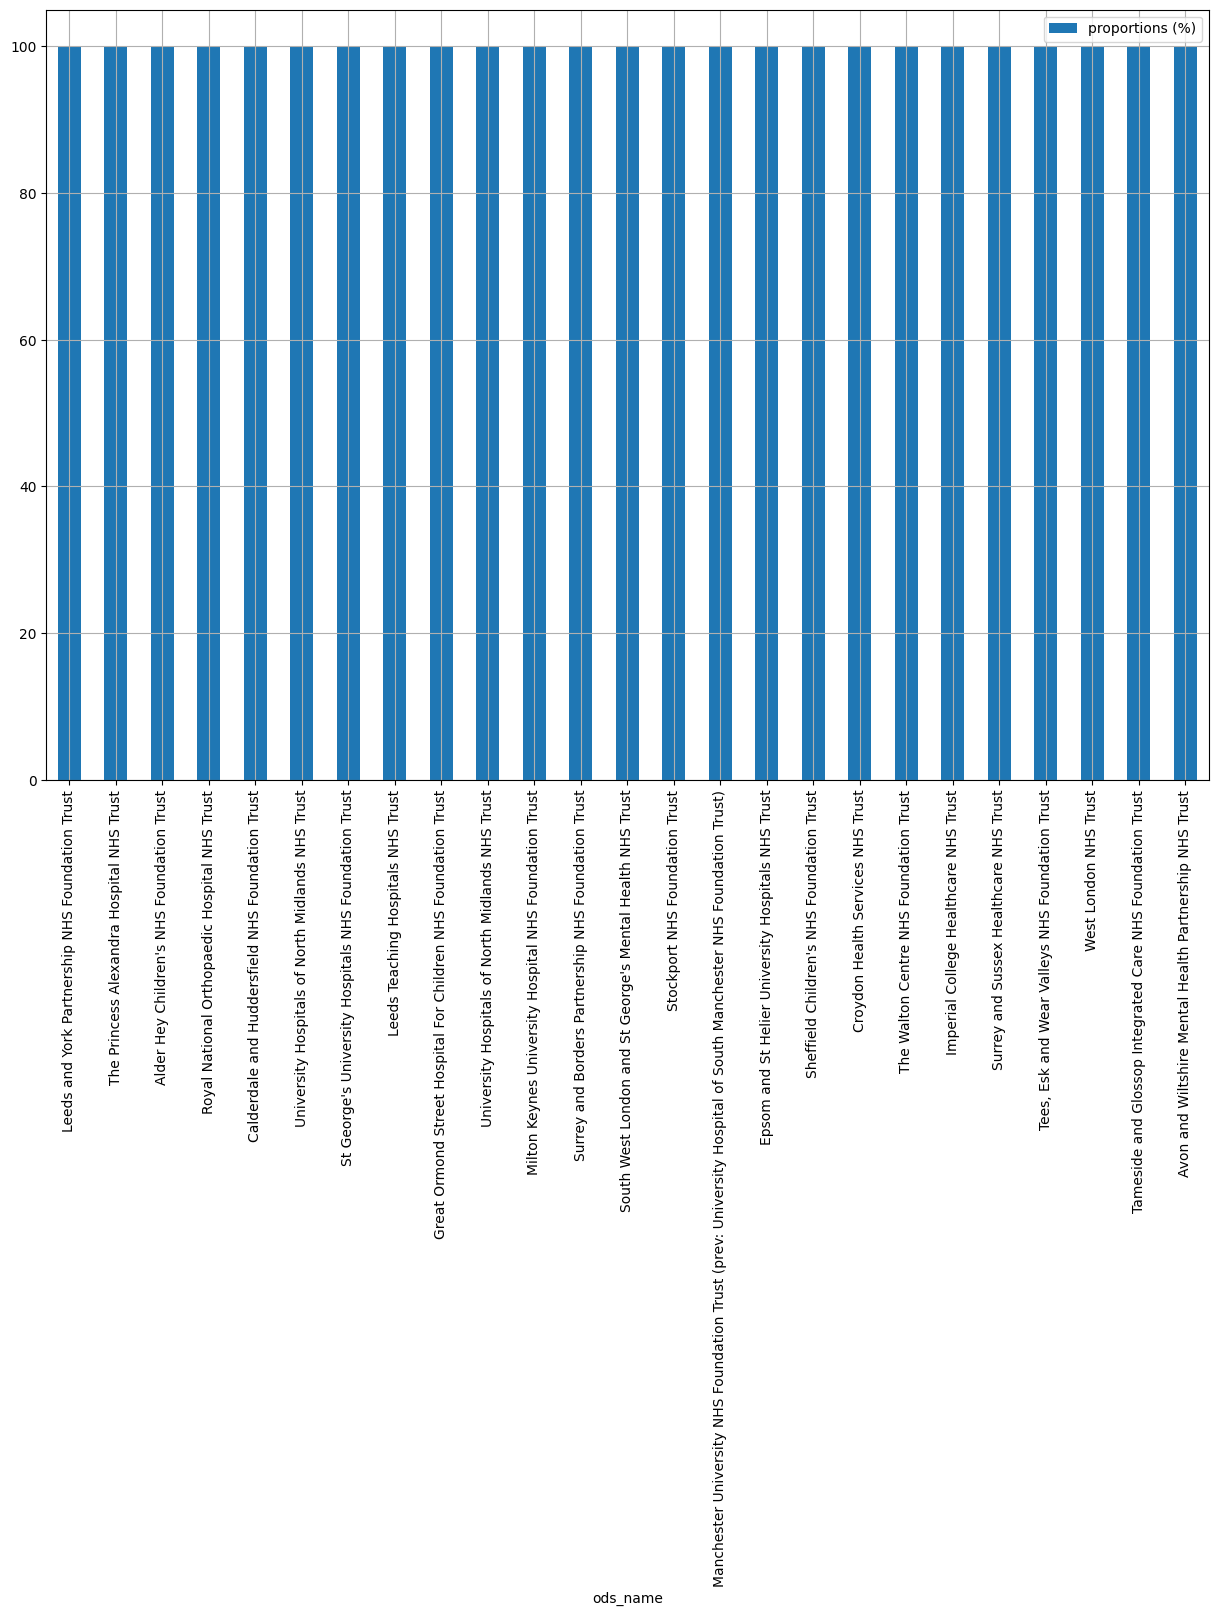

In [25]:
unit_dose_quantity_df.groupby(["ods_name", "unit_dose_uom"])["proportions (%)"].sum().reset_index().sort_values(by="proportions (%)", ascending=False)[:25].plot(x="ods_name", y="proportions (%)", kind="bar", figsize=(15, 10))

plt.grid()
plt.show()

#### overall mean quantities of each uom from 2019 to 2024

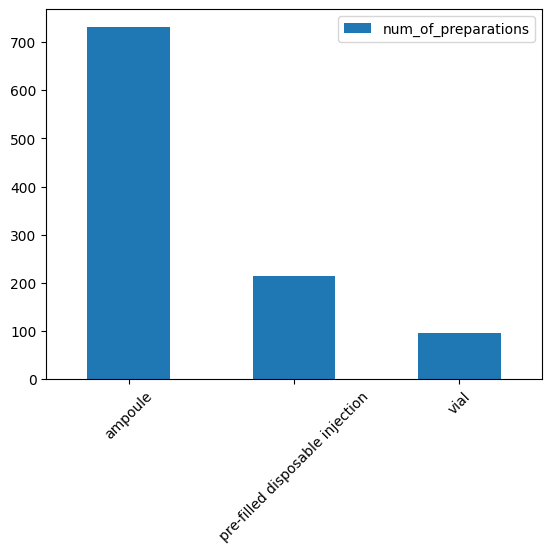

In [26]:
unit_dose_groups = df_midazolam.groupby("unit_dose_uom")["num_of_preparations"].mean().reset_index()
unit_dose_groups.plot(kind="bar")
plt.xticks([0,1,2], ["ampoule", "pre-filled disposable injection", "vial"], rotation=45)
plt.show()

## Working on Midazolam

### Trusts issuing high-strength preparations

#### from 2019 to 2024

In [27]:
df_midazolam_2023 = df_midazolam[df_midazolam["year"] == 2023]
df_midazolam_2022 = df_midazolam[df_midazolam["year"] == 2022]
df_midazolam_2021 = df_midazolam[df_midazolam["year"] == 2021]
df_midazolam_2019 = df_midazolam[df_midazolam["year"] == 2019]

high_strength_df_2023 = high_strength_df[high_strength_df["year"] == 2023]
high_strength_df_2022 = high_strength_df[high_strength_df["year"] == 2022]
high_strength_df_2021 = high_strength_df[high_strength_df["year"] == 2021]
high_strength_df_2019 = high_strength_df[high_strength_df["year"] == 2019]

print(f"In the year 2023, out of {len(df_midazolam_2023['ods_name'].unique())} trusts, {len(high_strength_df_2023['ods_name'].unique())} are issuing high-strength preparations.")
print(f"In the year 2022, out of {len(df_midazolam_2022['ods_name'].unique())} trusts, {len(high_strength_df_2022['ods_name'].unique())} are issuing high-strength preparations.")
print(f"In the year 2021, out of {len(df_midazolam_2021['ods_name'].unique())} trusts, {len(high_strength_df_2021['ods_name'].unique())} are issuing high-strength preparations.")
print(f"In the year 2019, out of {len(df_midazolam_2019['ods_name'].unique())} trusts, {len(high_strength_df_2019['ods_name'].unique())} are issuing high-strength preparations.")

In the year 2023, out of 188 trusts, 186 are issuing high-strength preparations.
In the year 2022, out of 189 trusts, 188 are issuing high-strength preparations.
In the year 2021, out of 212 trusts, 207 are issuing high-strength preparations.
In the year 2019, out of 210 trusts, 207 are issuing high-strength preparations.


### Trust not issuing high-strength preparations - across all years

In [28]:
all_trusts = set(df_midazolam['ods_name'].unique())
trusts_issuing_high_strength = set(high_strength_df['ods_name'].unique())

print(f"Trust not issuing high-strength midazolam injectable: \n {all_trusts.difference(trusts_issuing_high_strength)}")

Trust not issuing high-strength midazolam injectable: 
 {'Midlands Partnership NHS Foundation Trust (prev: Staffordshire and Stoke On Trent Partnership NHS Trust)'}


### Proportion of high-strength issued per trust & region
To achieve this:
1. create a dataframe of trusts/regions and the total sum of high-strengths they've issued.
2. create a dataframe of trusts/regions and the total sum of all strengths issued.
3. merge both dataframes into a new one.
4. create a new column on the new dataframe which simply does a proportion calculation and returns the answer as a percentage.
5. optionally, sort the dataframe in descending order to know the ranking and variation between trusts.

In [29]:
def proportions(df_high_strength: pd.DataFrame, df_all_strengths: pd.DataFrame, year: int, groupby_col: str) -> pd.DataFrame:
    """
    Calculate the percentage of high-strength midazolam issued for each group.

    Args:
        df_high_strength (pd.DataFrame): DataFrame containing high-strength midazolam data.
        df_all_strengths (pd.DataFrame): DataFrame containing all midazolam strengths data.
        year (int): The investigative year of interest.
        groupby_col (str): Column name to group by (e.g., 'ods_name' for trusts or 'region' for regions).

    Returns:
        pd.DataFrame: DataFrame with columns for group, total strengths, high-strengths, and percentage of high-strengths.
    """

    # Filter the dataframes by the year
    df_high_strength_year = df_high_strength[df_high_strength["year"] == year]
    df_all_strengths_year = df_all_strengths[df_all_strengths["year"] == year]

    # Check if the filtered dataframes are empty
    if df_high_strength_year.empty or df_all_strengths_year.empty:
        raise ValueError(f"No data available for the year {year}")

    # Calculate the total high-strength doses for each group
    sum_high_strengths = df_high_strength_year.groupby([groupby_col])["num_of_preparations"].sum().reset_index()
    sum_high_strengths.columns = [groupby_col, "high_strength_sum"]

    # Calculate the total doses (all strengths) for each group
    sum_all_strengths = df_all_strengths_year.groupby([groupby_col])["num_of_preparations"].sum().reset_index()
    sum_all_strengths.columns = [groupby_col, "all_strength_sum"]

    # Merge high-strength and all strength data
    high_strength_proportions = sum_all_strengths.merge(sum_high_strengths, on=[groupby_col], how='left').fillna(0)

    # Compute proportion of high-strength midazolam as a percentage
    high_strength_proportions["percentage_high_strength_issued (%)"] = round(
        (high_strength_proportions["high_strength_sum"] / high_strength_proportions["all_strength_sum"]) * 100, 1
    )

    return high_strength_proportions

#### 2023

In [30]:
trust_high_dose_proportion = proportions(high_strength_df, df_midazolam, 2023, "ods_name")
trust_high_dose_proportion.head()

ods_name  all_strength_sum  \
0                      Airedale NHS Foundation Trust           31338.0   
1          Alder Hey Children's NHS Foundation Trust           17277.0   
2  Ashford and St Peter's Hospitals NHS Foundatio...           65103.0   
3  Avon and Wiltshire Mental Health Partnership N...             897.0   
4  Barking, Havering and Redbridge University Hos...           86266.0   

   high_strength_sum  percentage_high_strength_issued (%)  
0            19416.0                                 62.0  
1            17277.0                                100.0  
2            18753.0                                 28.8  
3              897.0                                100.0  
4            29049.0                                 33.7

#### rank of trusts based on percentage of high-strength midazolam issued

##### top 15

<Figure size 2000x2000 with 0 Axes>

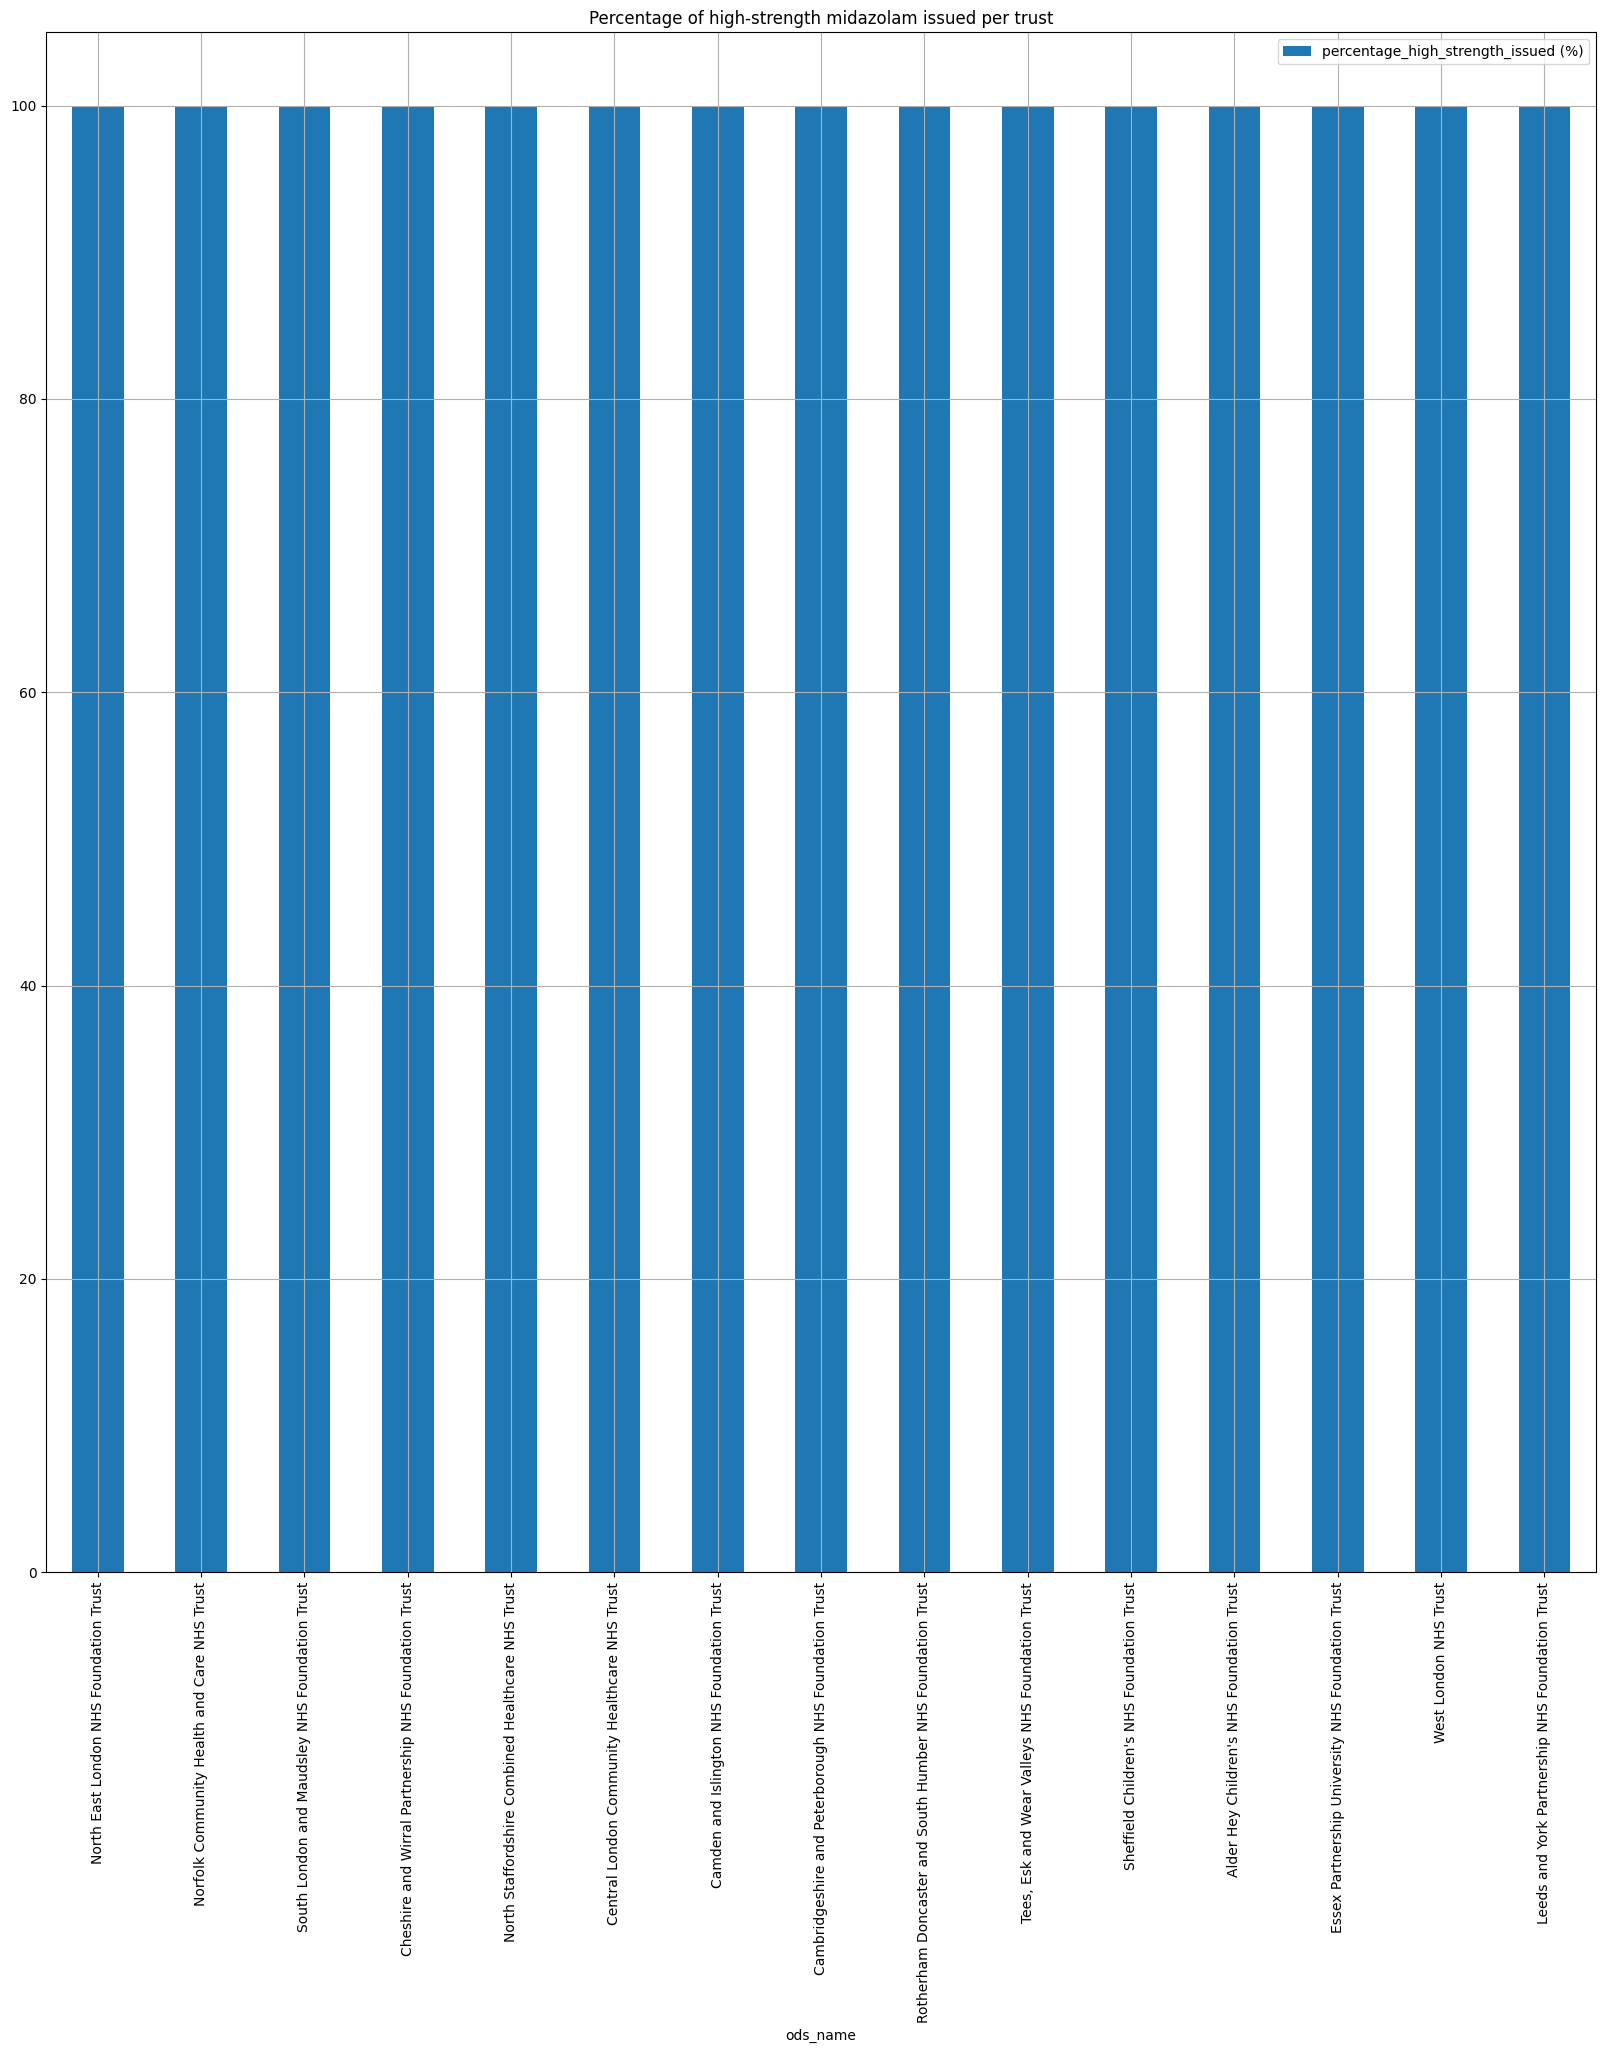

In [31]:
figure = plt.figure(figsize=(20, 20))
trust_high_dose_proportion.sort_values(by="percentage_high_strength_issued (%)", ascending=False)[:15].plot(x="ods_name", y="percentage_high_strength_issued (%)", kind="bar", figsize=(20, 20))
plt.grid()
plt.title("Percentage of high-strength midazolam issued per trust")
plt.show()

##### bottom 25

<Figure size 2000x2000 with 0 Axes>

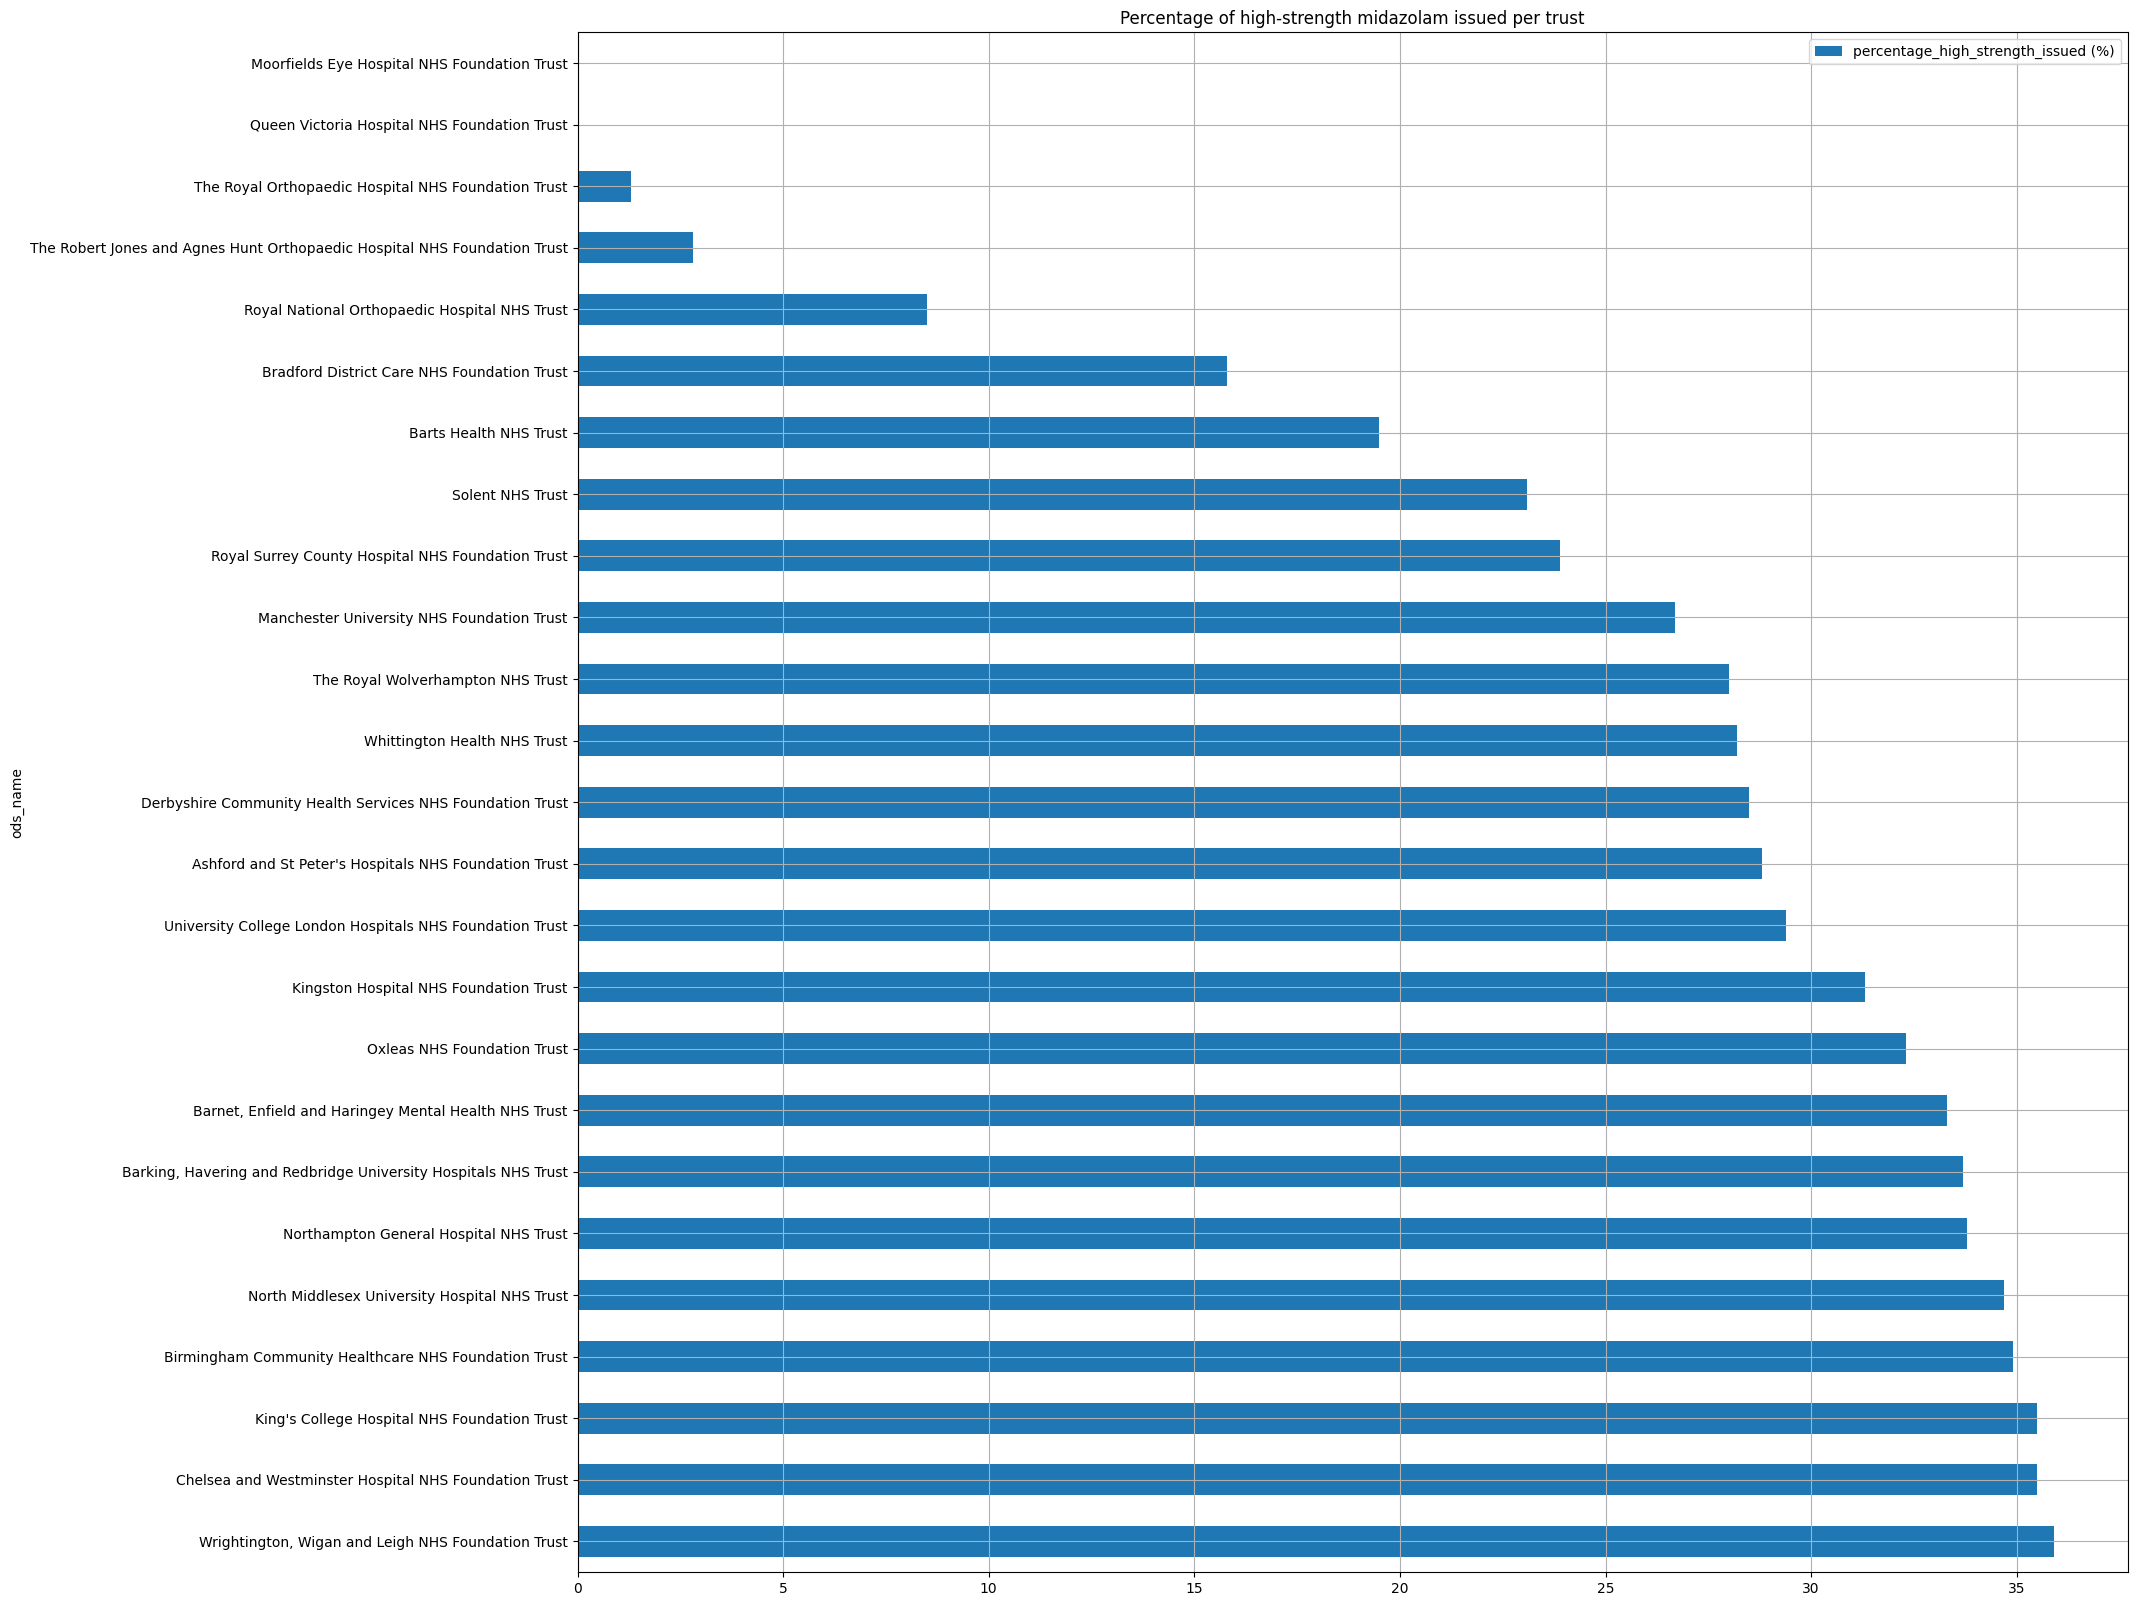

In [32]:
figure = plt.figure(figsize=(20, 20))
trust_high_dose_proportion.sort_values(by="percentage_high_strength_issued (%)", ascending=False).tail(25).plot(x="ods_name", y="percentage_high_strength_issued (%)", kind="barh", figsize=(20, 20))
plt.grid()
plt.title("Percentage of high-strength midazolam issued per trust")
plt.show()

### Yearly proportions of high-strength midazolam issued

#### across all trusts

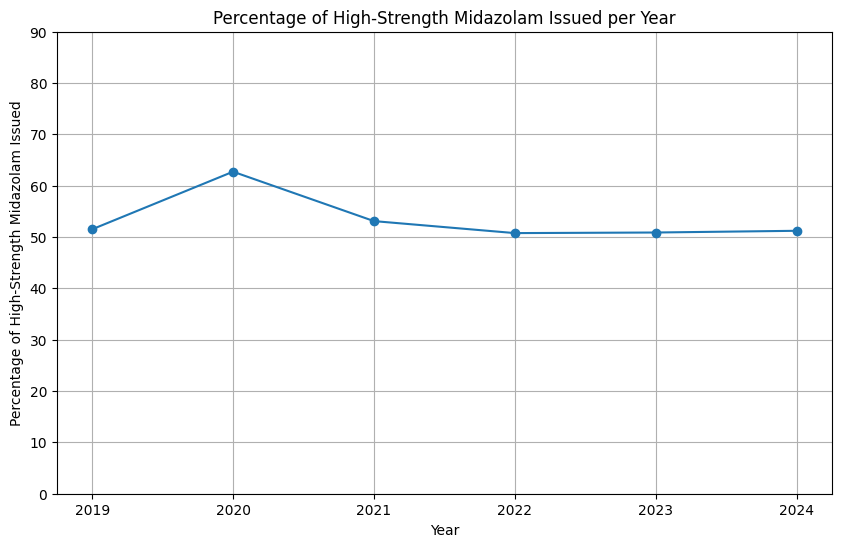

In [33]:
def year_based_proportions(df_high_strength: pd.DataFrame, df_all_strengths: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate and plot the percentage of high-strength midazolam issued per year for a specific trust.

    Arguments:
        df_high_strength: DataFrame of high-strength midazolam
        df_all_strengths: Overall DataFrame (comprising high and low dose)

    Returns:
        pd.DataFrame: DataFrame with columns for year and percentage of high-strength midazolam issued
    """

    # Calculate the total high strength doses and all doses per year
    high_stengths = df_high_strength.groupby('year')["num_of_preparations"].sum().reset_index()
    all_strengths = df_all_strengths.groupby('year')["num_of_preparations"].sum().reset_index()

    # Merge both dataframes
    merged_doses = pd.merge(high_stengths, all_strengths, on='year', suffixes=('_high', '_all'))

    # Compute proportion of high-strength midazolam issued, as a percentage
    merged_doses["percentage_high_strength_issued"] = (merged_doses["num_of_preparations_high"] / merged_doses["num_of_preparations_all"]) * 100

    # Select only the year and percentage columns
    result = merged_doses[['year', 'percentage_high_strength_issued']]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(result['year'], result['percentage_high_strength_issued'], marker='o')
    plt.title(f"Percentage of High-Strength Midazolam Issued per Year")
    plt.xlabel("Year")
    plt.ylabel("Percentage of High-Strength Midazolam Issued")
    plt.xticks(df_all_strengths.year.unique())
    plt.yticks(range(0, 100, 10))
    plt.grid(True)
    plt.show()


year_based_proportions(high_strength_df, df_midazolam)

#### per trust

In [34]:
def year_based_proportions_per_trust(df_high_strength: pd.DataFrame, df_all_strengths: pd.DataFrame, trust: str, show_plot: Optional[bool] = False) -> pd.DataFrame:
    """
    Calculate and plot the percentage of high-strength midazolam issued per year for a specific trust.

    Arguments:
        df_high_strength: DataFrame of high-strength midazolam
        df_all_strengths: Overall DataFrame (comprising high and low dose)
        trust: Name of the trust to analyze

    Returns:
        pd.DataFrame: DataFrame with columns for year and percentage of high-strength midazolam issued
    """
    # Filter data for the specific trust
    df_high_strength_filtered = df_high_strength[(df_high_strength['ods_name'] == trust)]
    df_all_strengths_filtered = df_all_strengths[(df_all_strengths['ods_name'] == trust)]

    # Calculate the total high strength doses and all doses per year
    high_doses = df_high_strength_filtered.groupby('year')["num_of_preparations"].sum().reset_index()
    all_doses = df_all_strengths_filtered.groupby('year')["num_of_preparations"].sum().reset_index()

    # Merge both dataframes
    merged_doses = pd.merge(high_doses, all_doses, on='year', suffixes=('_high', '_all'))

    # Compute proportion of high-strength midazolam issued, as a percentage
    merged_doses["percentage_high_strength_issued"] = (merged_doses["num_of_preparations_high"] / merged_doses["num_of_preparations_all"]) * 100

    # Select only the year and percentage columns
    result = merged_doses[['year', 'percentage_high_strength_issued']]

    # visualize the plot
    if show_plot:
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(result['year'], result['percentage_high_strength_issued'], marker='o')
        plt.title(f"Percentage of High-Strength Midazolam Issued by {df_high_strength_filtered['ods_code'].unique()[0]} per year")
        plt.xlabel("Year")
        plt.ylabel("Percentage of High-Strength Midazolam Issued")
        plt.xticks(df_all_strengths.year.unique())
        plt.yticks(range(0, 100, 10))
        plt.grid(True)
        plt.show()

    return result



### Monthly proportions of high-strength midazolam issued per trust

In [35]:
def month_based_proportions(df_high_strength: pd.DataFrame, df_all_strengths: pd.DataFrame, trust: str, year: int, show_plot: Optional[bool] = False) -> pd.DataFrame:
    """
    Calculate and plot the percentage of high-strength midazolam issued per month for a specific trust and year.

    This function filters the input DataFrames for the specified trust and year, groups the data by month,
    calculates the proportion of high-strength midazolam issued, and visualizes the results in a line plot.

    Args:
        df_high_strength (pd.DataFrame): DataFrame containing high-strength midazolam data.
        df_all_strengths (pd.DataFrame): DataFrame containing all midazolam doses data.
        trust (str): Name of the NHS trust to analyze.
        year (int): Year to analyze.

    Returns:
        pd.DataFrame: DataFrame with columns for month and percentage of high-strength midazolam issued.

    Raises:
        ValueError: If the specified trust or year is not found in the input DataFrames.

    Note:
        This function assumes that the input DataFrames have columns 'ods_name', 'year', 'month', and 'num_of_preparations'.
        It also displays a plot of the results using matplotlib.
    """
    # Filter data for the specific trust and year
    df_high_strength_filtered = df_high_strength[(df_high_strength['ods_name'] == trust) & (df_high_strength['year'] == year)]
    df_all_strengths_filtered = df_all_strengths[(df_all_strengths['ods_name'] == trust) & (df_all_strengths['year'] == year)]

    if df_high_strength_filtered.empty or df_all_strengths_filtered.empty:
        raise ValueError(f"No data found for trust '{trust}' in year {year}")

    # Calculate the total high strength doses and all doses per month
    high_doses = df_high_strength_filtered.groupby('month')["num_of_preparations"].sum().reset_index()
    all_doses = df_all_strengths_filtered.groupby('month')["num_of_preparations"].sum().reset_index()

    # Merge both dataframes
    merged_doses = pd.merge(high_doses, all_doses, on='month', suffixes=('_high', '_all'))

    # Compute proportion of high-strength midazolam issued, as a percentage
    merged_doses["percentage_high_strength_issued"] = (merged_doses["num_of_preparations_high"] / merged_doses["num_of_preparations_all"]) * 100

    # Select only the month and percentage columns
    result = merged_doses[['month', 'percentage_high_strength_issued']]

    # visualize the plot
    if show_plot:
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(result['month'], result['percentage_high_strength_issued'], marker='o')
        plt.title(f"Percentage of high-strength Midazolam Issued by {df_high_strength_filtered['ods_code'].unique()[0]} per year")
        plt.xlabel("Month")
        plt.ylabel("Percentage of high-strength Midazolam Issued")
        plt.xticks(df_all_strengths.year.unique())
        plt.yticks(range(0, 100, 10))
        plt.grid(True)
        plt.show()

    return result

### Quarterly proportions of high-strength midazolam issued per trust

<ipython-input-36-ced0f2746442>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_strength_filtered['quarter'] = pd.PeriodIndex(df_high_strength_filtered['year_month'], freq='Q')
<ipython-input-36-ced0f2746442>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_strengths_filtered['quarter'] = pd.PeriodIndex(df_all_strengths_filtered['year_month'], freq='Q')


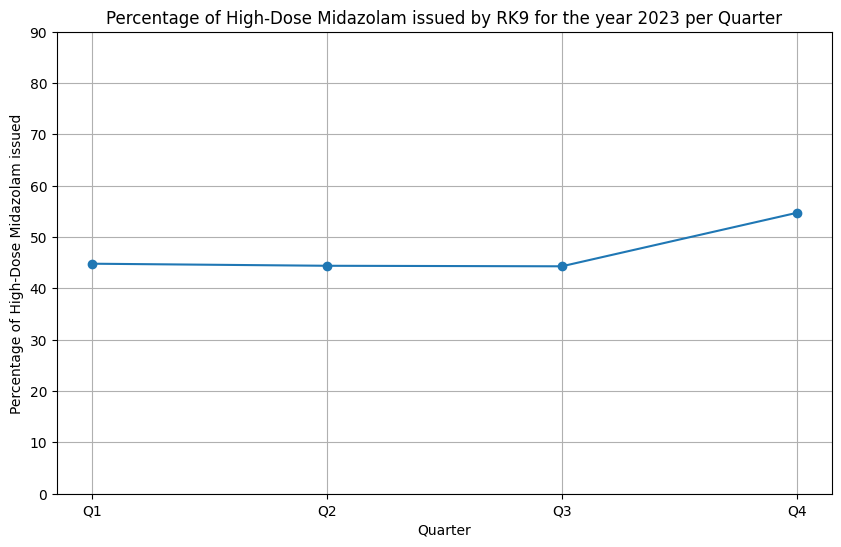

In [36]:
def quarterly_based_proportions(df_high_strength: pd.DataFrame, df_all_strengths: pd.DataFrame, trust: str, year: int) -> pd.DataFrame:
    """
    Calculate and plot the percentage of high-strength midazolam issued per quarter for a specific trust and year.

    This function filters the input DataFrames for the specified trust and year, groups the data by quarter,
    calculates the proportion of high-strength midazolam issued, and visualizes the results in a line plot.

    Args:
        df_high_strength (pd.DataFrame): DataFrame containing high-strength midazolam data.
        df_all_strengths (pd.DataFrame): DataFrame containing all midazolam doses data.
        trust (str): Name of the NHS trust to analyze.
        year (int): Year to analyze.

    Returns:
        pd.DataFrame: DataFrame with columns for quarter and percentage of high-strength midazolam issued.

    Raises:
        ValueError: If the specified trust or year is not found in the input DataFrames.

    Note:
        This function assumes that the input DataFrames have columns 'ods_name', 'year', 'year_month', and 'num_of_preparations'.
        It also displays a plot of the results using matplotlib.
    """
    # Filter data for the specific trust and year
    df_high_strength_filtered = df_high_strength[(df_high_strength['ods_name'] == trust) & (df_high_strength['year'] == year)]
    df_all_strengths_filtered = df_all_strengths[(df_all_strengths['ods_name'] == trust) & (df_all_strengths['year'] == year)]

    if df_high_strength_filtered.empty or df_all_strengths_filtered.empty:
        raise ValueError(f"No data found for trust '{trust}' in year {year}")

    # Calculate the quarter for each row
    df_high_strength_filtered['quarter'] = pd.PeriodIndex(df_high_strength_filtered['year_month'], freq='Q')
    df_all_strengths_filtered['quarter'] = pd.PeriodIndex(df_all_strengths_filtered['year_month'], freq='Q')

    # Calculate the total high strength doses and all doses per quarter
    high_doses = df_high_strength_filtered.groupby('quarter')["num_of_preparations"].sum().reset_index()
    all_doses = df_all_strengths_filtered.groupby('quarter')["num_of_preparations"].sum().reset_index()

    # Merge both dataframes
    merged_doses = pd.merge(high_doses, all_doses, on='quarter', suffixes=('_high', '_all'))

    # Compute proportion of high-strength midazolam issued, as a percentage
    merged_doses["percentage_high_strength_issued"] = (merged_doses["num_of_preparations_high"] / merged_doses["num_of_preparations_all"]) * 100

    # Select only the quarter and percentage columns
    result = merged_doses[['quarter', 'percentage_high_strength_issued']]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 5), result['percentage_high_strength_issued'], marker='o')
    plt.title(f"Percentage of high-strength Midazolam issued by {df_high_strength_filtered['ods_code'].unique()[0]} for the year {year} per Quarter")
    plt.xlabel("Quarter")
    plt.ylabel("Percentage of high-strength Midazolam issued")
    plt.xticks(range(1, 5), ['Q1', 'Q2', 'Q3', 'Q4'])
    plt.yticks(range(0, 100, 10))
    plt.grid(True)
    plt.show()

quarterly_based_proportions(high_strength_df, df_midazolam, "University Hospitals Plymouth NHS Trust", 2023)

## Working on Flumazenil

In [37]:
df_flumazenil["df_ind"].unique()

array(['Discrete'], dtype=object)

In [38]:
# Get unique values of 'vmp_name' column in df_flumazenil
df_flumazenil['vmp_name'].unique()

array(['Flumazenil 500micrograms/5ml solution for injection ampoules'],
      dtype=object)

In [39]:
# computing number of doses of flumazenil per instance
df_flumazenil = df_flumazenil.pipe(compute_num_of_preparations)
df_flumazenil.head(3)

year_month  year  month  indicative_cost  quantity uom ods_code  \
0 2023-09-01  2023      9            140.0      50.0  ML      RDR   
1 2023-09-01  2023      9            140.0      50.0  ML      RX2   
2 2023-09-01  2023      9           -140.0     -50.0  ML      RX4   

                                            ods_name      region  \
0              Sussex Community NHS Foundation Trust  South East   
1            Sussex Partnership NHS Foundation Trust  South East   
2  Cumbria, Northumberland, Tyne and Wear NHS Fou...  North East   

            vmp_code        vtm    vtm_name    df_ind  udfs udfs_uom  \
0  36067711000001104  775985005  Flumazenil  Discrete   5.0       ml   
1  36067711000001104  775985005  Flumazenil  Discrete   5.0       ml   
2  36067711000001104  775985005  Flumazenil  Discrete   5.0       ml   

  unit_dose_uom              dform_form  \
0       ampoule  Solution for injection   
1       ampoule  Solution for injection   
2       ampoule  Solution for injection   

                                            vmp_name        ing  \
0  Flumazenil 500micrograms/5ml solution for inje...  387575000   
1  Flumazenil 500micrograms/5ml solution for inje...  387575000   
2  Flumazenil 500micrograms/5ml solution for inje...  387575000   

   strnt_nmrtr_val  strnt_dnmtr_val strnt_nmrtr_uom_name strnt_dnmtr_uom_name  \
0            100.0              1.0            microgram                   ml   
1            100.0              1.0            microgram                   ml   
2            100.0              1.0            microgram                   ml   

       ing_nm droute_description  num_of_preparations  
0  Flumazenil        Intravenous                 10.0  
1  Flumazenil        Intravenous                 10.0  
2  Flumazenil        Intravenous                -10.0

### Overal yearly issuance of Flumazenil

In [40]:
def year_based_flumazenil(df_flumazenil: pd.DataFrame, show_plot: Optional[bool] = False) -> pd.DataFrame:
    """
    Calculate and plot the percentage of high-strength midazolam issued per year for a specific trust.

    Arguments:
        df_flumazenil: DataFrame of flumazenil

    Returns:
        pd.DataFrame: DataFrame with columns for year and percentage of high-strength midazolam issued
    """

    # Calculate the total high strength doses and all doses per year
    df_flumazenil_grouped = df_flumazenil.groupby('year')["num_of_preparations"].sum().reset_index()


    # visualize the plot
    if show_plot:
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(df_flumazenil_grouped['year'], df_flumazenil_grouped['num_of_preparations'], marker='o')
        plt.title(f"Number of Flumazenil preparations issued by all trusts per year")
        plt.xlabel("Year")
        plt.ylabel("Number of preparations of flumazenil issued")
        plt.xticks(df_flumazenil_grouped.year.unique())
        plt.yticks(range(1000, int(df_flumazenil_grouped['num_of_preparations'].max()) + 1000, 10000))
        plt.grid(True)
        plt.show()

    return df_flumazenil_grouped


### Yearly issuance of Flumazenil per trust

In [41]:
def year_based_flumazenil_per_trust(df_flumazenil: pd.DataFrame, trust: str, show_plot: Optional[bool] = False) -> pd.DataFrame:
    """
    Calculate and plot the percentage of high-strength midazolam issued per year for a specific trust.

    Arguments:
        df_flumazenil: DataFrame of flumazenil
        trust: Name of the trust to analyze
        show_plot: Optional argument which allows you visualize the result of the function

    Returns:
        pd.DataFrame: DataFrame with columns for year and percentage of high-strength midazolam issued
    """
    # Filter data for the specific trust
    df_flumazenil_filtered = df_flumazenil[(df_flumazenil['ods_name'] == trust)]

    # Calculate the total high strength doses and all doses per year
    df_flumazenil_grouped = df_flumazenil_filtered.groupby('year')["num_of_preparations"].sum().reset_index()


    # visualize the plot
    if show_plot:
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(df_flumazenil_grouped['year'], df_flumazenil_grouped['num_of_preparations'], marker='o')
        plt.title(f"Number of Flumazenil doses Issued by {df_flumazenil_filtered['ods_code'].unique()[0]} per year")
        plt.xlabel("Year")
        plt.ylabel("Number of doses of flumazenil Issued")
        plt.xticks(df_flumazenil_grouped.year.unique())
        plt.yticks(range(-200, 500, 50))
        plt.grid(True)
        plt.show()

    return df_flumazenil_grouped

### Yearly issuance of Flumazenil per region

In [42]:
def year_based_flumazenil_per_region(df_flumazenil: pd.DataFrame, year: int, show_plot: Optional[bool] = False) -> pd.DataFrame:
    """
    Calculate and plot the percentage of high-strength midazolam issued per year for a specific trust.

    Arguments:
        df_flumazenil: DataFrame of flumazenil
        year: Year to analyze
        show_plot: Optional argument which allows you visualize the result of the function

    Returns:
        pd.DataFrame: DataFrame with columns for region and number of flumazenil preparations issued
    """
    # Filter data for the specific trust
    df_flumazenil_filtered = df_flumazenil[(df_flumazenil['year'] == year)]

    # Calculate the total high strength doses and all doses per year
    df_flumazenil_grouped = df_flumazenil_filtered.groupby('region')["num_of_preparations"].sum().reset_index()


    # visualize the plot
    if show_plot:
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(df_flumazenil_grouped['region'], df_flumazenil_grouped['num_of_preparations'], marker='o')
        plt.title(f"Number of Flumazenil doses Issued by regions in {year}")
        plt.xlabel("Regions")
        plt.ylabel("Number of preparations of flumazenil Issued")
        plt.xticks(df_flumazenil_grouped.region.unique(), rotation=45)
        # plt.xticklabels(df_flumazenil_grouped.region.unique(), )
        plt.yticks(range(0, 22000, 1000))
        plt.grid(True)
        plt.show()

    return df_flumazenil_grouped

### Monthly issuance of Flumazenil across all trusts for a specific year

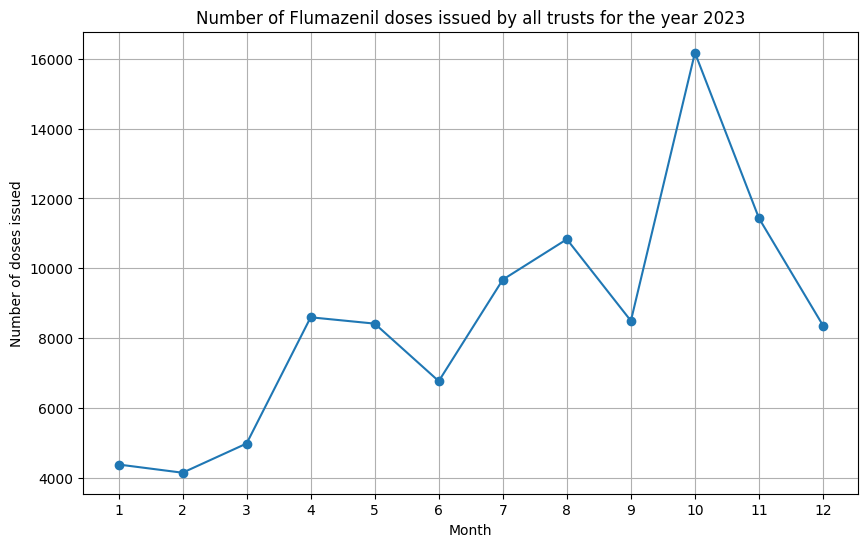

In [43]:
def month_based_flumazenil_all(df_flumazenil: pd.DataFrame, year: int) -> pd.DataFrame:
    """
    Analyze and visualize monthly Flumazenil doses for a specific trust and year.

    This function filters the Flumazenil data for a given trust and year,
    aggregates the doses by month, and creates a line plot of the results.

    Args:
        df_flumazenil (pd.DataFrame): DataFrame containing Flumazenil data.
        year (int): Year to analyze.

    Returns:
        pd.DataFrame: DataFrame of monthly Flumazenil doses for the specified trust and year.

    Side effects:
        Displays a matplotlib plot of monthly Flumazenil doses.
    """
    # Filter data for the specific trust
    df_flumazenil_filtered = df_flumazenil[(df_flumazenil['year'] == year)]

    # Calculate the total high strength doses and all doses per year
    flumazenil_doses = df_flumazenil_filtered.groupby('month')["num_of_preparations"].sum().reset_index()
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(flumazenil_doses['month'], flumazenil_doses['num_of_preparations'], marker='o')
    plt.title(f"Number of Flumazenil doses issued by all trusts for the year {year}")
    plt.xlabel("Month")
    plt.ylabel("Number of doses issued")
    plt.xticks(range(1,13))
    # plt.yticks(range(-200, 500, 50))
    plt.grid(True)
    plt.show()

month_based_flumazenil_all(df_flumazenil, 2023)

### Monthly issuance of Flumazenil per Trust for given year

In [44]:
def month_based_flumazenil(df_flumazenil: pd.DataFrame, trust: str, year: int, show_plot: Optional[bool] = False) -> pd.DataFrame:
    """
    Analyze and visualize monthly Flumazenil doses for a specific trust and year.

    This function filters the Flumazenil data for a given trust and year,
    aggregates the doses by month, and creates a line plot of the results.

    Args:
        df_flumazenil (pd.DataFrame): DataFrame containing Flumazenil data.
        trust (str): Name of the NHS trust to analyze.
        year (int): Year to analyze.

    Returns:
        pd.DataFrame: DataFrame of monthly Flumazenil doses for the specified trust and year.

    Side effects:
        Displays a matplotlib plot of monthly Flumazenil doses.
    """
    # Filter data for the specific trust
    df_flumazenil_filtered = df_flumazenil[(df_flumazenil['ods_name'] == trust) & (df_flumazenil['year'] == year)]

    # Calculate the total high strength doses and all doses per year
    flumazenil_doses = df_flumazenil_filtered.groupby('month')["num_of_preparations"].sum().reset_index()

    # visualize the plot
    if show_plot:
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(flumazenil_doses['month'], flumazenil_doses['num_of_preparations'], marker='o')
        plt.title(f"Number of Flumazenil doses Issued by {df_flumazenil_filtered['ods_code'].unique()[0]} per year")
        plt.xlabel("Month")
        plt.ylabel("Number of doses of flumazenil Issued")
        plt.xticks(df_flumazenil.year.unique())
        plt.yticks(range(-200, 500, 50))
        plt.grid(True)
        plt.show()

    return flumazenil_doses

In [45]:
def month_based_flumazenil_interactive(df_flumazenil: pd.DataFrame, trust_of_interest: str, year: int) -> None:
    """
    Create an interactive visualization of monthly Flumazenil doses for all trusts,
    with the ability to bring any trust to the foreground when clicked.

    Args:
        df_flumazenil (pd.DataFrame): DataFrame containing Flumazenil data.
        trust_of_interest (str): Name of the NHS trust to initially highlight.
        year (int): Year to analyze.

    Returns:
        None: Displays an interactive Plotly figure.
    """
    # Filter data for the specified year
    df_year = df_flumazenil[df_flumazenil['year'] == year]

    # Create figure with increased size and wider x-axis
    fig = go.Figure(layout=go.Layout(width=1200, height=600))

    # Add traces for all trusts
    for trust in df_year['ods_name'].unique():
        trust_data = df_year[df_year['ods_name'] == trust]
        monthly_doses = trust_data.groupby('month')["num_of_preparations"].sum().reset_index()

        # control the display of trust of interest
        if trust == trust_of_interest:
            visible = True
            line_color = 'red'
            line_width = 3
            opacity = 1
        else: # control the display of other trusts
            visible = 'legendonly'
            line_color = 'gray'
            line_width = 1
            opacity = 0.3

        fig.add_trace(go.Scatter(
            x=monthly_doses['month'],
            y=monthly_doses['num_of_preparations'],
            mode='lines', #'lines + markers"
            name=trust,
            line=dict(color=line_color, width=line_width),
            opacity=opacity,
            visible=visible,
            marker=dict(size=8)
        ))

    # Update layout
    fig.update_layout(
        title=f"Number of Flumazenil doses issued by trusts in {year}",
        xaxis_title="Month",
        yaxis_title="Number of doses issued",
        xaxis=dict(tickmode='linear', tick0=1, dtick=1, range=[0.5, 12.5]),  # Extend x-axis range
        legend_title="Trusts",
        hovermode="x unified",
        clickmode='event+select',
        newshape=dict(line_color='#000000'),
        updatemenus=[
            dict(
                type="buttons",
                showactive=False,
                buttons=[
                    dict(
                        label="Reset",
                        method="update",
                        args=[{"visible": [True if trace.name == trust_of_interest else 'legendonly' for trace in fig.data]},
                              {"annotations": []}]
                    )
                ]
            )
        ]
    )

    # Add annotation
    fig.add_annotation(
        text='Click on a trust in the legend to display it',
        xref='paper', yref='paper',
        x=0.5, y=1.05,
        showarrow=False
    )

    fig.write_html("month_based_flumazenil_interactive.html")

    # Show the plot
    fig.show()

month_based_flumazenil_interactive(df_flumazenil, "Manchester University NHS Foundation Trust", 2023)

In [46]:
def month_based_flumazenil_interactive_all_trusts(df_flumazenil: pd.DataFrame, year: int) -> None:
    """
    Create an interactive visualization of monthly Flumazenil doses for all trusts,
    with the ability to bring any trust to the foreground when clicked.

    Args:
        df_flumazenil (pd.DataFrame): DataFrame containing Flumazenil data.
        year (int): Year to analyze.

    Returns:
        None: Displays an interactive Plotly figure.
    """
    # Filter data for the specified year
    df_year = df_flumazenil[df_flumazenil['year'] == year]

    # Create figure with increased size and wider x-axis
    fig = go.Figure(layout=go.Layout(width=1200, height=600))

    # Add traces for all trusts
    for trust in df_year['ods_name'].unique():
        trust_data = df_year[df_year['ods_name'] == trust]
        monthly_doses = trust_data.groupby('month')["num_of_preparations"].sum().reset_index()

        # control the display of trust of interest
        visible = 'legendonly'
        line_color = 'blue'
        line_width = 2
        opacity = 0.3

        fig.add_trace(go.Scatter(
            x=monthly_doses['month'],
            y=monthly_doses['num_of_preparations'],
            mode='lines', #'lines + markers"
            name=trust,
            line=dict(color=line_color, width=line_width),
            opacity=opacity,
            visible=visible,
            marker=dict(size=8)
        ))

    # Update layout
    fig.update_layout(
        title=f"Number of Flumazenil doses issued by trusts in {year}",
        xaxis_title="Month",
        yaxis_title="Number of doses issued",
        xaxis=dict(tickmode='linear', tick0=1, dtick=1, range=[0.5, 12.5]),  # Extend x-axis range
        legend_title="Trusts",
        hovermode="x unified",
        clickmode='event+select',
        newshape=dict(line_color='#000000'),
        updatemenus=[
            dict(
                type="buttons",
                showactive=False,
                buttons=[
                    dict(
                        label="Reset",
                        method="update",
                        args=[{"visible": ['legendonly']},
                              {"annotations": []}]
                    )
                ]
            )
        ]
    )

    # Add annotation
    fig.add_annotation(
        text='Click on a trust in the legend to display it',
        xref='paper', yref='paper',
        x=0.5, y=1.05,
        showarrow=False
    )

    # Show the plot
    fig.show()

month_based_flumazenil_interactive_all_trusts(df_flumazenil, 2023)

### Quarterly issuance of Flumazenil per Trust for given year

<ipython-input-47-bfcc5bc06e8d>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



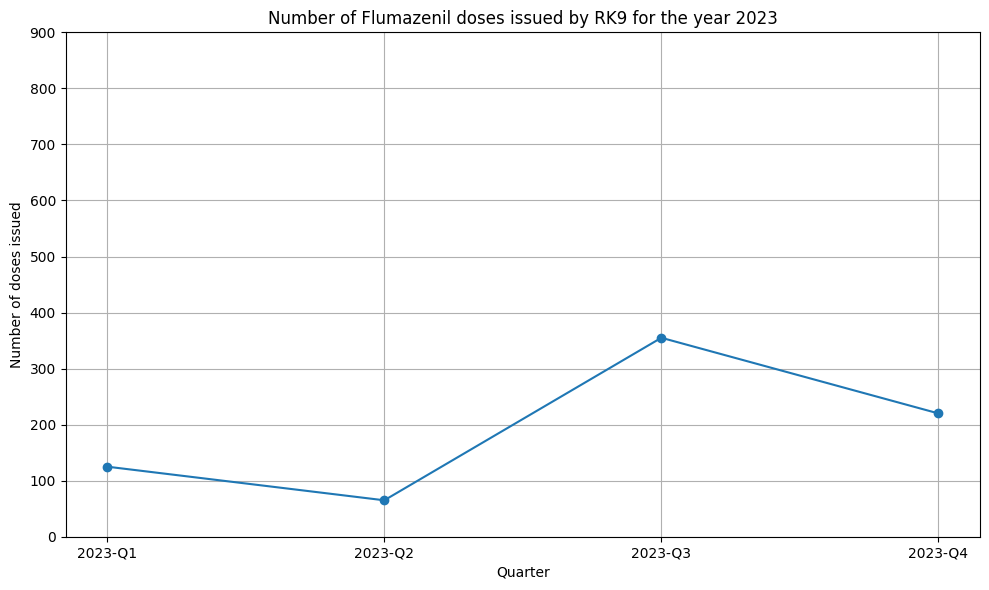

In [47]:
def quarter_based_flumazenil(df_flumazenil: pd.DataFrame, trust: str, year: int) -> pd.DataFrame:
    """
    Analyze and visualize quarterly Flumazenil doses for a specific trust and year.

    This function filters the Flumazenil data for a given trust and year,
    aggregates the doses by quarter, and creates a line plot of the results.

    Args:
        df_flumazenil (pd.DataFrame): DataFrame containing Flumazenil data.
        trust (str): Name of the NHS trust to analyze.
        year (int): Year to analyze.

    Returns:
        pd.DataFrame: DataFrame of quarterly Flumazenil doses for the specified trust and year.

    Side effects:
        Displays a matplotlib plot of quarterly Flumazenil doses.
    """
    # Filter data for the specific trust and year
    df_flumazenil_filtered = df_flumazenil[(df_flumazenil['ods_name'] == trust) & (df_flumazenil['year'] == year)]

    # Create a 'quarter' column
    df_flumazenil_filtered['quarter'] = pd.PeriodIndex(df_flumazenil_filtered['year_month'], freq='Q')

    # Calculate the total doses per quarter
    flumazenil_doses = df_flumazenil_filtered.groupby('quarter')["num_of_preparations"].sum().reset_index()

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(flumazenil_doses['quarter'].astype(str), flumazenil_doses['num_of_preparations'], marker='o')
    plt.title(f"Number of Flumazenil doses issued by {df_flumazenil_filtered['ods_code'].unique()[0]} for the year {year}")
    plt.xlabel("Quarter")
    plt.ylabel("Number of doses issued")
    plt.xticks(range(len(flumazenil_doses)), [f"{year}-Q{q.quarter}" for q in flumazenil_doses['quarter']])
    plt.yticks(range(0, 1000, 100))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

quarter_based_flumazenil(df_flumazenil, "University Hospitals Plymouth NHS Trust", 2023)

### Overall Quarterly Issuance of Flumazenil per year

<ipython-input-48-fe611bbc48ae>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



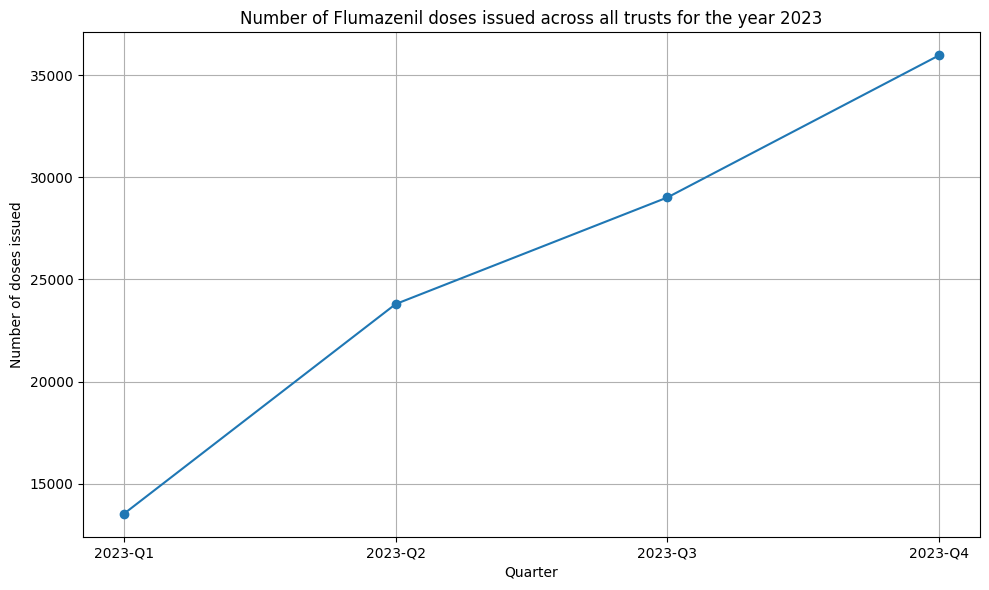

In [48]:
def quarter_based_flumazenil_all(df_flumazenil: pd.DataFrame, year: int) -> pd.DataFrame:
    """
    Analyze and visualize quarterly Flumazenil doses for a specific trust and year.

    This function filters the Flumazenil data for a given trust and year,
    aggregates the doses by quarter, and creates a line plot of the results.

    Args:
        df_flumazenil (pd.DataFrame): DataFrame containing Flumazenil data.
        trust (str): Name of the NHS trust to analyze.
        year (int): Year to analyze.

    Returns:
        pd.DataFrame: DataFrame of quarterly Flumazenil doses for the specified trust and year.

    Side effects:
        Displays a matplotlib plot of quarterly Flumazenil doses.
    """
    # Filter data for the specific trust and year
    df_flumazenil_filtered = df_flumazenil[(df_flumazenil['year'] == year)]

    # Create a 'quarter' column
    df_flumazenil_filtered['quarter'] = pd.PeriodIndex(df_flumazenil_filtered['year_month'], freq='Q')

    # Calculate the total doses per quarter
    flumazenil_doses = df_flumazenil_filtered.groupby('quarter')["num_of_preparations"].sum().reset_index()

    # return flumazenil_doses

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(flumazenil_doses['quarter'].astype(str), flumazenil_doses['num_of_preparations'], marker='o')
    plt.title(f"Number of Flumazenil doses issued across all trusts for the year {year}")
    plt.xlabel("Quarter")
    plt.ylabel("Number of doses issued")
    plt.xticks(range(len(flumazenil_doses)), [f"{year}-Q{q.quarter}" for q in flumazenil_doses['quarter']])
    # plt.yticks(range(0, 1000, 100))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

quarter_based_flumazenil_all(df_flumazenil, 2023)

## Midazolam (Yearly + Monthly) + Flumazenil (Monthly)

### all plots

In [49]:
def trust_all_plots(df_high_strength: pd.DataFrame, df_all_strengths: pd.DataFrame, df_flumazenil: pd.DataFrame, trust: str, year: int) -> None:

    """
    Generates three plots comparing high-strength midazolam and flumazenil usage for a specific trust and year.

    Args:
        df_high_strength (pd.DataFrame): DataFrame containing high-strength midazolam data.
        df_all_strengths (pd.DataFrame): DataFrame containing all midazolam data.
        df_flumazenil (pd.DataFrame): DataFrame containing flumazenil data.
        trust (str): Name of the trust to analyze.
        year (int): Year for which to analyze data.

    Returns:
        None: This function creates visualizations and does not return any data.
    """

    df_high_strength_filtered = df_high_strength[df_high_strength["ods_name"] == trust]

    year_based_midazolam_results = year_based_proportions_per_trust(df_high_strength, df_all_strengths, trust)

    month_based_midazolam_results = month_based_proportions(high_strength_df, df_midazolam, trust, year)

    month_based_flumazenil_results = month_based_flumazenil(df_flumazenil, trust, year)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    # plotting the first dataframe - yearly midazolam results
    ax1.plot(year_based_midazolam_results['year'], year_based_midazolam_results['percentage_high_strength_issued'], marker='o')
    ax1.set_title(f"Percentage of high-strength Midazolam Issued by {df_high_strength_filtered['ods_code'].unique()[0]} per year")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Percentage of high-strength Midazolam Issued")
    ax1.set_xticks(df_all_strengths.year.unique())
    ax1.set_yticks(range(0, 100, 10))
    ax1.grid(True)

    # plotting the second dataframe - monthly midazolam results
    ax2.plot(month_based_midazolam_results['month'], month_based_midazolam_results['percentage_high_strength_issued'], marker='o')
    ax2.set_title(f"Percentage of high-strength Midazolam Issued by {df_high_strength_filtered['ods_code'].unique()[0]} for the year {year}")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Percentage of high-strength Midazolam Issued")
    ax2.set_xticks(range(1,13))
    ax2.set_yticks(range(0, 100, 10))
    ax2.grid(True)

    # plotting the third dataframe - monthly flumazenil results
    ax3.plot(month_based_flumazenil_results['month'], month_based_flumazenil_results['num_of_preparations'], marker='o')
    ax3.set_title(f"Number of Flumazenil doses Issued by {df_high_strength_filtered['ods_code'].unique()[0]} for the year {year}")
    ax3.set_xlabel("Month")
    ax3.set_ylabel("Number of doses issued")
    ax3.set_xticks(range(1,13))
    ax3.set_yticks(range(-200, 500, 50))
    ax3.grid(True)

    fig.tight_layout()
    plt.show()

#### examples

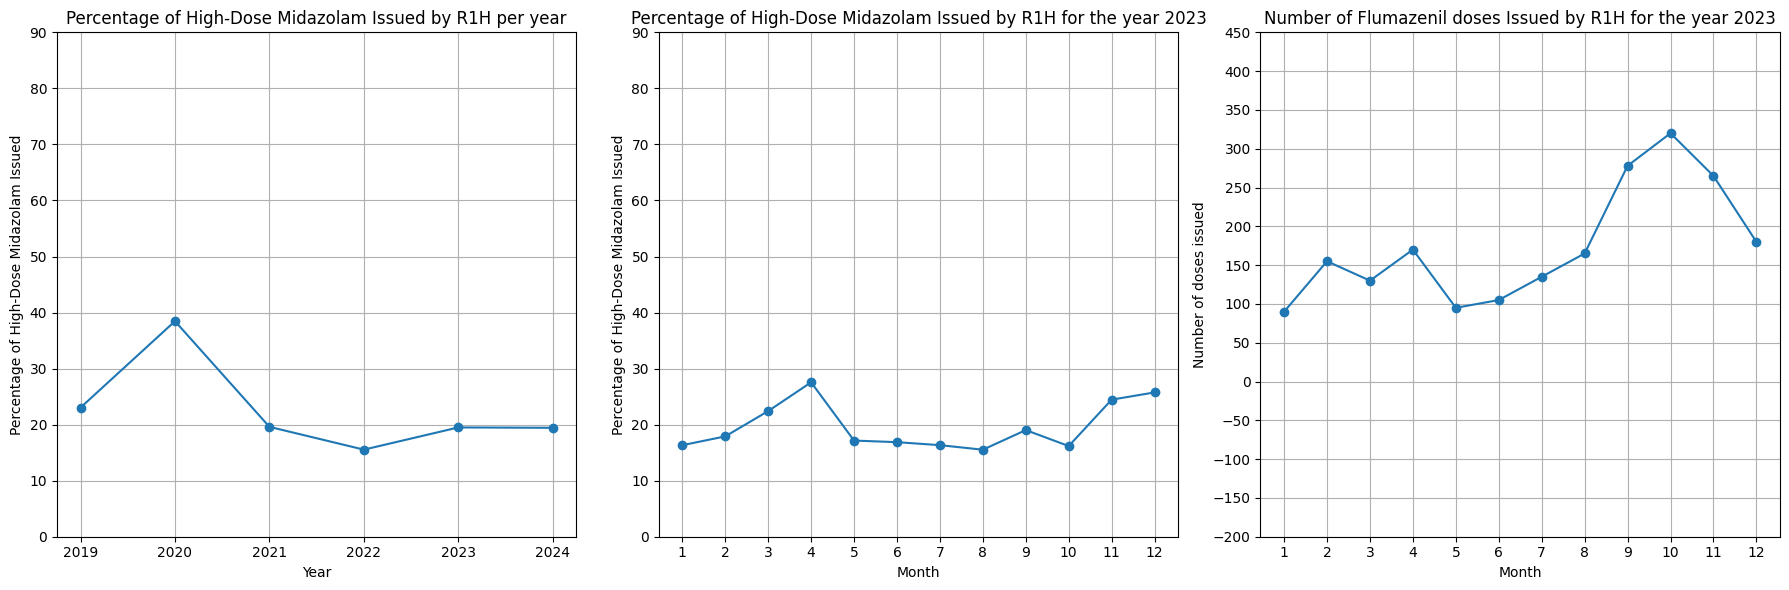

In [50]:
trust_all_plots(high_strength_df, df_midazolam, df_flumazenil, "Barts Health NHS Trust", 2023)

### yearly trends midazolam per trust

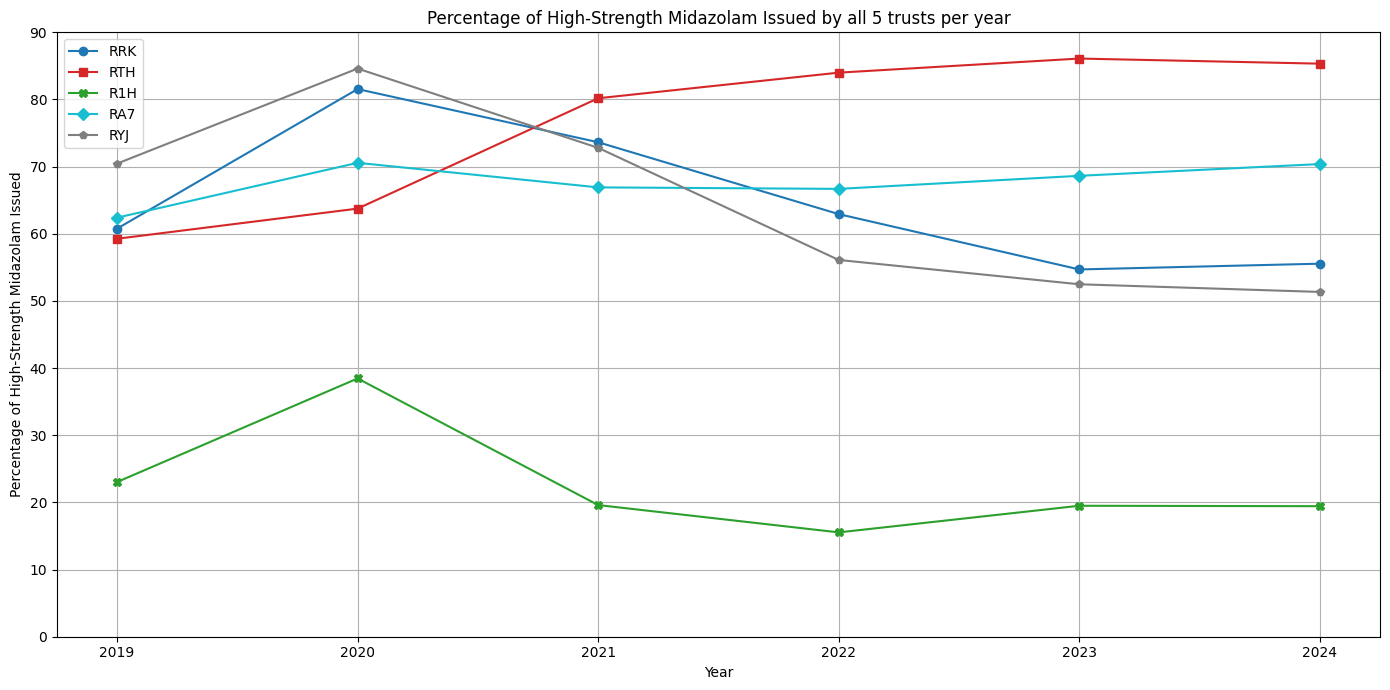

In [51]:
def trust_yearly_variation(df_high_strength: pd.DataFrame, df_all_strengths: pd.DataFrame, trusts: List) -> None:

    """
    Plots the yearly variation in high-strength midazolam for a given trust across several years

    Args:
    df_high_strength (pd.DataFrame): DataFrame containing high-strength midazolam issuance data.
    df_all_strengths (pd.DataFrame): DataFrame containing all midazolam issuance data.
    trusts (List[str]): List of trust names to analyze.

    Returns:
        None (This function generates a plot and does not return a value)
    """

    trust_records = []
    for trust in trusts:
        trust_records.append(year_based_proportions_per_trust(df_high_strength, df_all_strengths, trust))

    fig, ax1 = plt.subplots(figsize=(14, 7))
    colors = ["tab:blue", "tab:red", "tab:green", "tab:cyan", "tab:gray"]
    markers = ['o', 's', 'X', 'D', 'p']
    for idx, trust_record in enumerate(trust_records):

        df_high_strength_filtered = df_high_strength[df_high_strength['ods_name'] == trusts[idx]]
        ax1.plot(trust_record['year'], trust_record['percentage_high_strength_issued'], marker=markers[idx], color=colors[idx], label=df_high_strength_filtered['ods_code'].unique()[0])

    ax1.set_title(f"Percentage of High-Strength Midazolam Issued by all 5 trusts per year")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Percentage of High-Strength Midazolam Issued")
    ax1.set_xticks(df_all_strengths.year.unique())
    ax1.set_yticks(range(0, 100, 10))
    ax1.grid(True)
    ax1.legend(loc="upper left")

    fig.tight_layout()
    plt.show()


trusts_list = ["University Hospitals Birmingham NHS Foundation Trust", "Oxford University Hospitals NHS Foundation Trust",
                "Barts Health NHS Trust", "University Hospitals Bristol and Weston NHS Foundation Trust",
                "Imperial College Healthcare NHS Trust"]
trust_yearly_variation(high_strength_df, df_midazolam, trusts_list)

### monthly trends midazolam per tust

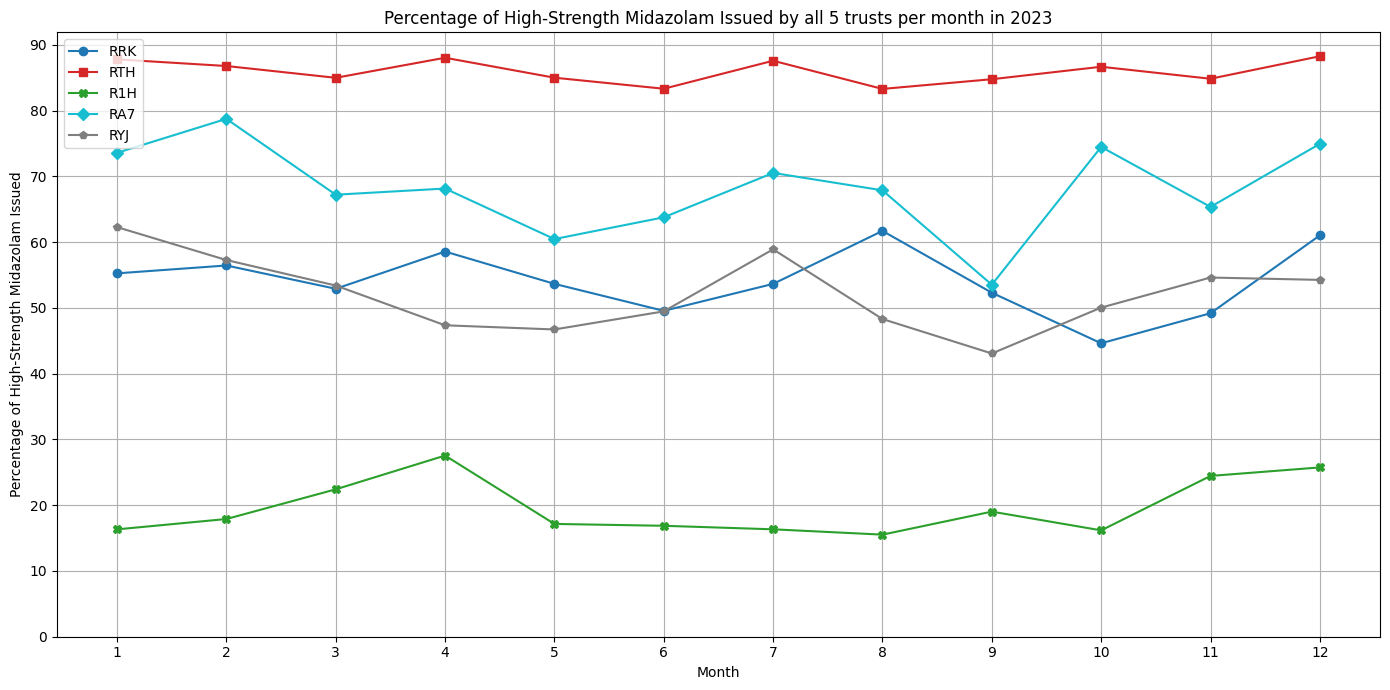

In [52]:
def trust_monthly_variation(df_high_strength: pd.DataFrame, df_all_strengths: pd.DataFrame, trusts: List, year: int) -> None:

    """
    Plots the monthly variation in issuance of high-strength midazolam for a given trust in a given year.

    Args:
    df_high_strength (pd.DataFrame): DataFrame containing high-strength midazolam issuance data.
    df_all_strengths (pd.DataFrame): DataFrame containing all midazolam issuance data.
    trusts (List[str]): List of trust names to analyze.

    Returns:
        None (This function generates a plot and does not return a value)
    """

    trust_records = []
    for trust in trusts:
        trust_records.append(month_based_proportions(df_high_strength, df_all_strengths, trust, year))

    fig, ax1 = plt.subplots(figsize=(14, 7))
    colors = ["tab:blue", "tab:red", "tab:green", "tab:cyan", "tab:gray"]
    markers = ['o', 's', 'X', 'D', 'p']
    for idx, trust_record in enumerate(trust_records):

        df_high_strength_filtered = df_high_strength[df_high_strength['ods_name'] == trusts[idx]]
        ax1.plot(trust_record['month'], trust_record['percentage_high_strength_issued'], marker=markers[idx], color=colors[idx], label=df_high_strength_filtered['ods_code'].unique()[0])

    ax1.set_title(f"Percentage of High-Strength Midazolam Issued by all 5 trusts per month in {year}")
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Percentage of High-Strength Midazolam Issued")
    ax1.set_xticks(df_all_strengths.month.unique())
    ax1.set_yticks(range(0, 100, 10))
    ax1.grid(True)
    ax1.legend(loc="upper left")

    fig.tight_layout()
    plt.show()


trusts_list = ["University Hospitals Birmingham NHS Foundation Trust", "Oxford University Hospitals NHS Foundation Trust",
                "Barts Health NHS Trust", "University Hospitals Bristol and Weston NHS Foundation Trust",
                "Imperial College Healthcare NHS Trust"]
trust_monthly_variation(high_strength_df, df_midazolam, trusts_list, 2023)

### yearly trends flumazenil per trust

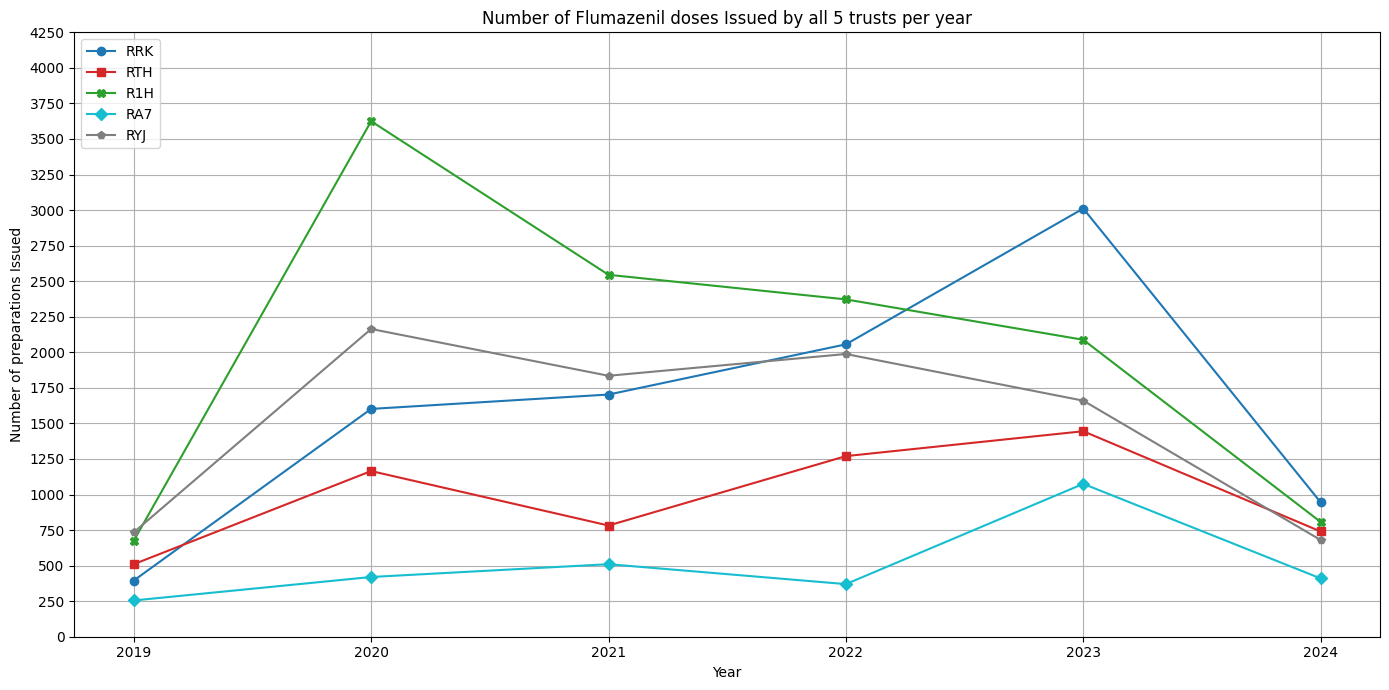

In [53]:
def trust_yearly_flumazenil_variation(df_flumazenil: pd.DataFrame, trusts: List) -> None:

    """
    Generates a plot of the yearly variation in number of flumazenil ampoules issued in a given trust

    Args:
    df_flumazenil (pd.DataFrame): Dataframe containing flumazenil data
    trusts (List[str]): List of trust names to analyze.

    Returns:
        None (This function generates a plot and does not return a value)
    """

    trust_records = []
    for trust in trusts:
        trust_records.append(year_based_flumazenil_per_trust(df_flumazenil, trust))

    fig, ax1 = plt.subplots(figsize=(14, 7))
    colors = ["tab:blue", "tab:red", "tab:green", "tab:cyan", "tab:gray"]
    markers = ['o', 's', 'X', 'D', 'p']
    for idx, trust_record in enumerate(trust_records):

        df_flumazenil_filtered = df_flumazenil[df_flumazenil['ods_name'] == trusts[idx]]
        ax1.plot(trust_record['year'], trust_record['num_of_preparations'], marker=markers[idx], color=colors[idx], label=df_flumazenil_filtered['ods_code'].unique()[0])

    ax1.set_title(f"Number of Flumazenil doses Issued by all 5 trusts per year")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Number of preparations Issued")
    ax1.set_xticks(df_flumazenil.year.unique())
    ax1.set_yticks(range(0, 4500, 250))
    ax1.grid(True)
    ax1.legend(loc="upper left")

    fig.tight_layout()
    plt.show()


trusts_list = ["University Hospitals Birmingham NHS Foundation Trust", "Oxford University Hospitals NHS Foundation Trust",
                "Barts Health NHS Trust", "University Hospitals Bristol and Weston NHS Foundation Trust",
                "Imperial College Healthcare NHS Trust"]
trust_yearly_flumazenil_variation(df_flumazenil, trusts_list)

### monthly trends flumazenil per trust

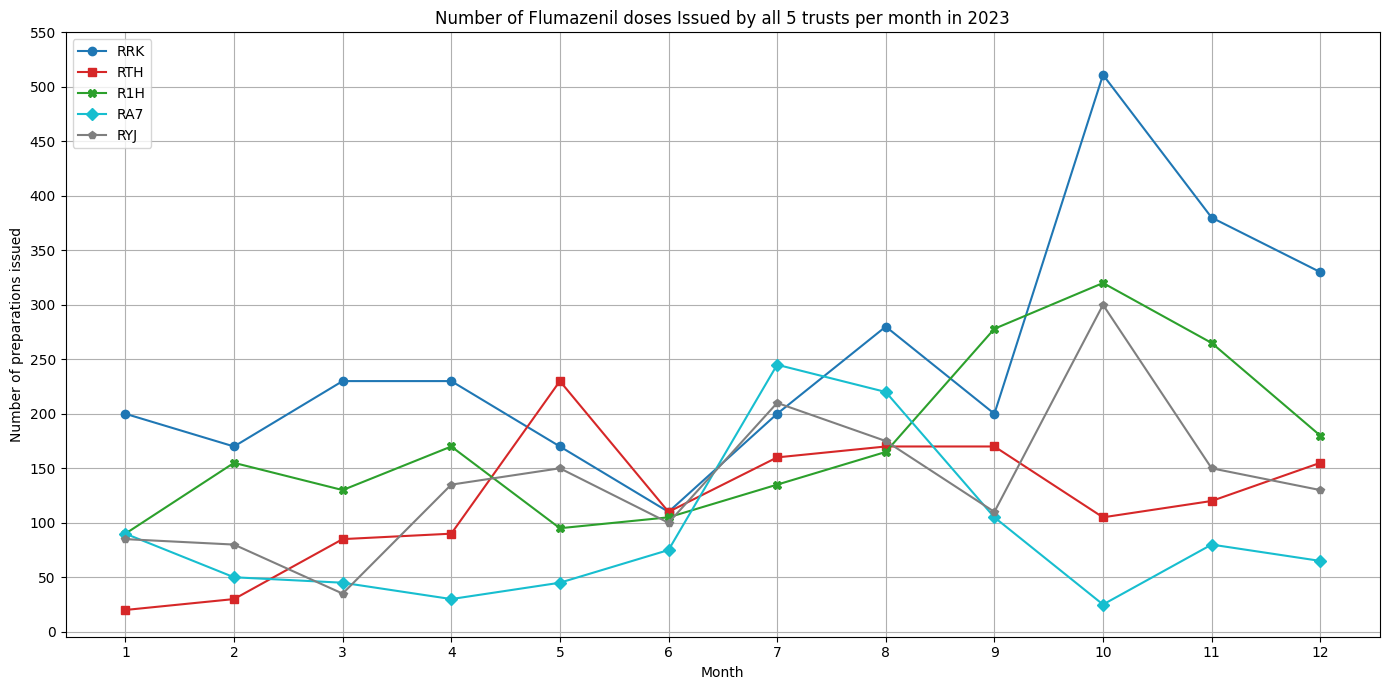

In [54]:
def trust_monthly_flumazenil_variation(df_flumazenil: pd.DataFrame, trusts: List, year: int) -> None:

    """
    Generates a plot of the monthly variation in number of flumazenil ampoules issued by a given trust in a particular year

    Args:
    df_flumazenil (pd.DataFrame): Dataframe containing flumazenil data
    trusts (List[str]): List of trust names to analyze.
    year (int): Year of interest

    Returns:
        None (This function generates a plot and does not return a value)
    """

    trust_records = []
    for trust in trusts:
        trust_records.append(month_based_flumazenil(df_flumazenil, trust, year))

    fig, ax1 = plt.subplots(figsize=(14, 7))
    colors = ["tab:blue", "tab:red", "tab:green", "tab:cyan", "tab:gray"]
    markers = ['o', 's', 'X', 'D', 'p']
    for idx, trust_record in enumerate(trust_records):

        df_flumazenil_filtered = df_flumazenil[df_flumazenil['ods_name'] == trusts[idx]]
        ax1.plot(trust_record['month'], trust_record['num_of_preparations'], marker=markers[idx], color=colors[idx], label=df_flumazenil_filtered['ods_code'].unique()[0])

    ax1.set_title(f"Number of Flumazenil doses Issued by all 5 trusts per month in {year}")
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Number of preparations issued")
    ax1.set_xticks(df_flumazenil.month.unique())
    ax1.set_yticks(range(0, 600, 50))
    ax1.grid(True)
    ax1.legend(loc="upper left")

    fig.tight_layout()
    plt.show()


trusts_list = ["University Hospitals Birmingham NHS Foundation Trust", "Oxford University Hospitals NHS Foundation Trust",
                "Barts Health NHS Trust", "University Hospitals Bristol and Weston NHS Foundation Trust",
                "Imperial College Healthcare NHS Trust"]
trust_monthly_flumazenil_variation(df_flumazenil, trusts_list, 2023)

### Yearly regional maps - flumazenil and midazolam

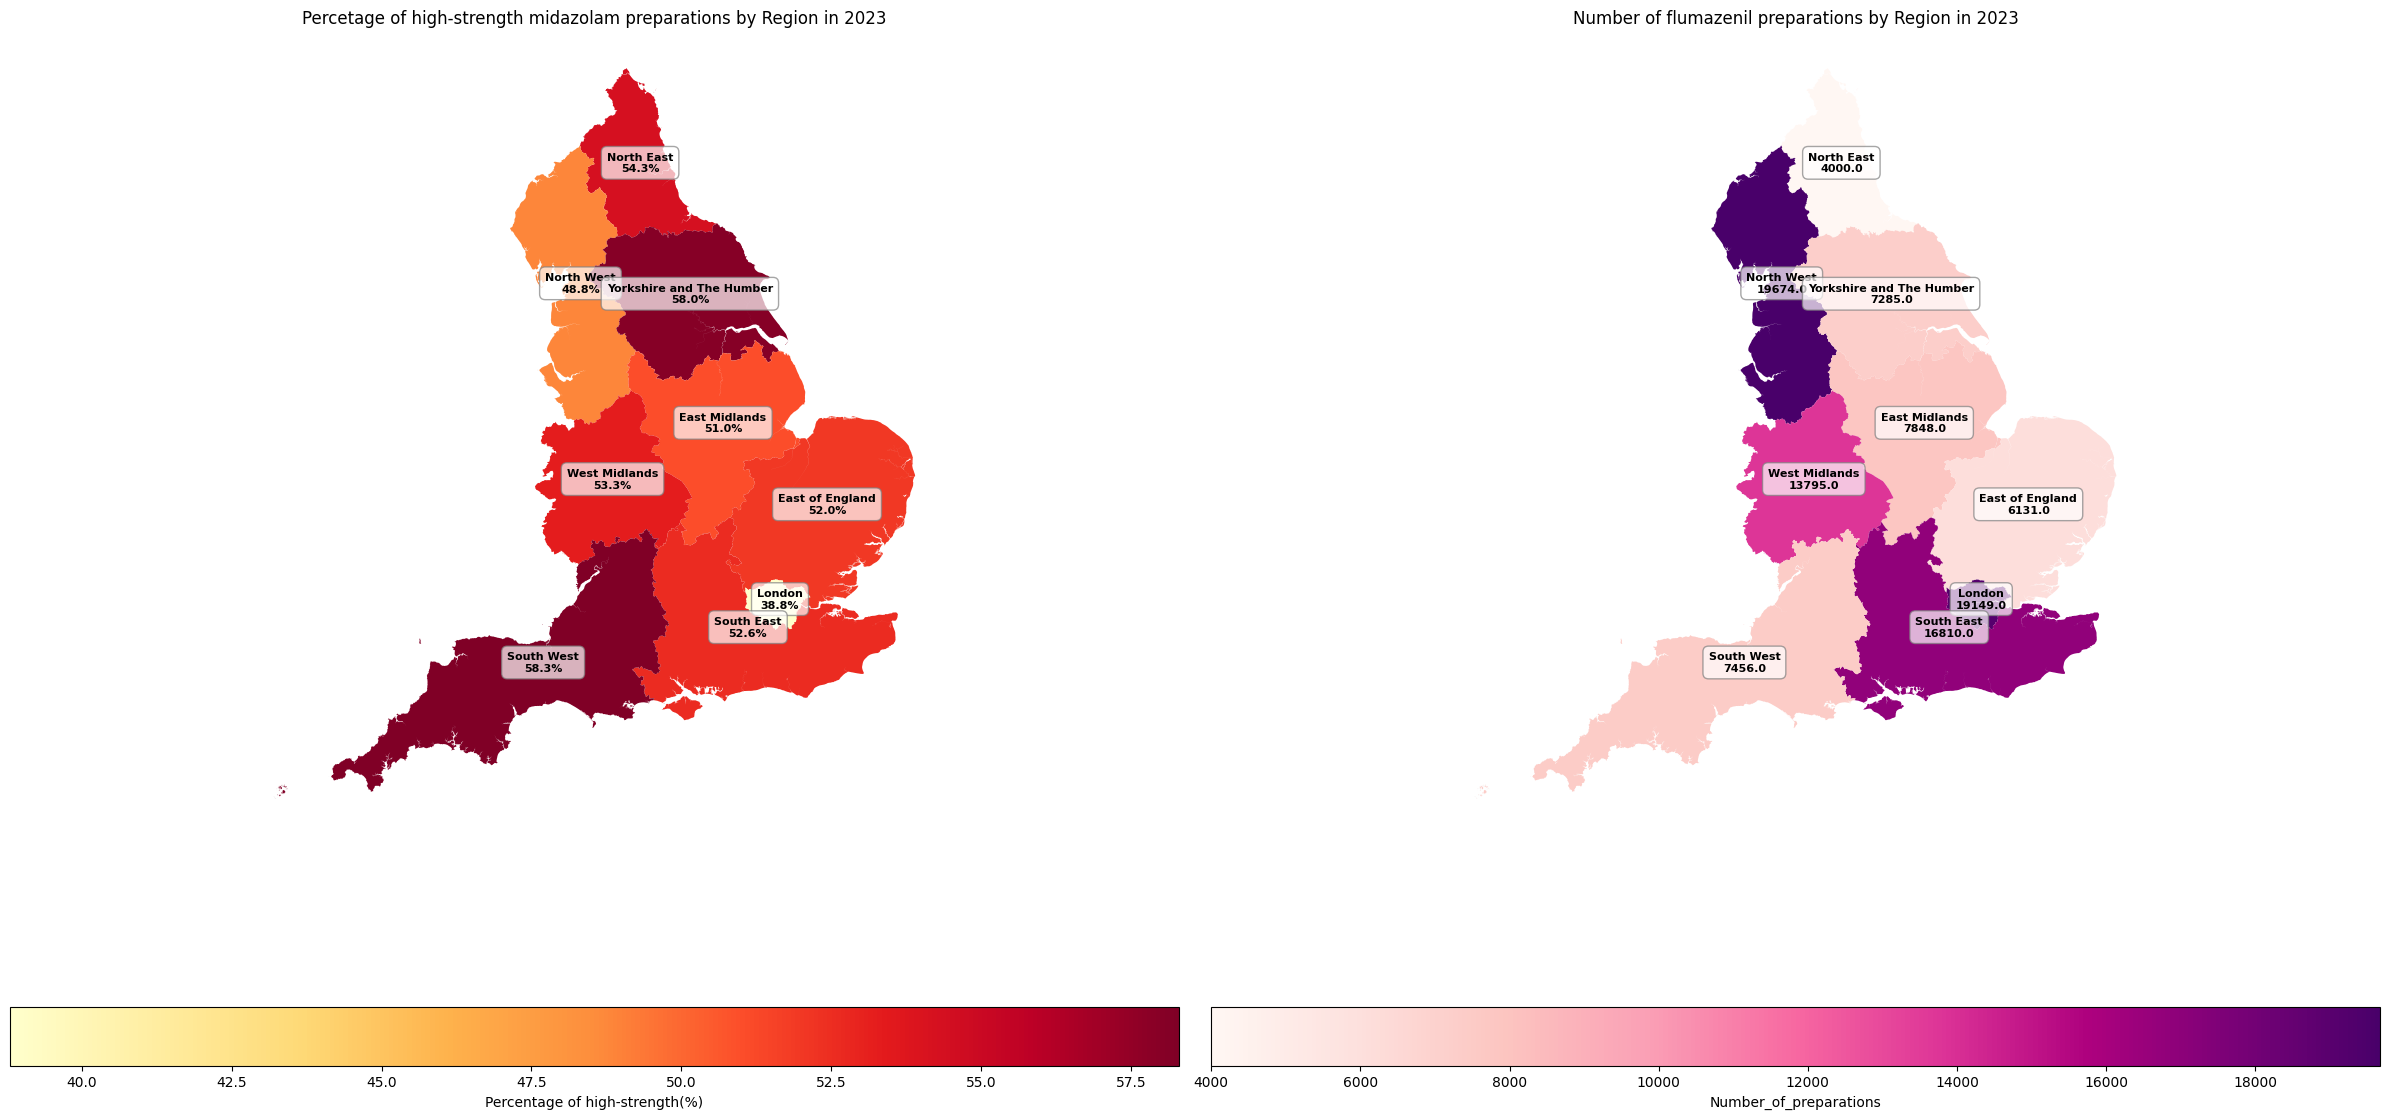

In [55]:
def regional_plots(df1: pd.DataFrame, df2: pd.DataFrame, df3: pd.DataFrame, year: int, col: str):

    """
    Generates a plot of regional variation in proportions of high-strength midazolam issued and the number of flumazenil ampoules issued in a given year

    Args:
    df1 (pd.DataFrame): Dataframe of high-strength midazolam
    df2 (pd.DataFrame): Dataframe of all-dose midazolam
    df3 (pd.DataFrame): Dataframe containing flumazenil data
    year (int): Year to analyze.

    Returns:
        None (This function generates a plot and does not return a value)
    """

    region_high_dose_proportions_per_year = df1.pipe(proportions, df2, year=year, groupby_col=col)
    region_flumazenil_per_year = df3.pipe(year_based_flumazenil_per_region, year=year)

    england_map = gpd.read_file('../data/england_shapefile')

    midazolam_merged_data = england_map.merge(region_high_dose_proportions_per_year, left_on='RGN23NM', right_on='region')
    flumazenil_merged_data = england_map.merge(region_flumazenil_per_year, left_on='RGN23NM', right_on='region')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))
    midazolam_merged_data.plot(column='percentage_high_strength_issued (%)', cmap='YlOrRd', legend=True, ax=ax1,
                     legend_kwds={'label': 'Percentage of high-strength(%)', 'orientation': 'horizontal'})

    # Add annotations for each region
    for idx, row in midazolam_merged_data.iterrows():
        centroid = row.geometry.centroid
        ax1.annotate(text=f"{row['region']}\n{row['percentage_high_strength_issued (%)']:.1f}%",
                    xy=(centroid.x, centroid.y),
                    xytext=(3, 3),
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.7))

    ax1.set_title(f'Percetage of high-strength midazolam preparations by Region in {year}')
    ax1.axis('off')

    flumazenil_merged_data.plot(column='num_of_preparations', cmap='RdPu', legend=True, ax=ax2,
                     legend_kwds={'label': 'Number_of_preparations', 'orientation': 'horizontal'})

    # Add annotations for each region
    for idx, row in flumazenil_merged_data.iterrows():
        centroid = row.geometry.centroid
        ax2.annotate(text=f"{row['region']}\n{row['num_of_preparations']}",
                    xy=(centroid.x, centroid.y),
                    xytext=(3, 3),
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=8, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.7))

    ax2.set_title(f'Number of flumazenil preparations by Region in {year}')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

regional_plots(high_strength_df, df_midazolam, df_flumazenil, 2023, "region")

## Ratio of midazolam issuing to flumazenil issuing

In [56]:
def midazolam_flumazenil_ratios(year: int, df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the ratio of high-strength midazolam to flumazenil preparations for each trust in a given year.

    Args:
    year (int): The year for which to calculate the ratios.
    df1 (pd.DataFrame): DataFrame containing flumazenil data.
    df2 (pd.DataFrame): DataFrame containing midazolam data.

    Returns:
    pd.DataFrame: A DataFrame with columns for trust name, flumazenil doses, midazolam doses, and their ratio.
    """
    # Filter data for the specified year
    df1 = df1[df1["year"] == year]
    df2 = df2[df2["year"] == year]

    # Calculate total flumazenil doses for each trust
    trusts_flumazenil = df1.groupby("ods_name")["num_of_preparations"].sum().reset_index()
    trusts_flumazenil.columns = ["ods_name", "flumazenil_doses"]

    # Calculate total midazolam doses for each trust
    trusts_midazolam = df2.groupby('ods_name')["num_of_preparations"].sum().reset_index()
    trusts_midazolam.columns = ["ods_name", "midazolam_doses"]

    # Merge flumazenil and midazolam data
    flumazenil_midazolam = trusts_flumazenil.merge(trusts_midazolam, on="ods_name")

    # Calculate the ratio of midazolam to flumazenil doses
    flumazenil_midazolam["midazolam:flumazenil"] = round(flumazenil_midazolam["midazolam_doses"] / flumazenil_midazolam["flumazenil_doses"])

    return flumazenil_midazolam

### 2024

In [57]:
flumazenil_midazolam_2024 = midazolam_flumazenil_ratios(2024, df_flumazenil, high_strength_df)
flumazenil_midazolam_2024.head()

ods_name  flumazenil_doses  \
0                      Airedale NHS Foundation Trust              15.0   
1          Alder Hey Children's NHS Foundation Trust              40.0   
2  Ashford and St Peter's Hospitals NHS Foundatio...             200.0   
3  Avon and Wiltshire Mental Health Partnership N...             468.0   
4  Barking, Havering and Redbridge University Hos...             190.0   

   midazolam_doses  midazolam:flumazenil  
0           6123.0                 408.0  
1           4479.0                 112.0  
2           4872.0                  24.0  
3             60.0                   0.0  
4           7557.0                  40.0

ranking of trusts based on their ratio of midazolam release to flumazenil release - top 25

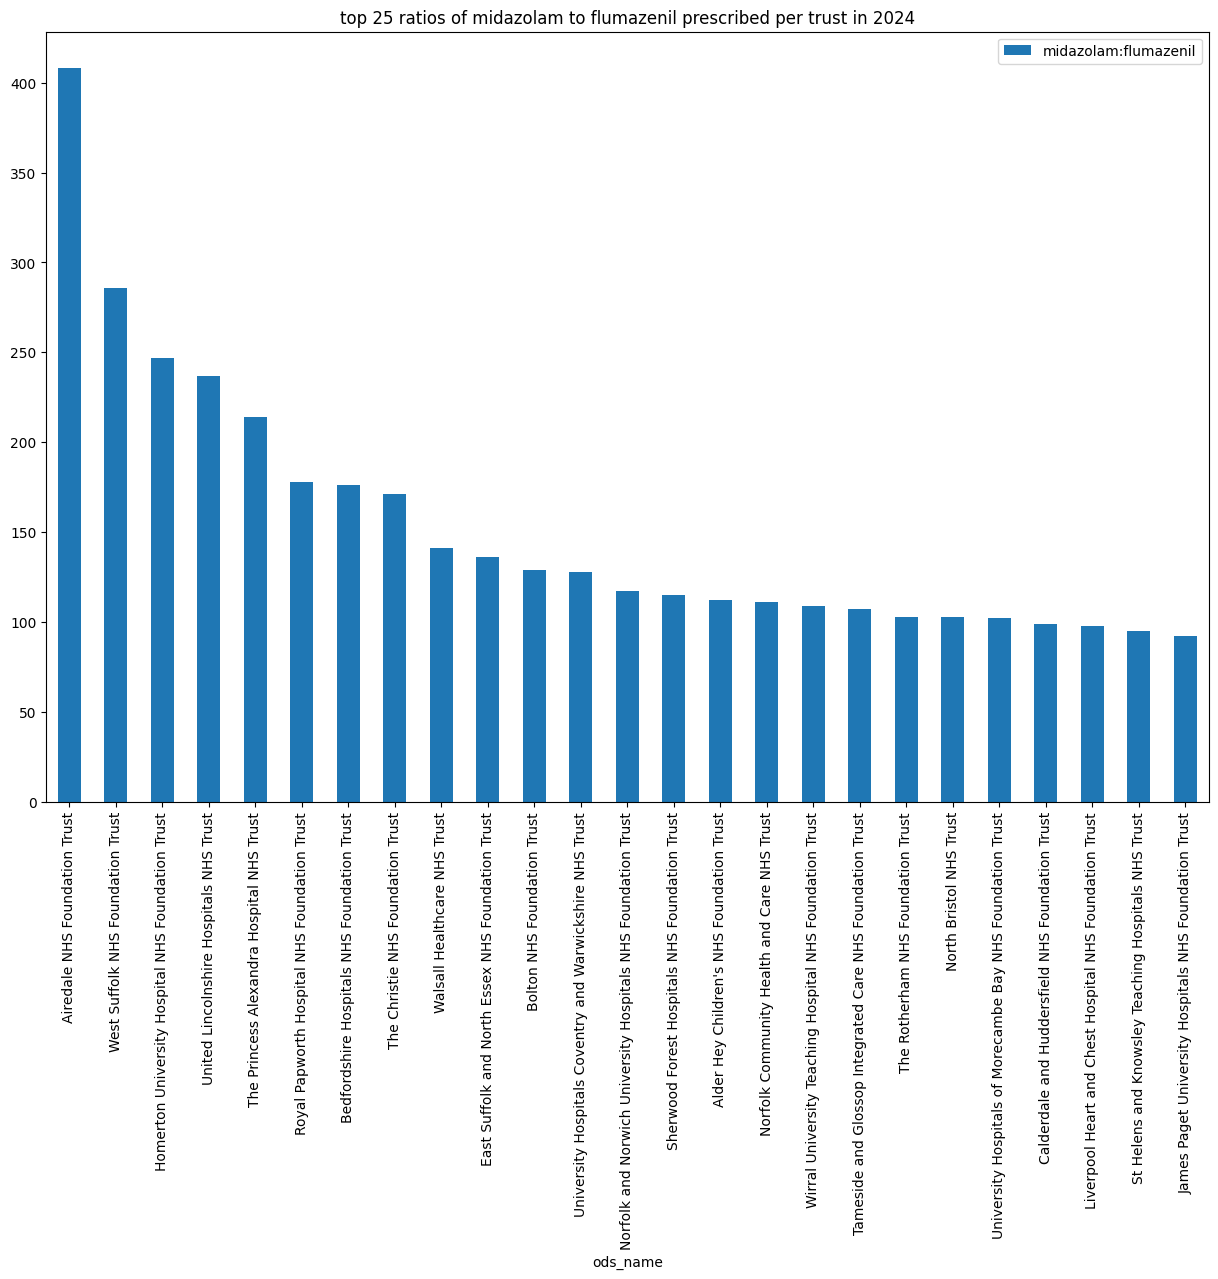

In [58]:
flumazenil_midazolam_2024.groupby("ods_name")["midazolam:flumazenil"].sum().reset_index().sort_values(by="midazolam:flumazenil", ascending=False)[:25].plot(x="ods_name", kind="bar", figsize=(15,10))
plt.title("top 25 ratios of midazolam to flumazenil prescribed per trust in 2024")
plt.show()

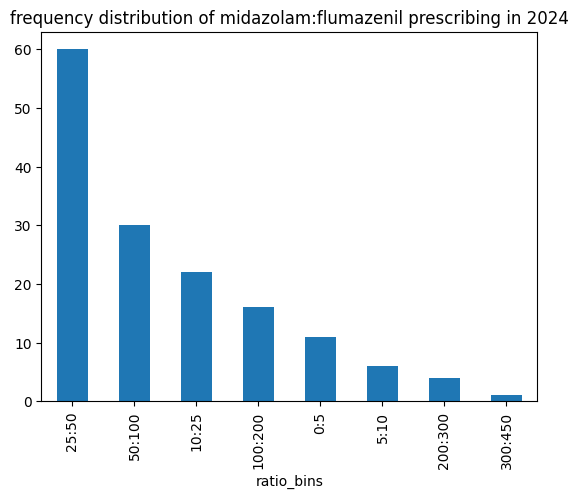

In [59]:
# flumazenil_midazolam["midazolam:flumazenil"].value_counts()

bins = [0, 5, 10, 25, 50, 100, 200, 300, 450]

labels = ["0:5", "5:10", "10:25", "25:50", "50:100", "100:200", "200:300", "300:450"]

flumazenil_midazolam_2024["ratio_bins"] = pd.cut(flumazenil_midazolam_2024["midazolam:flumazenil"], bins, labels=labels)

flumazenil_midazolam_2024.ratio_bins.value_counts().plot(kind="bar")

plt.title("frequency distribution of midazolam:flumazenil prescribing in 2024")
plt.show()

### 2023

In [60]:
flumazenil_midazolam_2023 = midazolam_flumazenil_ratios(2023, df_flumazenil, high_strength_df)
flumazenil_midazolam_2023.head()

ods_name  flumazenil_doses  \
0                      Airedale NHS Foundation Trust              75.0   
1          Alder Hey Children's NHS Foundation Trust             145.0   
2  Ashford and St Peter's Hospitals NHS Foundatio...             351.0   
3  Avon and Wiltshire Mental Health Partnership N...              60.0   
4  Barking, Havering and Redbridge University Hos...             558.0   

   midazolam_doses  midazolam:flumazenil  
0          19416.0                 259.0  
1          17277.0                 119.0  
2          18753.0                  53.0  
3            897.0                  15.0  
4          29049.0                  52.0

In [61]:
sorted_flumazenil_midazolam_2023 = flumazenil_midazolam_2023.sort_values(by="midazolam:flumazenil", ascending=False)
sorted_flumazenil_midazolam_2023.head()

ods_name  flumazenil_doses  \
92                           North Bristol NHS Trust             175.0   
140  Tees, Esk and Wear Valleys NHS Foundation Trust               5.0   
6             Barnsley Hospital NHS Foundation Trust             102.0   
149               The Rotherham NHS Foundation Trust              70.0   
0                      Airedale NHS Foundation Trust              75.0   

     midazolam_doses  midazolam:flumazenil  
92           90108.0                 515.0  
140           1818.0                 364.0  
6            32376.0                 317.0  
149          20085.0                 287.0  
0            19416.0                 259.0

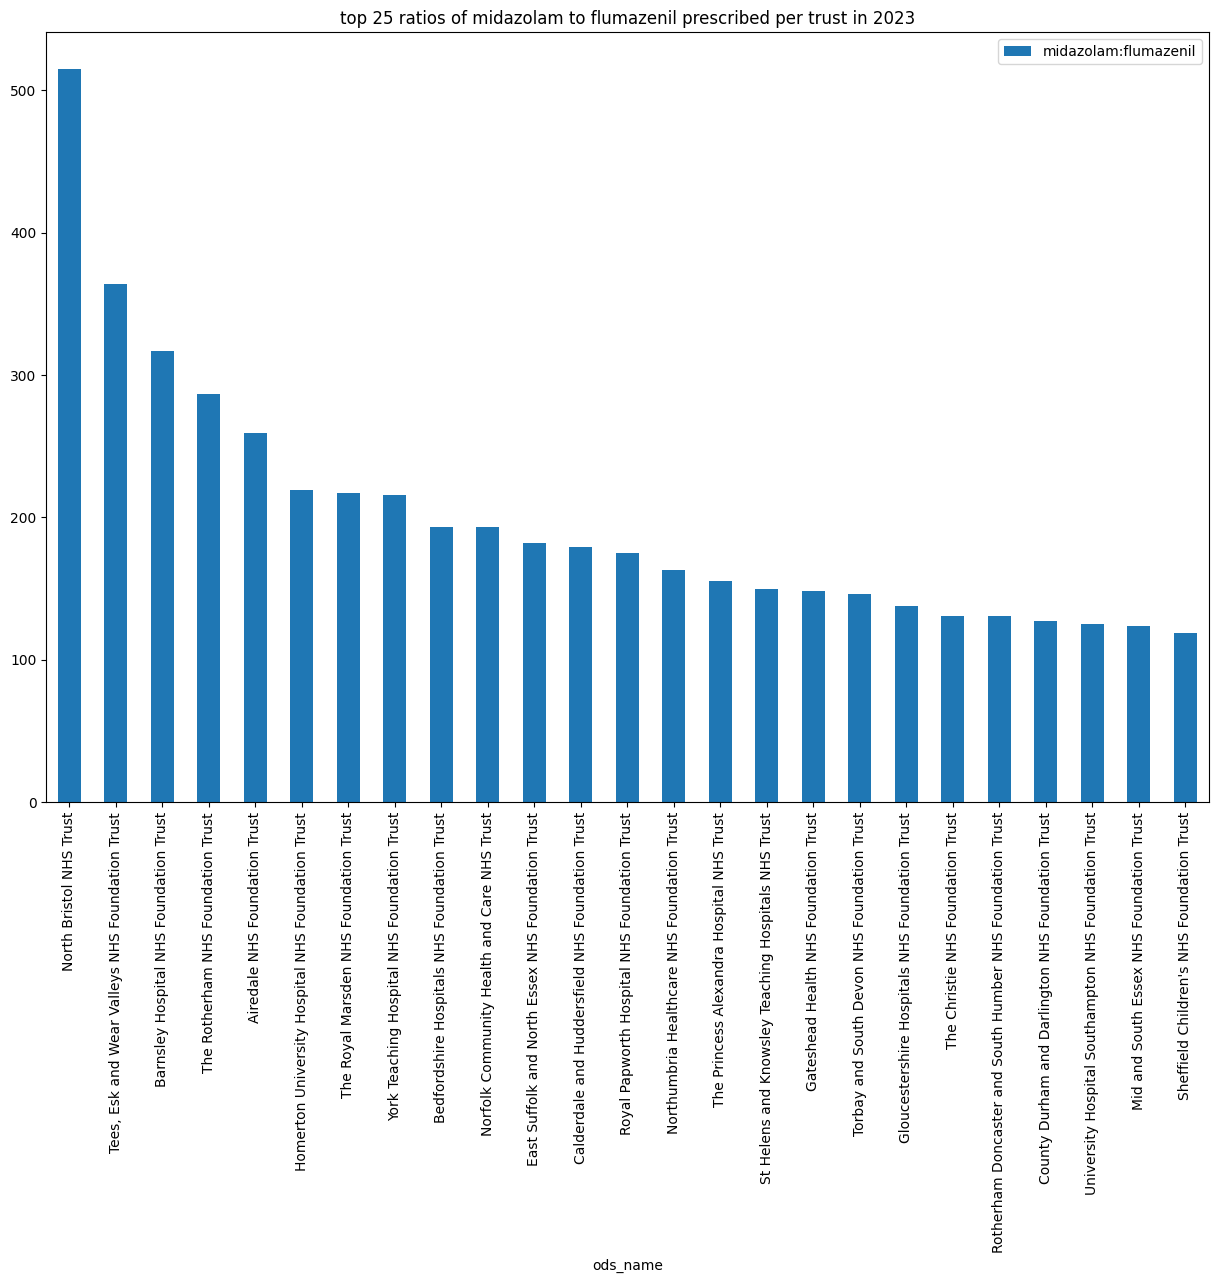

In [62]:
flumazenil_midazolam_2023.groupby("ods_name")["midazolam:flumazenil"].sum().reset_index().sort_values(by="midazolam:flumazenil", ascending=False)[:25].plot(x="ods_name", kind="bar", figsize=(15,10))
plt.title("top 25 ratios of midazolam to flumazenil prescribed per trust in 2023")
plt.show()

### Funnel plot to visualize the ratios

In [63]:
def midazolam_flumazenil_ratios_funnel(year: int, df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the ratio of midazolam to flumazenil doses in a given year and visualize it using a funnel plot.

    Args:
    year (int): The year for which to calculate the ratios.
    df1 (pd.DataFrame): DataFrame containing flumazenil data.
    df2 (pd.DataFrame): DataFrame containing midazolam data.

    Returns:
    pd.DataFrame: A DataFrame with columns for trust name, flumazenil doses, midazolam doses, and their ratio.
    """
    # Filter data for the specified year
    df1 = df1[df1["year"] == year]
    df2 = df2[df2["year"] == year]

    # Calculate total flumazenil doses for each trust
    trusts_flumazenil = df1.groupby("ods_name")["num_of_preparations"].sum().reset_index()
    trusts_flumazenil.columns = ["ods_name", "flumazenil_doses"]

    # Calculate total midazolam doses for each trust
    trusts_midazolam = df2.groupby('ods_name')["num_of_preparations"].sum().reset_index()
    trusts_midazolam.columns = ["ods_name", "midazolam_doses"]

    # Merge flumazenil and midazolam data
    flumazenil_midazolam = trusts_flumazenil.merge(trusts_midazolam, on="ods_name")

    # Calculate the ratio of midazolam to flumazenil doses
    flumazenil_midazolam["midazolam:flumazenil"] = round(flumazenil_midazolam["midazolam_doses"] / flumazenil_midazolam["flumazenil_doses"])

    bins = [0, 5, 10, 25, 50, 100, 200, 300, 450]
    labels = ["0:5", "5:10", "10:25", "25:50", "50:100", "100:200", "200:300", "300:450"]

    flumazenil_midazolam["ratio_bins"] = pd.cut(flumazenil_midazolam["midazolam:flumazenil"], bins, labels=labels, include_lowest=True)

    # Count the number of trusts in each ratio bin
    ratio_bin_counts = flumazenil_midazolam.groupby("ratio_bins").size().reset_index(name='count')

    # Create a hover data dictionary with lists of trusts in each ratio bin
    hover_data = flumazenil_midazolam.groupby("ratio_bins").apply(lambda x: x["ods_name"].tolist()).reset_index(name='Trusts')

    # Merge the counts and hover data
    ratio_bin_counts = ratio_bin_counts.merge(hover_data, on="ratio_bins")

    # Plot the ratios using a funnel plot with Plotly Express
    fig = px.funnel(ratio_bin_counts,
                    x="count",
                    y="ratio_bins",
                    hover_data={"Trusts": True},
                    title=f"Funnel Plot of Midazolam vs Flumazenil Doses in {year}",
                    labels={"count": "Number of Trusts", "ratio_bins": "Midazolam:Flumazenil Ratio Bins"})

    # Save the plot as an HTML file to retain interactivity
    fig.write_html(f"midazolam_flumazenil_funnel_{year}.html")
    fig.show()

midazolam_flumazenil_ratios_funnel(2023, df_flumazenil, high_strength_df)

<ipython-input-63-f277b0cb1803>:37: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-63-f277b0cb1803>:40: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Bubble plots for ratios

In [64]:
def midazolam_flumazenil_ratios_bubble(year: int, df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the ratio of midazolam to flumazenil doses in a given year and visualize it using a bubble plot.

    Args:
    year (int): The year for which to calculate the ratios.
    df1 (pd.DataFrame): DataFrame containing flumazenil data.
    df2 (pd.DataFrame): DataFrame containing midazolam data.

    Returns:
    pd.DataFrame: A DataFrame with columns for trust name, flumazenil doses, midazolam doses, and their ratio.
    """
    # Filter data for the specified year
    df1 = df1[df1["year"] == year]
    df2 = df2[df2["year"] == year]

    # Calculate total flumazenil doses for each trust
    trusts_flumazenil = df1.groupby("ods_name")["num_of_preparations"].sum().reset_index()
    trusts_flumazenil.columns = ["ods_name", "flumazenil_doses"]

    # Calculate total midazolam doses for each trust
    trusts_midazolam = df2.groupby('ods_name')["num_of_preparations"].sum().reset_index()
    trusts_midazolam.columns = ["ods_name", "midazolam_doses"]

    # Merge flumazenil and midazolam data
    flumazenil_midazolam = trusts_flumazenil.merge(trusts_midazolam, on="ods_name")

    # Calculate the ratio of midazolam to flumazenil doses
    flumazenil_midazolam["midazolam:flumazenil"] = round(flumazenil_midazolam["midazolam_doses"] / flumazenil_midazolam["flumazenil_doses"])

    # Plot the ratios using a bubble plot with Plotly Express
    fig = px.scatter(flumazenil_midazolam,
                     x="midazolam_doses",
                     y="flumazenil_doses",
                     size="midazolam:flumazenil",
                     hover_name="ods_name",
                     hover_data={"midazolam:flumazenil": True},
                     title=f"Bubble Plot of Midazolam vs Flumazenil Doses in {year}",
                     labels={"midazolam_doses": "Midazolam Doses", "flumazenil_doses": "Flumazenil Doses"},
                     size_max=60)

    # Save the plot as an HTML file to retain interactivity
    fig.write_html(f"midazolam_flumazenil_bubble_{year}.html")
    fig.show()


midazolam_flumazenil_ratios_bubble(2023, df_flumazenil, high_strength_df)

### ratios per uom

In [65]:
df_flumazenil.unit_dose_uom.unique()

array(['ampoule'], dtype=object)

observation: flumazenil comes only in ampoules

In [66]:
def uom_midazolam_flumazenil_ratios(year: int, df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the ratio of midazolam to flumazenil doses for each trust and unit dose uom in a given year.

    Args:
    year (int): The year for which to calculate the ratios.
    df1 (pd.DataFrame): DataFrame containing flumazenil data.
    df2 (pd.DataFrame): DataFrame containing midazolam data.

    Returns:
    pd.DataFrame: A DataFrame with columns for trust name, unit dose uom, flumazenil doses, midazolam doses, and their ratio.
    """

    df1 = df1[df1["year"] == year]
    df2 = df2[df2["year"] == year]

    uom_flumazenil_all = df1.groupby(["ods_name", "unit_dose_uom"])["num_of_preparations"].sum().reset_index()
    uom_flumazenil_all.columns = ["ods_name", "unit_dose_uom", "num_flumazenil_doses"]

    uom_midazolam_all = df2.groupby(["ods_name", "unit_dose_uom"])["num_of_preparations"].sum().reset_index()
    uom_midazolam_all.columns = ["ods_name", "unit_dose_uom", "num_midazolam_doses"]

    uom_all_midazolam_flumazenil = pd.merge(uom_midazolam_all, uom_flumazenil_all, on=["ods_name", "unit_dose_uom"], how="outer")
    uom_all_midazolam_flumazenil["midazolam:flumazenil"] = round(uom_all_midazolam_flumazenil["num_midazolam_doses"] / uom_all_midazolam_flumazenil["num_flumazenil_doses"])

    return uom_all_midazolam_flumazenil


#### 2024

In [67]:
uom_all_midazolam_flumazenil_2024 = uom_midazolam_flumazenil_ratios(2024, df_flumazenil, high_strength_df)
uom_all_midazolam_flumazenil_2024.head()

ods_name unit_dose_uom  \
0                      Airedale NHS Foundation Trust       ampoule   
1          Alder Hey Children's NHS Foundation Trust       ampoule   
2  Ashford and St Peter's Hospitals NHS Foundatio...       ampoule   
3  Avon and Wiltshire Mental Health Partnership N...       ampoule   
4  Barking, Havering and Redbridge University Hos...       ampoule   

   num_midazolam_doses  num_flumazenil_doses  midazolam:flumazenil  
0               6123.0                  15.0                 408.0  
1               4479.0                  40.0                 112.0  
2               4872.0                 200.0                  24.0  
3                 60.0                 468.0                   0.0  
4               7557.0                 190.0                  40.0

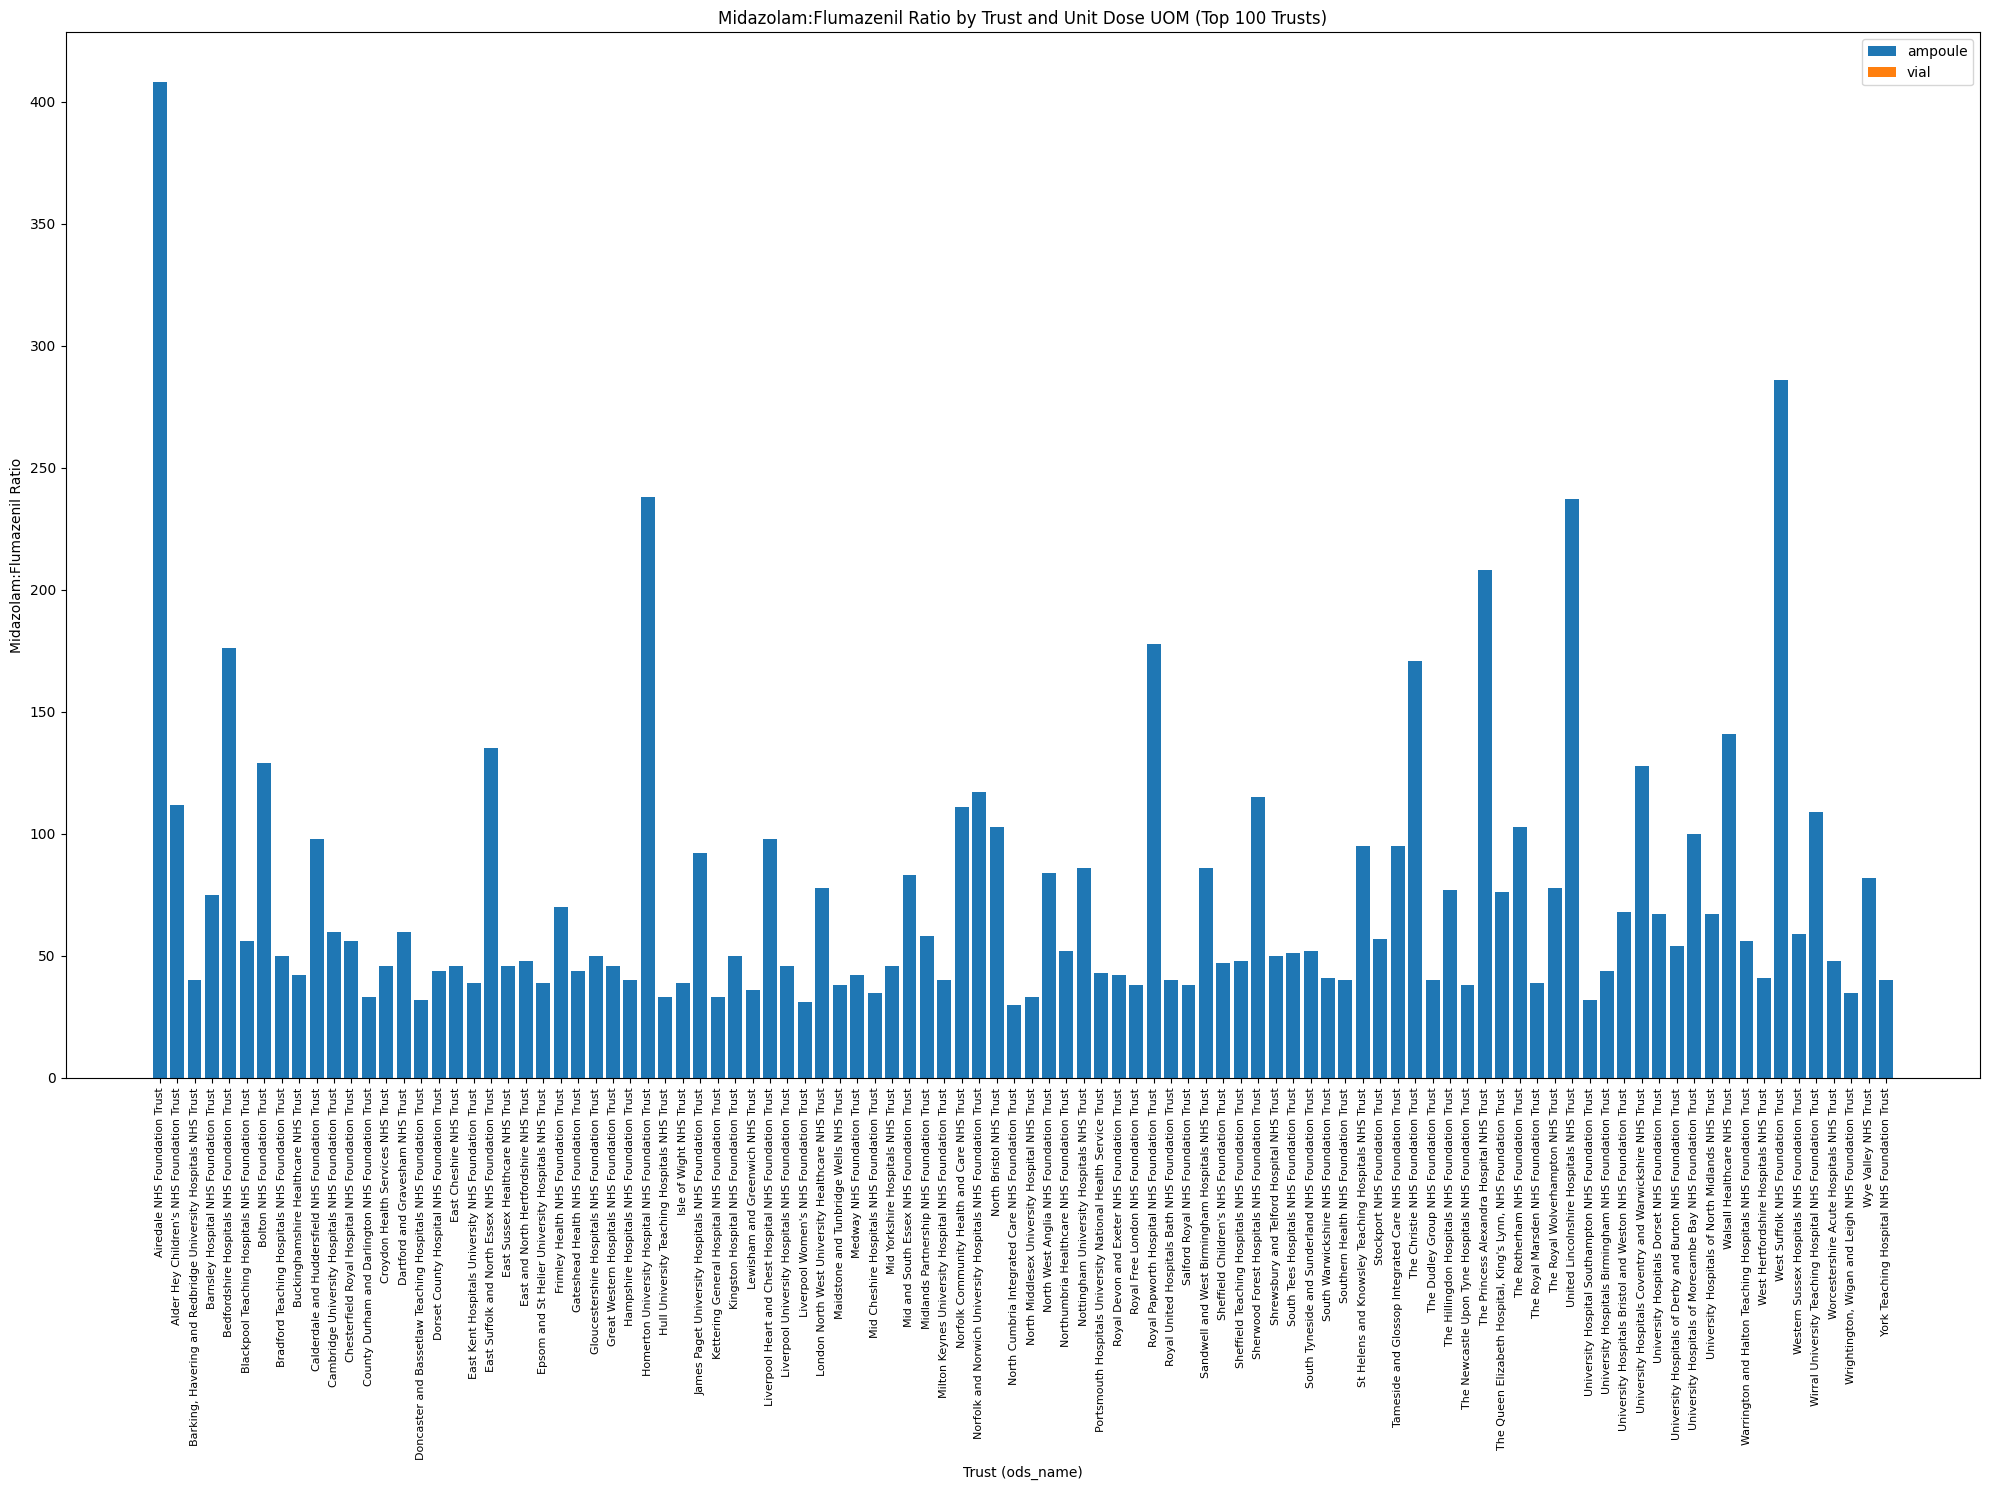

In [68]:
uom_all_midazolam_flumazenil_2024 = uom_midazolam_flumazenil_ratios(2024, df_flumazenil, high_strength_df)

# Sort the dataframe by the total ratio for each trust
sorted_trusts = uom_all_midazolam_flumazenil_2024.groupby('ods_name')['midazolam:flumazenil'].sum().sort_values(ascending=False).head(100).index

# Filter the dataframe to include only the top 100 trusts
top_100_trusts = uom_all_midazolam_flumazenil_2024[uom_all_midazolam_flumazenil_2024['ods_name'].isin(sorted_trusts)]

# Create the plot
plt.figure(figsize=(20, 15))  # Increased figure size to accommodate more trusts
for uom in top_100_trusts['unit_dose_uom'].unique():
    data = top_100_trusts[top_100_trusts['unit_dose_uom'] == uom]
    plt.bar(data['ods_name'], data['midazolam:flumazenil'], label=uom)

plt.xlabel('Trust (ods_name)')
plt.ylabel('Midazolam:Flumazenil Ratio')
plt.title('Midazolam:Flumazenil Ratio by Trust and Unit Dose UOM (Top 100 Trusts)')
plt.xticks(rotation=90, fontsize=8)  # Reduced font size for readability
plt.legend()
plt.tight_layout()
plt.show()

##### top 25

<Axes: xlabel='ods_name'>

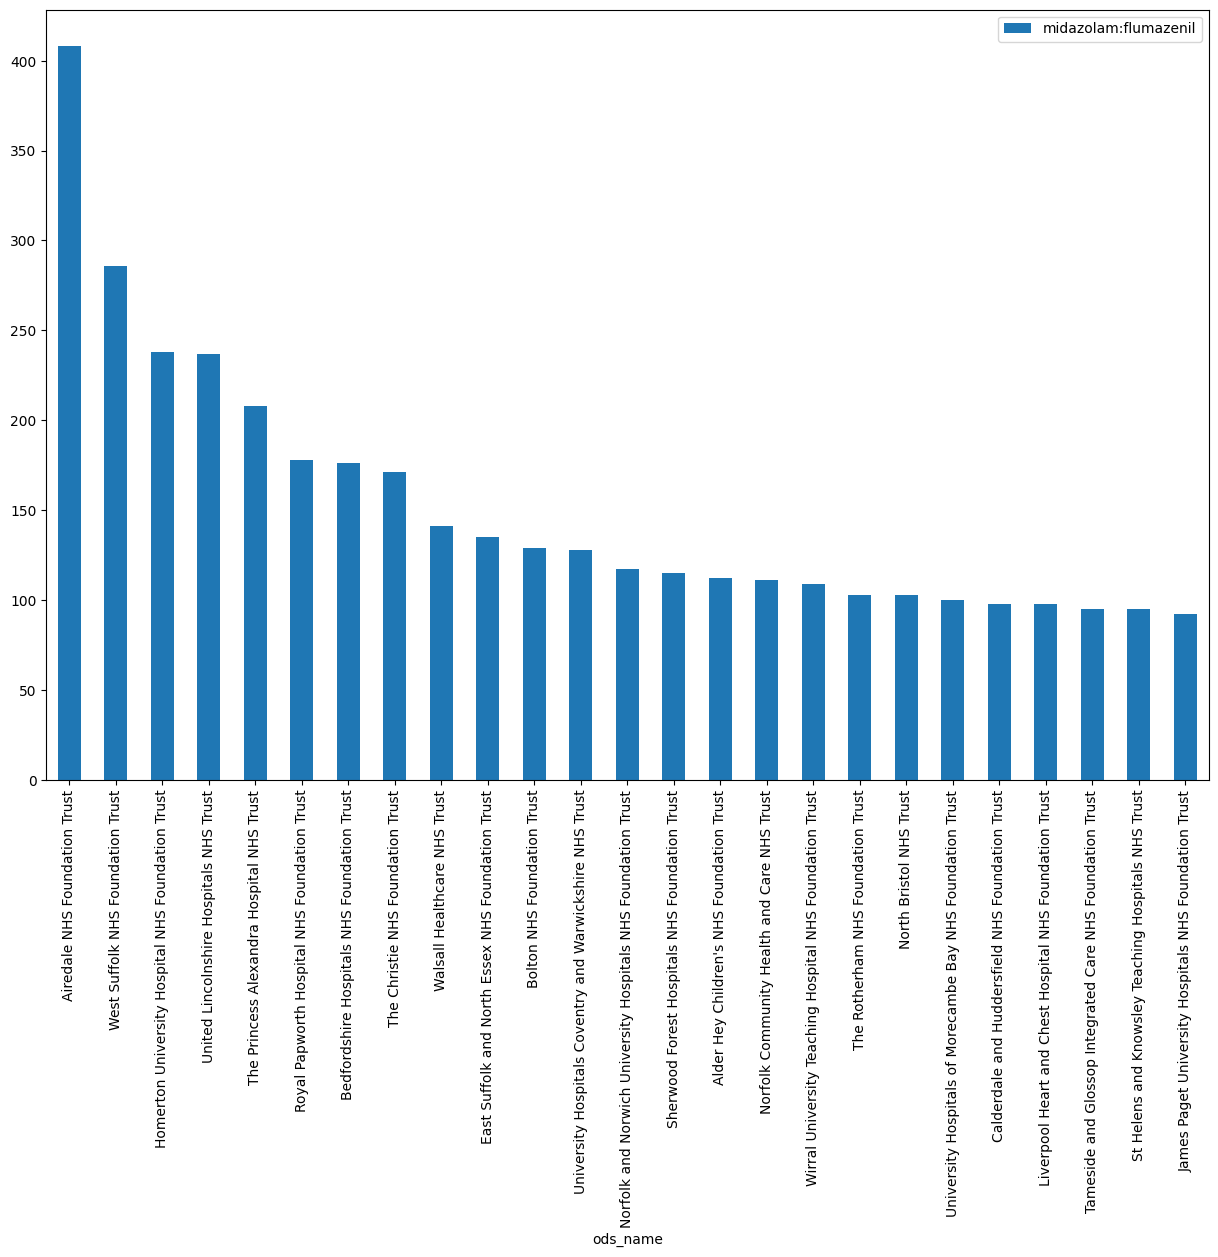

In [69]:
uom_all_midazolam_flumazenil_2024.groupby("ods_name")["midazolam:flumazenil"].sum().reset_index().sort_values(by="midazolam:flumazenil", ascending=False)[:25].plot(x="ods_name", kind='bar', figsize=(15,10))

#### 2023

In [70]:
uom_all_midazolam_flumazenil_2023 = uom_midazolam_flumazenil_ratios(2023, df_flumazenil, high_strength_df)
uom_all_midazolam_flumazenil_2023.head()

ods_name unit_dose_uom  \
0                      Airedale NHS Foundation Trust       ampoule   
1          Alder Hey Children's NHS Foundation Trust       ampoule   
2  Ashford and St Peter's Hospitals NHS Foundatio...       ampoule   
3  Avon and Wiltshire Mental Health Partnership N...       ampoule   
4  Barking, Havering and Redbridge University Hos...       ampoule   

   num_midazolam_doses  num_flumazenil_doses  midazolam:flumazenil  
0              19416.0                  75.0                 259.0  
1              17277.0                 145.0                 119.0  
2              18753.0                 351.0                  53.0  
3                897.0                  60.0                  15.0  
4              29049.0                 558.0                  52.0

<Axes: xlabel='ods_name'>

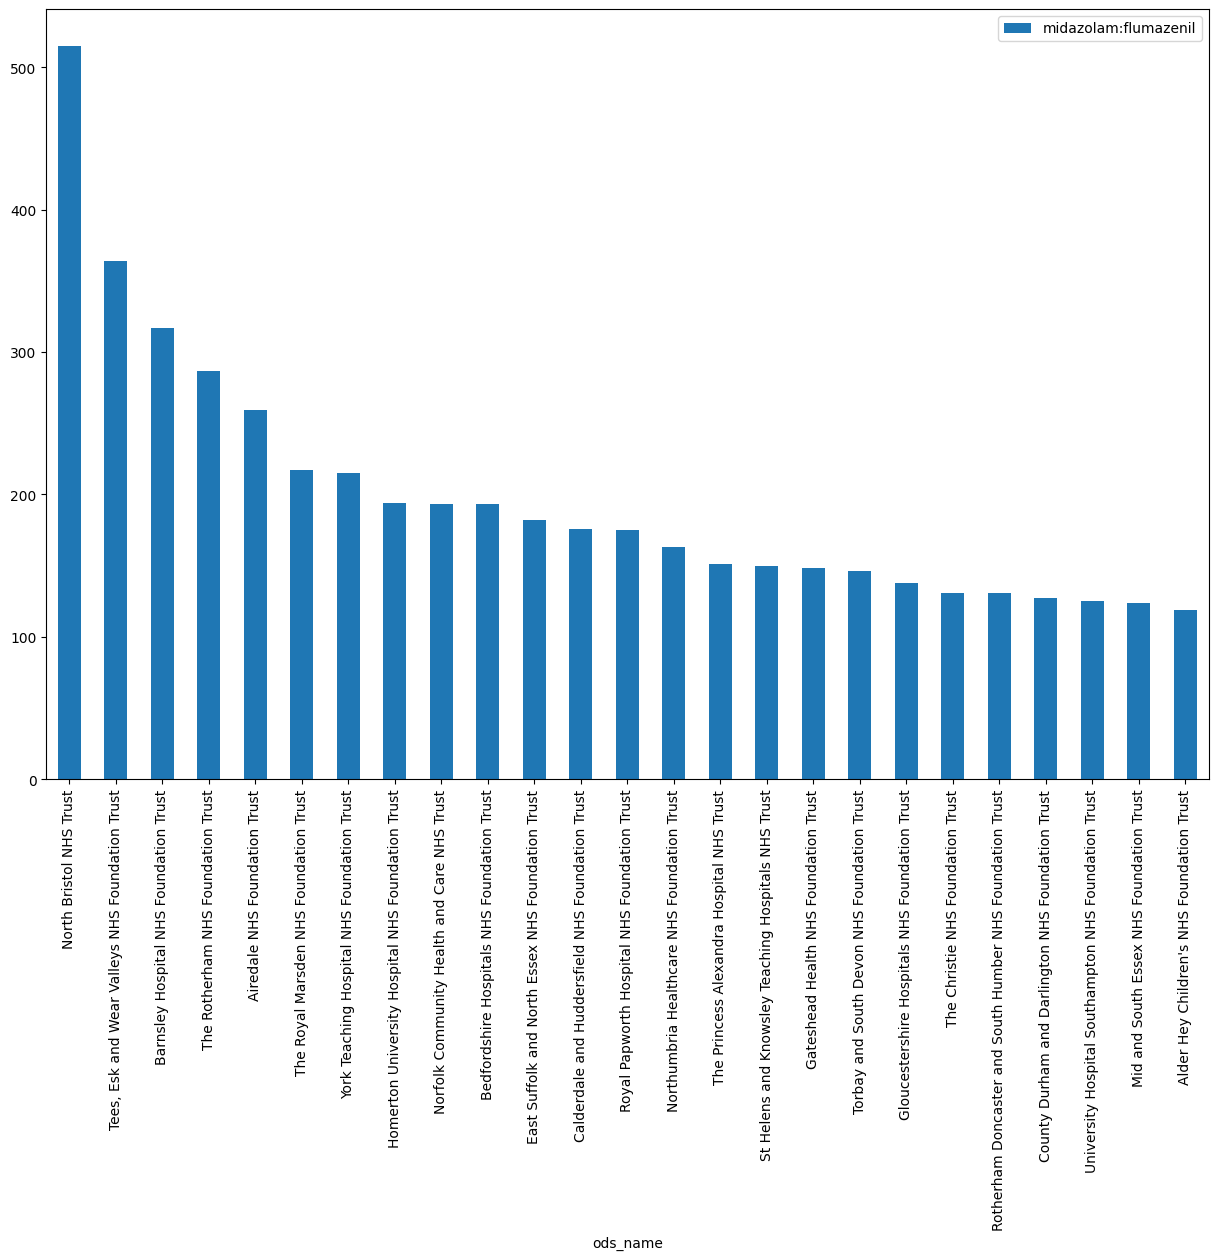

In [71]:
uom_all_midazolam_flumazenil_2023.groupby(["ods_name", "unit_dose_uom"])["midazolam:flumazenil"].sum().reset_index().sort_values(by="midazolam:flumazenil", ascending=False)[:25].plot(x="ods_name", kind='bar', figsize=(15,10))
# plt.title()

### do the trusts that issue high-strength midazolam also issue flumazenil?

In [72]:
trusts_issuing_high_dose_midazolam = set(high_strength_df['ods_name'].unique())
trusts_issuing_flumazenil = set(df_flumazenil["ods_name"].unique())

In [73]:
# trusts issuing high-strength midazolam but not issuing flumazenil
not_issuing_flumazenil = trusts_issuing_high_dose_midazolam.difference(trusts_issuing_flumazenil)
print(f'Out of {len(trusts_issuing_high_dose_midazolam)} issuing high-strength midazolam, {len(not_issuing_flumazenil)} of them do not issue flumazenil and they are:')
not_issuing_flumazenil

Out of 219 issuing high-strength midazolam, 27 of them do not issue flumazenil and they are:


{'Bedfordshire Hospitals NHS Foundation Trust (prev: Bedford Hospital NHS Trust)',
 'Bridgewater Community Healthcare NHS Foundation Trust',
 'Brighton and Sussex University Hospitals NHS Trust',
 'East Suffolk and North Essex NHS Foundation Trust (prev: Ipswich Hospital NHS Trust)',
 'Gloucestershire Health and Care NHS Foundation Trust (prev: Gloucestershire Care Services NHS Trust)',
 'Liverpool University Hospitals NHS Foundation Trust (prev: Royal Liverpool and Broadgreen University Hospitals NHS Trust)',
 'Manchester University NHS Foundation Trust (prev: Central Manchester University Hospitals NHS Foundation Trust)',
 'Manchester University NHS Foundation Trust (prev: University Hospital of South Manchester NHS Foundation Trust)',
 'Mid and South Essex NHS Foundation Trust (prev: Basildon and Thurrock University Hospitals NHS Foundation Trust)',
 'Mid and South Essex NHS Foundation Trust (prev: Mid Essex Hospital Services NHS Trust)',
 'North Cumbria Integrated Care NHS Foundati

### total monthly records of high-strength midazolam & flumazenil per trust, per year

In [74]:
def total_monthly_high_dose_midazolam(year: int, ods_name: str) -> None:
    """
    Plot the total number of high-strength Midazolam and Flumazenil doses per month for a specific year and NHS trust.

    This function creates a line plot showing:
    1. Total monthly high-strength Midazolam doses for the specified trust (left y-axis)
    2. Total monthly Flumazenil doses for the specified trust (right y-axis)
    3. Overall mean monthly high-strength Midazolam doses across all trusts (left y-axis)
    4. Overall mean monthly Flumazenil doses across all trusts (far right y-axis)

    The plot uses three y-axes to better visualize the differences in scale between Midazolam and Flumazenil doses.
    Midazolam doses are plotted on the left y-axis in blue, while Flumazenil doses are plotted on two right y-axes in red and green.

    Args:
        year (int): The year for which to plot the data
        ods_name (str): The name of the NHS trust

    Returns:
        None: This function doesn't return anything, it displays a plot
    """

    # Filter the data for the given year and ods_name for both dataframes
    high_strength_df_filtered = high_strength_df[(high_strength_df["year"] == year) & (high_strength_df["ods_name"] == ods_name)]
    df_flumazenil_filtered = df_flumazenil[(df_flumazenil['year'] == year) & (df_flumazenil['ods_name'] == ods_name)]

    # Add a dataframe which is only filtered for the given year
    df_flumazenil_filtered_year = df_flumazenil[df_flumazenil['year'] == year]
    high_strength_df_filtered_year = high_strength_df[high_strength_df['year'] == year]

    # Group by month and calculate the mean number of doses for both dataframes
    monthly_doses_midazolam = high_strength_df_filtered.groupby('month')['num_of_preparations'].sum().reset_index()
    monthly_doses_flumazenil = df_flumazenil_filtered.groupby('month')['num_of_preparations'].sum().reset_index()

    # Group by month and calculate the mean number of doses for both dataframes across all trusts
    monthly_doses_midazolam_year = high_strength_df_filtered_year.groupby('month')['num_of_preparations'].sum().reset_index()
    monthly_doses_flumazenil_year = df_flumazenil_filtered_year.groupby('month')['num_of_preparations'].sum().reset_index()

    # Sort by month to ensure correct order
    monthly_doses_midazolam = monthly_doses_midazolam.sort_values('month')
    monthly_doses_flumazenil = monthly_doses_flumazenil.sort_values('month')
    monthly_doses_midazolam_year = monthly_doses_midazolam_year.sort_values('month')
    monthly_doses_flumazenil_year = monthly_doses_flumazenil_year.sort_values('month')

    # Create the line plot with three y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Midazolam data on the left y-axis
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Total Number of Midazolam Doses', color='tab:blue')
    ax1.plot(monthly_doses_midazolam['month'], monthly_doses_midazolam['num_of_preparations'], marker='o', color='tab:blue', label='high-strength Midazolam')
    ax1.plot(monthly_doses_midazolam_year['month'], monthly_doses_midazolam_year['num_of_preparations'], marker='*', color='tab:blue', label='Total number of high-strength Midazolam issued across all trusts')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for individual trust Flumazenil data
    ax2 = ax1.twinx()
    ax2.set_ylabel('Total Number of Flumazenil Doses (Individual Trust)', color='tab:red')
    ax2.plot(monthly_doses_flumazenil['month'], monthly_doses_flumazenil['num_of_preparations'], marker='s', color='tab:red', label='Flumazenil (Individual Trust)')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Create a third y-axis for overall Flumazenil data
    ax3 = ax1.twinx()
    # Offset the right spine of ax3 to the right so it's not on top of ax2
    ax3.spines['right'].set_position(('axes', 1.2))
    ax3.set_ylabel('Total Number of Flumazenil Doses (All Trusts)', color='tab:green')
    ax3.plot(monthly_doses_flumazenil_year['month'], monthly_doses_flumazenil_year['num_of_preparations'], marker='+', color='tab:green', label='Total number of Flumazenil issued across all trusts')
    ax3.tick_params(axis='y', labelcolor='tab:green')

    # Customize the plot
    plt.title(f"Total Number of High-Strength Midazolam and Flumazenil Preparations per Month in {year}\n{ods_name}")
    ax1.set_xticks(range(1, 13))  # Set x-axis ticks for all months
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Combine legends from all axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

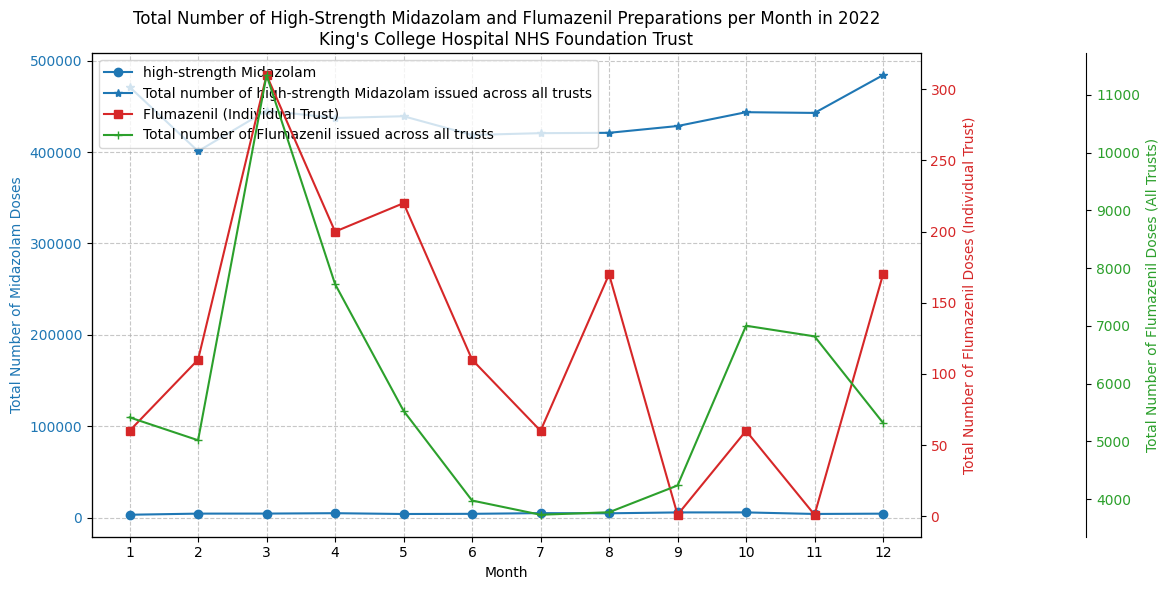

In [75]:
total_monthly_high_dose_midazolam(2022, "King's College Hospital NHS Foundation Trust")

### mean monthly records of high-strength midazolam & flumazenil per trust, per year

In [76]:
def mean_monthly_high_dose_midazolam(year: int, ods_name: str) -> None:
    """
    Plot the mean number of high-strength Midazolam and Flumazenil doses per month for a specific year and NHS trust.

    This function creates a line plot showing:
    1. Mean monthly high-strength Midazolam doses for the specified trust (left y-axis)
    2. Mean monthly Flumazenil doses for the specified trust (right y-axis)
    3. Overall mean monthly high-strength Midazolam doses across all trusts (left y-axis)
    4. Overall mean monthly Flumazenil doses across all trusts (right y-axis)

    The plot uses two y-axes to better visualize the differences in scale between Midazolam and Flumazenil doses.
    Midazolam doses are plotted on the left y-axis in blue, while Flumazenil doses are plotted on the right y-axis in red.

    Args:
        year (int): The year for which to plot the data
        ods_name (str): The name of the NHS trust

    Returns:
        None: This function doesn't return anything, it displays a plot
    """

    # Filter the data for the given year and ods_name for both dataframes
    high_strength_df_filtered = high_strength_df[(high_strength_df["year"] == year) & (high_strength_df["ods_name"] == ods_name)]
    df_flumazenil_filtered = df_flumazenil[(df_flumazenil['year'] == year) & (df_flumazenil['ods_name'] == ods_name)]

    # Add a dataframe which is only filtered for the given year
    df_flumazenil_filtered_year = df_flumazenil[df_flumazenil['year'] == year]
    high_strength_df_filtered_year = high_strength_df[high_strength_df['year'] == year]

    # Group by month and calculate the mean number of doses for both dataframes
    monthly_doses_midazolam = high_strength_df_filtered.groupby('month')['num_of_preparations'].mean().reset_index()
    monthly_doses_flumazenil = df_flumazenil_filtered.groupby('month')['num_of_preparations'].mean().reset_index()

    # Group by month and calculate the mean number of doses for both dataframes across all trusts
    monthly_doses_midazolam_year = high_strength_df_filtered_year.groupby('month')['num_of_preparations'].mean().reset_index()
    monthly_doses_flumazenil_year = df_flumazenil_filtered_year.groupby('month')['num_of_preparations'].mean().reset_index()

    # Sort by month to ensure correct order
    monthly_doses_midazolam = monthly_doses_midazolam.sort_values('month')
    monthly_doses_flumazenil = monthly_doses_flumazenil.sort_values('month')
    monthly_doses_midazolam_year = monthly_doses_midazolam_year.sort_values('month')
    monthly_doses_flumazenil_year = monthly_doses_flumazenil_year.sort_values('month')

    # Create the line plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Midazolam data on the left y-axis
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Mean Number of Midazolam Doses', color='k')
    ax1.plot(monthly_doses_midazolam['month'], monthly_doses_midazolam['num_of_preparations'], marker='o', color='k', label='High-Strength Midazolam')
    ax1.plot(monthly_doses_midazolam_year['month'], monthly_doses_midazolam_year['num_of_preparations'], marker='*', color='tab:green', label='Mean Number High-Strength Midazolam All Trusts')
    ax1.tick_params(axis='y', labelcolor='k')

    # Create a second y-axis for Flumazenil data
    ax2 = ax1.twinx()
    ax2.set_ylabel('Mean Number of Flumazenil Doses', color='k')
    ax2.plot(monthly_doses_flumazenil['month'], monthly_doses_flumazenil['num_of_preparations'], marker='s', color='tab:red', label='Flumazenil')
    ax2.plot(monthly_doses_flumazenil_year['month'], monthly_doses_flumazenil_year['num_of_preparations'], marker='+', color='tab:blue', label='Mean Number Flumazenil All Trusts')
    ax2.tick_params(axis='y', labelcolor='k')

    # Customize the plot
    plt.title(f"Mean Number of High-Strength Midazolam and Flumazenil Preparations per Month in {year}\n{ods_name}")
    ax1.set_xticks(range(1, 13))  # Set x-axis ticks for all months
    ax1.set_yticks(range(0, 1000, 100))
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

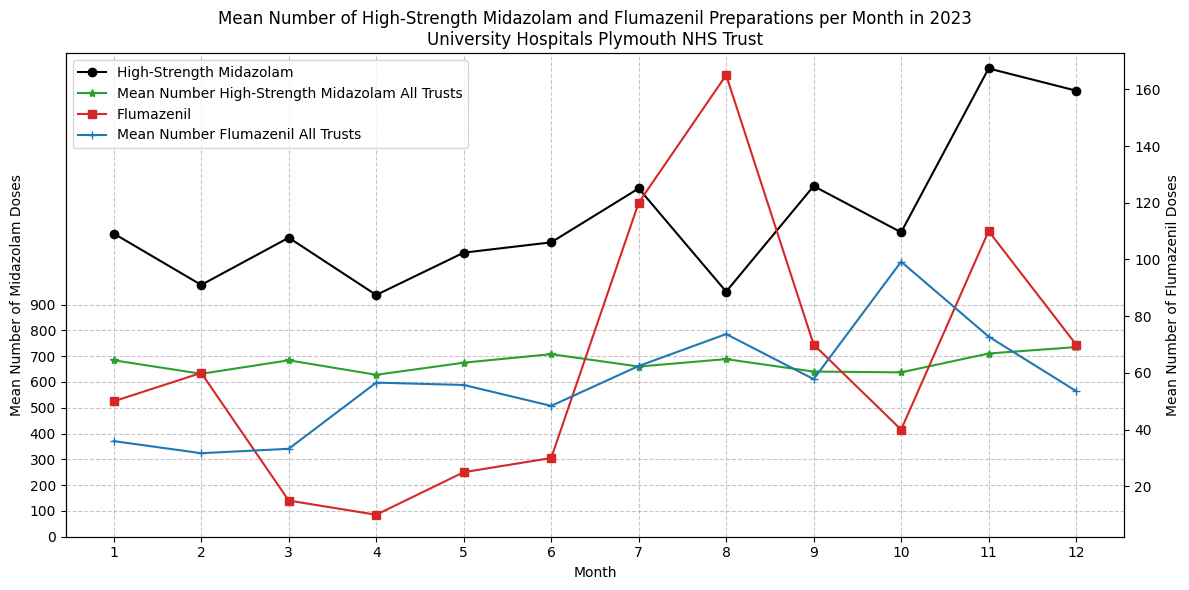

In [77]:
mean_monthly_high_dose_midazolam(2023, "University Hospitals Plymouth NHS Trust")

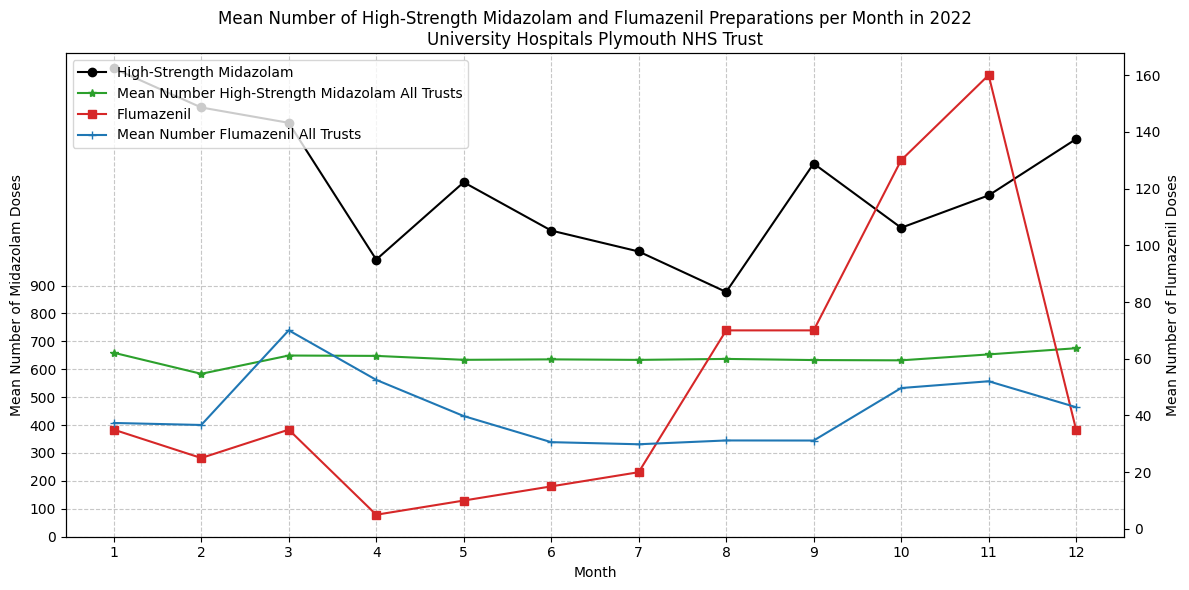

In [78]:
mean_monthly_high_dose_midazolam(2022, "University Hospitals Plymouth NHS Trust")

In [79]:
def plot_monthly_midazolam_uom_doses(year: int, ods_name: str, unit_dose_uom: Optional[str] = None) -> None:
    """
    Plot monthly doses of Midazolam for a specific year and NHS Trust, optionally filtered by unit dose UOM.
    Uses two y-axes to display different unit dose UOMs.

    Args:
        year (int): The year to plot data for.
        ods_name (str): The name of the NHS Trust.
        unit_dose_uom (str, optional): The unit dose UOM to filter by. If None, plot all UOMs.

    Returns:
        None: This function displays a plot and does not return any value.
    """
    # Filter the dataframe
    high_strength_df_filtered = high_strength_df[(high_strength_df["year"] == year) & (high_strength_df["ods_name"] == ods_name)]

    if unit_dose_uom:
        high_strength_df_filtered = high_strength_df_filtered[high_strength_df_filtered["unit_dose_uom"] == unit_dose_uom]

    monthly_doses_midazolam = high_strength_df_filtered.groupby(['month', 'unit_dose_uom'])['num_of_preparations'].mean().reset_index()

    # Create a line plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    unique_uoms = monthly_doses_midazolam['unit_dose_uom'].unique()

    if len(unique_uoms) == 1:
        uom = unique_uoms[0]
        data = monthly_doses_midazolam[monthly_doses_midazolam['unit_dose_uom'] == uom]
        ax1.set_ylabel(f'Number of Doses ({uom})')
        ax1.plot(data['month'], data['num_of_preparations'], color='tab:blue', label=uom)
        ax1.tick_params(axis='y', labelcolor='tab:blue')
    elif len(unique_uoms) >= 2:
        uom1, uom2 = unique_uoms[:2]
        data1 = monthly_doses_midazolam[monthly_doses_midazolam['unit_dose_uom'] == uom1]
        data2 = monthly_doses_midazolam[monthly_doses_midazolam['unit_dose_uom'] == uom2]

        ax1.set_ylabel(f'Number of Doses ({uom1})', color='tab:blue')
        ax1.plot(data1['month'], data1['num_of_preparations'], color='tab:blue', label=uom1)
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        ax2 = ax1.twinx()
        ax2.set_ylabel(f'Number of Doses ({uom2})', color='tab:orange')
        ax2.plot(data2['month'], data2['num_of_preparations'], color='tab:orange', label=uom2)
        ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Set labels and title
    ax1.set_xlabel('Month')
    plt.title(f"Monthly Number of Preparations of Midazolam in {year}\n{ods_name}")

    # Customize the plot
    ax1.set_xticks(range(1, 13))  # Set x-axis ticks for all months
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Add a legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    if len(unique_uoms) >= 2:
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    else:
        ax1.legend(loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()



In [80]:
high_strength_df_filtered = high_strength_df[(high_strength_df["year"] == 2023) & (high_strength_df["ods_name"] == "University Hospitals Plymouth NHS Trust")]
high_strength_df_filtered.unit_dose_uom.unique()

array(['ampoule'], dtype=object)

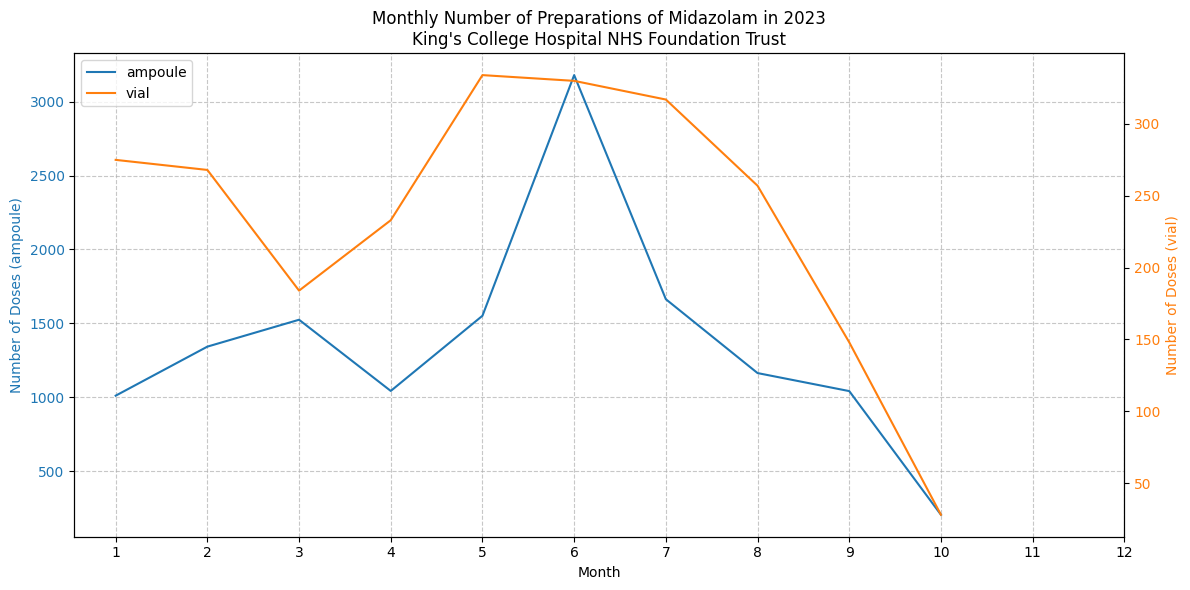

In [81]:
plot_monthly_midazolam_uom_doses(2023, "King's College Hospital NHS Foundation Trust")

## Other analyses of Midazolam

### number of times each dose is issued

In [ ]:
df_midazolam.head(2)

year_month  year  month  indicative_cost  quantity uom ods_code  \
79 2019-04-01  2019      4             48.0     200.0  ML      REF   
80 2019-04-01  2019      4             48.0     200.0  ML      REF   

                              ods_name      region          vmp_code  \
79  Royal Cornwall Hospitals NHS Trust  South West  4508111000001108   
80  Royal Cornwall Hospitals NHS Trust  South West  4508111000001108   

          vtm   vtm_name    df_ind  udfs udfs_uom unit_dose_uom  \
79  776785007  Midazolam  Discrete  50.0       ml          vial   
80  776785007  Midazolam  Discrete  50.0       ml          vial   

               dform_form                                         vmp_name  \
79  Solution for infusion  Midazolam 50mg/50ml solution for infusion vials   
80  Solution for infusion  Midazolam 50mg/50ml solution for infusion vials   

         ing  strnt_nmrtr_val  strnt_dnmtr_val strnt_nmrtr_uom_name  \
79  84213009              1.0              1.0                   mg   
80  84213009              1.0              1.0                   mg   

   strnt_dnmtr_uom_name                   ing_nm droute_description  \
79                   ml  Midazolam hydrochloride      Intramuscular   
80                   ml  Midazolam hydrochloride             Rectal   

    num_of_doses  dose_in_mg  dose_prescribed_in_mg_per_ml  
79           4.0       200.0                           1.0  
80           4.0       200.0                           1.0

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Number of times dose is issued")

print(f"There are {len(df_midazolam['dose_issued_in_mg_per_ml'].unique())} doses of midazolam issued")
df_midazolam['dose_issued_in_mg_per_ml'].value_counts().plot(kind='bar', rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Doses issued")
plt.grid()
plt.show()

### yearly trend in low dose prescription

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Number of times dose is prescribed")

low_strength_df.groupby('year')['num_of_preparations'].sum().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Yearly trends in low-dose prescription")
plt.grid()
plt.show()

### yearly trends in High-Strength prescription

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Total dose prescribed")

high_strength_df.groupby('year')['num_of_preparations'].sum().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Yearly trends in high-strength prescription")
plt.grid()
plt.show()

### dosage forms of Midazolam prescribed

In [ ]:
print(f"There are {len(df_midazolam.dform_form.unique())} dosage forms of Midazolam issued and they are: \n {df_midazolam.dform_form.unique()}")

### quantity of dosage forms prescribed

In [ ]:
dfd = df_midazolam.drop_duplicates(subset=["vmp_code", "dform_form"])
dfd["dform_form"].value_counts()

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Quantity of each dosage forms prescribed")

print(f"There are {len(df_midazolam['dform_form'].unique())} dosage forms of midazolam")
df_midazolam["dform_form"].value_counts().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Quantity prescribed per dosage form")
plt.grid()
plt.show()

### route of administration

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Quantity of times route chosen")

print(f"There are {len(df_midazolam['droute_description'].unique())} dosage forms of midazolam")
df_midazolam["droute_description"].value_counts().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Route of administration used")
plt.grid()
plt.show()

### companies prescribing midazolam and lidocaine combination

In [ ]:
plt.figure(figsize=(20,15))

midazolam_lidocaine_df = df_midazolam[df_midazolam["vtm_name"] == "Midazolam + Lidocaine"]

midazolam_lidocaine_df.groupby(["ods_name", "vtm_name"])["quantity"].sum().sort_values(ascending=False).plot(kind="barh")

plt.gca().invert_yaxis()
plt.title("Quantity of Midazolam + Lidocaine combination issued per trust")
plt.grid()
plt.show()

### cost of midazolam per region

In [ ]:
plt.figure(figsize=(15,15))

df_midazolam.groupby("region")["indicative_cost"].sum().plot(kind='bar')
current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)
plt.title("Cost of midazolam issued per region")
# plt.grid()
plt.show()

### quantity of midazolam per region

In [ ]:
plt.figure(figsize=(15,15))

df_midazolam.groupby("region")["quantity"].sum().plot(kind='bar')
current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)
plt.title("Quantity of midazolam issued per region")
# plt.grid()
plt.show()

### cost of midazolam prescribed per trust

In [ ]:
plt.figure(figsize=(20,15))

df_midazolam.groupby("ods_name")["indicative_cost"].sum().sort_values(ascending=False)[:20].plot(kind="barh")

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/100000)}K' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)
plt.gca().invert_yaxis()
plt.title("Cost of midazolam issued per trust")
plt.grid()
plt.show()

### quantity of midazolam prescribed per trust

In [ ]:
plt.figure(figsize=(20,15))

df_midazolam.groupby("ods_name")["quantity"].sum().sort_values(ascending=False)[:20].plot(kind="barh")

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)
plt.gca().invert_yaxis()
plt.title("Quantity of midazolam issued per trust")
plt.grid()
plt.show()

In [ ]:
quantity_per_trust = df_midazolam.groupby("ods_name")["quantity"].sum().sort_values(ascending=False).reset_index()

quantity_per_trust.columns = ["Trust", "Quantity issued"]

quantity_per_trust.tail()

cost of midazolam per formulation

In [ ]:
figure = plt.figure(figsize=(20,15))

# plt.ticklabel_format(style="plain")
plt.xlabel("Indicative Cost")

df_midazolam.groupby("vmp_name")["indicative_cost"].sum().sort_values(ascending=True).plot(kind="barh")

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)

plt.title("Indicative cost of midazolam per formulation")
plt.grid()
plt.show()

yearly usage of midazolam per trust

In [ ]:
ax = df_midazolam.groupby(["year", "ods_name"])["quantity"].sum().sort_values(ascending=False)[:40].unstack().plot(kind="barh", figsize=(30,30), stacked=True)

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)

plt.title("Yearly usage of midazolam per trust")
plt.grid()
plt.show()

yearly usage of midazolam

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_ylabel("Quantity issued")
ax.set_xlabel("Year")

df_midazolam.groupby("year")["quantity"].sum().plot()

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Quantity of midazolam issued per year")
plt.grid()
plt.show()

monthly usage of midazolam per trust

In [ ]:
df_midazolam.groupby(["month", "ods_name"])["quantity"].sum().sort_values(ascending=False)[:40].unstack().plot(kind="barh", figsize=(30,30), stacked=True)

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)

plt.title("Monthly usage of midazolam per trust")
plt.grid()
plt.show()

formulations mostly used

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Quantity of formulations issued")
# plt.xlabel("Year")

print(f"There are {len(df_midazolam['vmp_name'].unique())} VMPs of midazolam issued")
df_midazolam["vmp_name"].value_counts().plot(kind="bar", figsize=(17, 10))

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Quantity issued per midazolam formulation")
plt.grid()
plt.show()

In [ ]:
df_midazolam["vmp_name"].value_counts().sort_values(ascending=False)[:10]